In [5]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.optimizers import Adam
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from keras.callbacks import LambdaCallback
from keras.callbacks import EarlyStopping
#LambdaCallback, EarlyStopping 두개를 사용하면, 중간 결과를 확인할 수 있다.
from keras.layers import LeakyReLU



#epoch, logs, steop 을 받아, 출력을 다음과 같이한다.
def lambdaf_(epoch, logs, step) : 
    if epoch % step == 0 : print(f"{epoch} => {logs}")             
        
#epoch 출력
def printepoch(step) :   
    return LambdaCallback(on_epoch_end=lambda epoch, logs: lambdaf_(epoch, logs, step)  )



Using TensorFlow backend.


In [6]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0],[1], [1], [0]])

In [7]:
#신경망을 다층으로 구현
model = Sequential()
model.add(Dense(1, input_dim = 2)) #퍼셉트론은 1개, 입력은 2차원, 출력은 무조건 1개
model.add(Activation('sigmoid')) #퍼셉트론에 시그모이드 함수를 적용하겠다.
model.summary() #해석, 트레이닝, 또는 테스트 개수에 따라 달라지기 때문에, Output Shape는 None이다.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [8]:
model = Sequential()
model.add(Dense(10, input_dim = 2)) #개수, 차원(input의 수) #첫번째는 반드시 input_dim 필요
model.add(Activation('sigmoid'))

model.add(Dense(10)) #input 개수는 이전의 출력개수를 그대로 받겠다. 이전에껏, Dense개수만큼
model.add(Activation('sigmoid'))

model.add(Dense(10)) #input 개수는 이전의 출력개수를 그대로 받겠다. 이전에껏, Dense개수만큼
model.add(Activation('sigmoid'))

model.add(Dense(1)) #input 개수는 이전의 출력개수를 그대로 받겠다. 이전에껏, Dense개수만큼
model.add(Activation('sigmoid'))

model.summary()
#즉, 이 구조는 21개의 파라미터가 필요하다.

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                30        
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [9]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [10]:
0#트레이닝 함수
model.fit(x, y, batch_size = 4, epochs = 2000, verbose = 0)
#•X : 입력 데이터•Y : 결과(Label 값) 데이터•batch_size : 한 번에 학습할 때 사용하는 데이터 개수•epochs : 학습 데이터 반복 횟수
#verbose epochs 횟수마다, 출력, 0일때는 출력하지 않는다.

print(model.predict_proba(x)) #행렬은 sample 수 * 클래스 수 이미르

#20번가지고는 학습이 안된다.

print(model.predict) #예측값

[[0.00281736]
 [0.9971934 ]
 [0.9966882 ]
 [0.00333479]]
<bound method Model.predict of <keras.engine.sequential.Sequential object at 0x000000001610B088>>


In [11]:
p = model.predict(x)
print((p > 0.5)*1) #numpy객체여서 가능한 표현

[[0]
 [1]
 [1]
 [0]]


(100, 2)
<class 'numpy.ndarray'>
(100, 1)


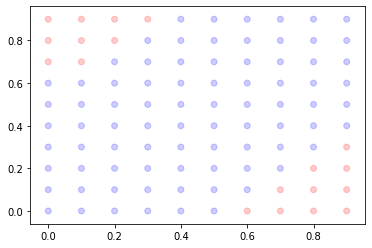

In [12]:
xx, yy = np.mgrid[0:1:0.1, 0:1:0.1] #x, y가 0~1의 범위에서, 0.02단위 간격으로, 격자를 표시
grid = np.c_[xx.flatten(), yy.flatten()] #쫙 펼친다. [x값만 1차원으로 갖고있고, y값만 1차원으로 갖고 있다.]
print(grid.shape)
h = model.predict_proba(grid) #예측값을 다 계산, 그래서, 각 좌표의 확률값

print(type(h))
print(h.shape)

colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ] #0.5보다 크면 빨강, 0.5이하는 파랑
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)
plt.savefig('xor.png')

#비선형 분포를 가지고 있다. [0,0]일때, 부터 [1,1]까지, 모든 값에 대해 예측해주고 있다. 파란부분 0, 붉은부분 1
#경계값을 Decision boundary라고 한다.

In [13]:
xx, yy = np.mgrid[0:1:0.02, 0:1:0.02] #x, y가 0~1의 범위에서, 0.02단위 간격으로, 격자를 표시
grid = np.c_[xx.flatten(), yy.flatten()] #쫙 펼친다. [x값만 1차원으로 갖고있고, y값만 1차원으로 갖고 있다.]
print(grid.shape)
h = model.predict_proba(grid) #예측값을 다 계산, 그래서, 각 좌표의 확률값

print(type(h))
print(h.shape)

colors = ["red"  if i>  0.5  eldata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXQAAAD4CAYAAAD8Zh1EAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOy9aYxcWXbn93/vxb5nRkRmkrmRLO5kFWthsYqlqlb3SK0uDWRJtlqSW4DsMSz0JwnwMgYswIBL4w8jDzAfZGBsT1sWxoZGktsYYCRIMzWCrO6uatbKnUWyuCWXJHOJLWPfI64//Hl4I5OZZEZmRGZGMC6QyMgT9y2/d26+e+65555rKKUwKIMyKIMyKL1fzO2+gUEZlEEZlEHpTBm80AdlUAZlUPqkDF7ogzIogzIofVIGL/RBGZRBGZQ+KYMX+qAMyqAMSp8U23ZdOBKJqD179mzX5QdlUAZlUHqynDt3LqGUiq723ba90Pfs2YOzZ89u1+UHZVAGZVB6shiGcX+t7wYul0EZlEEZlD4pgxf6oAzKoAxKn5TBC31QBmVQBqVPyuCFPiiDMiiD0ifluS90wzD+xDCMmGEYX63xvWEYxv9iGMZtwzAuG4bxeudvc1AGZVAGZVCeV9Zjof8rAO8/4/tfBHDg8c/3Afxvm7+tQRmUQRmUQWm3PPeFrpT6CEDqGVV+BcD/rVg+AxAyDGNXp25wUAZlUAZlUNZXOhGHPg5gtuXvh49l8ysrGobxfdCKx9TU1OauWioBqcf9zNAQ4PHwc6UCJJNAswmEQoDPR3mtxvq1GhAI8AcA6nXKKxXA7weCQcAwgEaD8nIZ8Hp5DcPgeZeWgGIRcLuB4WHANAGlgHQayOcBl4tyy6I8mwVyOcBup9xu57VzOSCTAWw2yh0OygsFnsswKHe5BsxdYn4BkQfMO4S5G6UTL3RjFdmqSdaVUj8A8AMAOHny5MYTsc/PA5cv8+nyxMArr/BJnT9P7Ym2Dh0CIhHgyy+BapXaajaBPXuAyUng7Fm2JpHv3g0cOABcuEDNiTwaBY4dA65cYQsTeTAIvPYa8PXXwMKClnu9wMmTwMwMMDtLeaPBVnPyJBnu3OF9KsVW8OabbBHXrlEO8Pdrr/HY7WK+fJn/DSIPhYBXXyXz/Dxbeg8ylw+8jHMXzBcJuSNq9vmAN97YOLO8MJ/H7HTyXvuReWRkw2+/ZxZjPRtcGIaxB8BfK6WOr/LdvwTwY6XUnz/++waAbyqlnrLQW8vJkyfVhlaKVirAj3/MJ2973B/V60Aiwc9DQ2wJADURj/Mp+ny621cKiMXYtdpsunsH+FJ2uVhnaEjLYzHKq1W2KCmJBM9TLgOjo1qeTvMclQrl8p+bz7PFSasyH3u9ymVqXynKLYvyapUdiGHwut1gXlzk8S8Y8xXnSSyqkU0jC0oPIHdMzQPmjTPncsC3vqUt+3aLYRjnlFInV/uuE2GLfwXgP3sc7fI2gMzzXuabKpkMn56tZXBhs3HMlE5r7QN8urUau0/RPkBtmCa71FbtAzS5rl2j5d1aQiF256HQcvnQEOUr6weDwI0bbDWifYAtcXaWmjZbHr/LxdZUqWjtAxy35XL86Razx7M6czDYt8xNjw9z19KrIly61B7y11/3BPIz1Txg3jrmZpOvsW6U57pcDMP4cwDfBBAxDOMhgP8RgB0AlFL/O4B/B+AfArgNoAjgv+jOrT65If4WjTebuus1DHaNS0scD4kDzTT5ZJeWtNNNxj/VKuXVKp1uAOvX6xyjlUp8yTudukWl07y+x0ON2my83tKSdroFg8udca1ONxmXZbPa6SYMSvEc6TSPb2VbyWwYmjmV0i6gAfM6mE0YpgHUa0A2DZToXFXOICzL6k/kZ6jZsvpUzTuQWe61G2VdLpdulA27XGo14Ic/pGvE6eSTqVT0TMrsrO5Gq1VqLxJh9+1269ZgtwN79wJXr/I4eXEpBRw+TF+5y0Xt1GpsEcePs/u229nV1mo816uvsr5lUV6vs+W88gpw8yZbh9PJ36USzz83x88OB69ZLtMRKK1FZlRKJWDXLh4bj/cXc6nE+9lq5moVAHDt8H+Mh1fSCLsKT5gX68NwHd+P85ft/YjctppPnAC++mp9zMUicOTI08zFIrBv3/qZy2W+KPuVeXIS+O53l1vu7ZRuu1y2tjQa+kkrpd0vdjs/u1z8LXJ58m4368vxHg815fGwrsy8uN3UrMfD+vU6rytyt5v1RO7x6JYmcqX4d7XK+pbF84u8Xuf9i7zZ1PfpcPC+hUGsZMPoDLOw7QRml2ttZssi91rMTufGmU0TcLtxoHYdIU8FMRVBvB5CDCOYcKcwUpvbcchKdQS5q2r2+VZndrvbY7bbe4tZ2NbLLCOAbpTes9AXFzndPzzMsYxSHFs9eMAnfuAAu0SZmo7FOPPy8suUNxrUWj4P3L3LKepcjpoTLVy6BJw+zW62WqUW7Hbgs8+Ad96hCVGtUltuN3DmDHDqFK9ZLrOuzwd8/jm7b6eT57Is3uvFi5x+HxpiTJNpUv711zxu927en8z+zMzw8969m2eemeH0+4AZuHQJ6vQ7yBYtVKom3M4m/PYy/v4zN7zvvNqvyF1X8/g4fdPdYk6laF1vlvnTT4Gf+ZnuMV+/zt8rmZeW+NppnYxtpzzLQt+2fOgbLjLzUCrpqAoZuxgG5ZmM7qIBfl+p0Mkl47Bmk9+Xy5RXKpRZlq6fy1FzPh+7aIeD8nyeP16vHi1Uq/oabje7YRnf1Wq8J6dTmyXNJs+9tKRNEnHGtQau2mzacdgJZpttwNzCbFTKCObSy5gtuxfNSg2+fPIJc92KwOGw9wRyo9G+mu329tVcry9nbrVSu8ksbpbNMm+kabfDLD73lcwrJ1A7WXrPQq/Xgb/4CzqtZNYjn6fF7vMB9+/zt2nySXq9wNgYu8tAQE+hWxa7/4sXeR67nfJmk86ys2e1vFJhy3rjDeDcOWrY6aTWi0XKz5/XXXytxtbz+us62Njt1jMzL7/M+6xUaF40Gqy/fz/Nj2yW9y0zKuPjPHZx8cVirtVokq2XeXSUpuAmme+/8Z/g6rkSRtx5GE7+dy8WPPCfPIRPz7v7EXlVNRcKtCRb1SxsA2YtP36cI4qVzAcOcAS1knl6uns+dOuDDz7Y2Fk3WX7wgx988P3vf7/9A8tljq0aDT7RZpNPXloDQHmjQe35/XrKvFbTlnkgoLvJep0/lkW5OO7kPACnucUBKtdVivUdDu1wk/p+v54JkfNLfem+W+ViMsgKB3HSud28rixTe5GYxZzZYuaAq4Z6w8BcPYpi04mC8mAikEPIUULCiO4YZAnRWw1ZXhabVbOEDUp9cYkMmJf/K7TD7Pezg2sN1Wyn/MEf/MH8Bx988IPVvus9C31xkcu+wmF2dwCf3v377GIPHmTX3GhQvrjIgNBXXmH3K063bBa4fRt46y3KxelWrfL8777LbrxW0+PnM2cor9fZHTscbBUffUSnm7hw7HZe49NPgaNH+VnMCK+X5x8fJ0OhoOVXr1Lb4+OsbxiU37rFc7/00oC5lblQ0Ms1u8BcrNtRrphwOhS8rgbOfNQATp2CYRo7HvnOHaqnW2r+5BOutFzJfP48MDHRO8zvvaejW7aKOZHgKCC66q6gzy/95UNvTagQi/GzrKM1TY514nFqNBLRPtRCgfWrVc5SiSmQz7N+pcJu2+mkVgsFjpdKJY75/H6tyWxWO91CIbacSkV/53Lx2jKOEwehLFkTZ9zSEq9hs3EcKWyZDO/JsvTyM9PsHHMup1c9DJjXZPZks/C0MLvcHuQrdfiKcTizGcDlRiMyCqfTvS3I4jdeDdlu766aZZXlSma7vbeYC4WtZwY2bp0/r/Sehd5oAH/6p4xDD4XY7aXTdLr5/eymw2HKMxlqbWKCgajhMJ9kNsune+gQnWuSSadQYHf92muc9g+FqMVSiS3l7bcpl3XHMmPzzjvAF19QJq0hnaZVeOWKnt6u16nxEycYYVOtcszWbFJ+6BAdjZkMW6NS/Ht6mnUXFwfM28gcf+dX8MUXQNSTh+V2QlWqiKdtCJ06iE+/CnQNORzmeXeSmk+dYqz2gLl95r17gd/4jY1PjD7LQu+9F3qhAHz4oU6dphS1JMvFikX+KEWtyvKyYpHHAsuda8Uin7jEevv97KplTbJMzweD/C6b5Y/IJdVbLkc5QI0GAtS6TLu3OuN8Pmo/m9UBsF6vDqLN59mKALYoCYrN5baWWdheFGaA8mcw38sN42Z2F5oAVNPAZCADnw/4aflkR5AByjuBLNbnJpG7ruadyCwZFdfD7PWy41gvczgMvP8+P2+k9NcLXeLQo1FqFeCTu3uXT+3IET297fEw8UMiwW60XNbOtXRaO91E7nLx84ULdK5VKtrpZhh0rv3sz/Lc4nSz24Gf/ITdvcRN2e085pNP6FyVlmCz8RrnztHMiERoFlgW7+nKFbacyUnKZTr91i1+3r9/a5kB4OOPXzzmn/4U+MY31mSu2Vwolk047Qoup8L5T8rIHz0Fp8/er8hPqfnMGUZ3eL29q2bxoW81cyLBCJuBDx3QU+LJJN0ugE6LZlm03BcXqdFolBq02+ngWlyk5iIRduFOJ622hQVqaGhImw3i+CoUaBYEAvydzbL1ZLPsnoeH+V2hoBMiezy8tsejA12TSWp/bEyvM47FeA27nWughS0e53emSTYxN1YyG4ZmXlig2bAWczTK+p1klgDefmMWE20NZnt+AcEWZrfHhaVKE978LHzJFOByQY3tgsMR6Bfkp9QsL7VcrnfVLAPurWYWv3s3Su9Z6M0mfegPH3L2xDD4tCIRauLWLcoti0/d62UXefkytWKz6VyYx4/TiTYyQq3IioSTJ9kdy0xIoUDNvvceTZlgkOctlXiNb3yDlqnXS8u0UmE3fPo0A2Mlp6do/fXXaU7Uamx19TrlR4/ydzarJ/piMToa63XG3m818ze+QSt9wLwmc/b0d3DmohdBWx7OgAuqVkci1sDw63vw6Z3RjiD7/QzW2Wrk995jFE+7aq5W+XIcMD/NvHcv8L3vafdPu6W/XC65HPB3f6e3ExFHlmTwqdXYfcv4xu/XQa4idzioKcuiXLZKsdmoXQlPSCYptyz+R8qSwKUlascw9AxMtcpWIk60SEQvIWtd0iZbnwiLLGkTeauDUHz3EvNdKnWHORTS8naZ02kd3LsRZpnub2UOhfTywh5hjjXCuJqdQLlqwoDC5HARQSuHM3gH2Zy1I5CHhnS89EaRDYM+4F5R83Yyr/bvHAqxM/iFX1ieArid0l8v9IUFdpPRKMc/ALU/M8OnfPgwn6pSHIPNz3PMc+IEv5cMOamUjk+u1XQmnVKJPvr33tMrBSRTkPjQldJjP5uNG268/Tb/rla1XPzJgQDllsXvxOk2MsJ7lexE4nSbmqJcxpE3bvDY/fsHzGLl70DmZiCEctWAzQIcdoXr54qYnziJwIi7K8hzc9qfvBJZ/MnrRf74Y1qsO13Nz2KWXC7dZD52jJ3KZpjj8YEPXRfJZzk/z5e7UnRkSRKIxUV+12jwCUsccjxOuWxRYrOxi0wmKRenm9dLqziZ5PioUKBWQiF206kUf3I5mgXRKL+T6fJ0mqbE2Bi/Lxb1MS4XnWgS0Do7qwNUJyZ0S3v0iByWxfOICTBgpmyHMpupFDzCPDYGj8uJWhUwZh/A9YR5HHZ7BM2m0VVkt3t9yMEgf4aHN6/msTH+rtVWV3Oz2V01u1zdYfZ42IR9Ph3PvhlmeY11o/Re+txQiF30pUt65uTKFR2Sdu6c1vrNm3yafj9TpdXr7CLv3aMPdnSU3W6pRK3MzdE5NzVFJ1oup7ce+fJLOr+++EJrM51mvX37eF3Zvq5Q4HknJpj8QZI6Vyp08g0P8x5u3+Z9Npu8P5eLre7aNf2iu3CBraVY3B7mffsGzBth/vRTjA7XYd27jfztBcDhQLMJxD+fwQHXA8Tj7SED3UGOxzuKjOFhRqispub1MJsm77OTzJOTm2PO55/NHA63x5zJPL2zUqdK77lcslngRz9iK5CNB8VJJ4kdYjHKAwGdQ9Oy9FI0n0+vDLDbKW80qIFQiHKbjdqQsdvwsF6mlkiwJdpsevmaZbFFlMv8PDKic3JmMrxfmeaWGCmJjAEol5RylYpu0eGwTtsGbC2zLMHbicyGwXvd4XrOOiK4VphCOmejb320gnAjjk/Md5GrOPoRuWfULNkYt5rZ5wP+wT/g742U/vWhywSkzaYDVw8f1hly7HZ20+JblezzdjvHTeJobDR09p9iUSd/kIw+dju//+gj4Jvf5DWllZimdro5nWwZlsUfcTQGg8vl4nQbHaVc8mqK0216ern85k1eZ//+5cytPvR+Y251ru4k5tOndZxaG8zVmgHTULDZgHtXcrgZOInwtK9ryOJPXi+yLDfoIPKWq3krmI8d0xEuG2Xupg+9917oS0uMQarVtNNNukNZfTA3p51uhsEXfSBAea3GJyl5XIaHlzvdJAN9NMrzl0o8dniYrSYSYZeey9FBNzLCv4eH2Q23OhpTKR5bLPJYp5MBqqmUNinE6TY+vnyvqsVFtq7du3kPpsmW2C3mdJpsO51Z/rt7gXlpSW9d1MIcy7lxzvE2RhBvYd6FO6XdgGltGtlup7XYTeRkki/ztZBrNR7bjprn5/l9vzNbFidjN+p26a8t6IJBPrWrVzmmcrvZzcuY5uJFHcc0M6Pzpp87p7cSefiQVls0Sidao8HzisNraopOtlqN8kyGU+V79zJZRC5HeanE46en6QQUjddqPF4SNy8s6GQO586xtdy/r5M92+00I2S8eOsWW7LLxW5eHI3dZJ6c7Azz2FjnmAuFp5llDfpqzD7fzmIeGlqVOWzPwhebQepWAk2PDw2XG4krC9hTu9UR5JmZ7iPv2vU08tmzGvnBg7XV7PWurma3u/+ZZX5g4EOXkk5zSFypLE/PZhh6lmR+nnIJHq3V+LJYWGAdWUJWKrFFzM+zjiyZy+cpj8fZ1Xu9PCaf5/fxuJ55GR1l6xPLPp9nCxwb05ntZcmZLCGT2ZlqldadYbDrLhZ5bKPBTssweJ5qVc+SdYu5UCDDVjOXSnoM3A6zw6HNWMnSVK12j3lkRIdCdIC5bPfjVmMf5hJ2GAYwNVZFuLqAT43TqFjepzIPiu+3h5HbUvNOYnY6dZPvBLPDQY9ea873dkp/hS2Wy3wi4+O0pAHtQ2822b1OTGjn2twcNXD4MOXiXJM4piNH+PTlJVEocNr86FG9nYrTye8/+ojnGR/XMySGwS54716aApWKzvL/ySc8t6SUEyedWKx79/L8pqlDGtxuTrPv2aPlN2/yOvv2LWeemeks85Ej7THv29cZZperfeY9e3jtVuZcrrvMP/5xx5hdrhpe3lfGsT0FGKYBwzKxcMOEw6xhfB+wZ6oJADBtZr8gr6rmGzf4uRNqjsd7g1k6lo2+0J9Ves9Cz2SYPadc5pNRSidzEC0uLurlWnY7n7Lbza672eTUt8eju+uFBdbx+fROrz4fzyPmwPAwLWivV2vE6WSXLsmUUyltZY+O8jxut05XZ7OxixZ5qUQzwDTZ1VcqejlaMkmmkRG9KtE0lzObJu97wLycWZJ/bIRZdinYBuZMw4dP8A5GzAQQjwEKQDSCB+Y0SjXHtiAXCqzzIqm528xOJ/Ctb3XHQu89H7rfzyd965bOvDMzwxe9ZWkHZCBA59rCAutcvqzzby4u8phIhE46w9DOtWvX2GVfvKhfhMUiu9upKTrXKhXKazXWm5jgdfN5ngegE210lPcpzjibjceHQnS4zc/rvJ+XL/N3MkmTwucj39dfs6MqlZ5mTqd7n9nh6Dyz3f585uvXaW6tZJZg7W1gDtRTGCndQ/zWEuruAOreABIzWYynr8NmNbcFeffurVfznTsbU3M43FlmWYTUaeZ8fuMhi88rvWehS5RLvb58aVmtRpk40ep17XMtleg0m5vT6dnsdj7ZSIT1SyW9eUIyyWMXF/UKwnCYjrBolL8lPZvUC4cpW1pi975rF8e9oRDPnUiwZe7ezc9eL7vu1vRs2SxbgWWRTbp6yb3pdO48ZgkF6AdmWT74LOZIhLxdYq4bdtx3HsT9BQeUMjA1VkGktoBP6qfQ9AfbRp6bo/W5UeRYjGpuRR4bI85K5F27dAKt7VTzTmfuZpRL7/nQKxV2jbt26XW0djt96ErxH6l1jfDcHF86Y2M65ZndrtPsHjumVxNI4OrMDLcvj0R04GqzSUv26NHleTxNk/IDB3hP4lyzLC4dm5ig9Ts9zbo2G02NSIRd/uSklieT7Manp8nRGoduGKz7ojBLgPJK5pmZ7WU+eFDP5nWB2WbV8dJkFS+NFZ4wJ2csWKqGsd3A7pEa0FSAw9FR5OvXn63mlch37qyO/OjR9qk5FuN1u8k8Obl5Ztnxshul9yx0WSmaz1OLSrG7lrW1srRMth/xeKhFmY2Q4Fa/Xy8Ji8epYVlaJku8Eomnl5aZJq8r2Xmi0aflprlcnsvp3WNbW5vIDUO3TstavrRseFgnjW40BszPYhaGncIsq2zXwyz7rK3CXLIH8GP1DUSNBIwW5jnPS8g3PNuGbFn8d+wC8paqOZnUC4W2gtnrBX7+5/VuTe2W/vKhy0qBe/eoSZ+PyRVyOT75mzd1ns1YjD9eL51XDgflS0s8ZmiI3bFlUZ7P09qKRikHdGq1r79mF3z9OrUvMxpXr1J+86aeujZN1pMkDxJ4alk8TyDAbj2Z5P07nTxenG5zc7xnt5vH1+tsFf3ILCEKnWAWJ+VmmG/c6Byz379+5pmZNZnduRj2mvexeDOLsnsIVX8Y8ZhCNHYVfnf1KeQHD7YGWaauuoC8pWoW185Gmdtp2jMzvK+Nps59Xuk9Cz2VYkYcYPlyulKJ3e/QkHa6SbdaKHDctrCg07NJFzwxwfoyMyL7XE1Ps/UUi9RqKEStTU5SSxLxEImwNe3erXcskljtR494D5UKr+V0chy3sKAdaPE4u/fdu/nZ7dbBt5KeTTY99Pm2ljkYZGtcjfnBA70c7kVnls1WusisGk3MDx3B/Xkn6nVgd7SGkeYCflp4FeZI9CnkpSXe6nqRHz3iJGE3kV0u7SvfiJolKmYtNfcKs1JMRSATru2W/vKht46NQiHKnE4dhx6N6iz4knKtVtM73TQarL+0tHyCTEIey2VOZcteVOJcAxj18fLLevmY3a4DTg8fZhcuTje7nWbA1BRbw+go6zocNEciEbaO1u3w5ufZunft4vUBMmQyelXCVjN/9dXazEeODJiF2e3uKrPRbGB3tI7d/vwT5tycDUatikgEiASqT5iTSybm5tpDvnoVeOWV7iLLpGArskSzdELN8/PdZ5ZUupthjsf1BhmdLuuy0A3DeB/AHwGwAPyxUuoPV3w/BeD/AhB6XOe/V0r9u2edc8MWej4P/O3f6oTFgI4Jkkz14rCSsRqgtyCRLU4CAT5t2eJEsv/IDkGVCluJUqw3NEQtlcs8jzjaQiGdoGppiS3MMCiXVZ+rbXFiGDyPZL4PhZ7e1gXg/TidvI9KpT+ZDYO8qzHLJo6A3kq9E8yyXU6nmOt13ucWMtf9Q/h7fAvBagK29OOliA47FgMHkTODT251NeRWtGchywrIVmTxcW9UzcUi76kbal6NWVaX7hTmUAj49re7s2PRc33ohmFYAP4FgF8EcBTA9wzDOLqi2v8A4IdKqdcA/KcA/teN3eo6ikT2z8/zs8fDLi+fp0YePdLyTIYzIW43ky04HJTn8+zqg0FOXdtsbEWVCt0nw8N0dhmGjke6e1f7SptNyptN1pMk0LUa5aZJeSjEcVqxyOva7bye388xmDjTpJuX3JzJJOVuN48XR2O/MqfTTzM3Gry3hQXNlkh0jvnBg84yP3q05cy2xAKOuO8hcT+PnCOMsmcY8bwHwblrGAsWMDPTHeQ7dzanZsnZ0kk1z89Tzasxi++7W8ziLlovc7HIz90oz7XQDcM4DeADpdR3Hv/9+wCglPqnLXX+JYAZpdT//Lj+P1dKvfOs827YQk8mmT3eshibBXCsk81qR5ssIYtE2JXmcnSKyVIxmV6XHVsXF9lVS/c8Owu89BJbT7Gok0LcucM8n5Lkweej9m/f5tpe2X3W7eZY8e5djiVlA0RJCiH/WTIlb7ez3soXtmGwviSICIV2DrOkO+gGs6S2M029cmTA/DRzpQLk80iNv4wHi06UqwbGwjWMGnF8FDsMx97xriLv2qUt4vUgu1x6ZeZGkGXXyXyeUyLiQ99KNXeCuVYD3nlHu5jaLZv1oY8DmG35+yGAt1bU+QDA3xqG8XsAvAB+fo0b+T6A7wPAlCRuaLfU62wB4bB2OXg8/GdWSg+Nm029Prhe13LJfJ/J6DycMmR2udgSZPWB7C3ldPLauRxNEI9HbzbocOjcm5KXU/bDKhT4W9YgWxbvSRxzkQi/M02ec3ZWxzx5PPws26cBz2Z2OPh5q5hlFmm9zLJ+YL3MiQR1uB3MkpxtJbOsFd9hzMOhJoadqSfM5YwdqlLhi8tResKcL9s7jhwOrx/ZNDunZvESboeaO8Fcq23s9fe8sh4L/dcBfEcp9TuP//5tAKeUUr/XUue/eXyuf/7YQv8/ARxXSjXXOu+GLfRCAfjwQ77kZFdZWd5uGNRSsajlfj+fdqHA7wyDTzkQ0PtLifNO4p18Pu2jl0BZn4+OtFSKx0gReTqtty1XiucJBDghl8mw1cr2KhI7lcnorP5eL3+UolycdG43jzEM3k8nmHM5zSDMXq9OUrETmMVZutOYMxn9tmllLhZ5no0wGwbvsUPMKhDEx65vw8ql4conHjObiPv3oeAd3XZkeZm1g2wYfOH2qppbmaNR4P33+XkjZbNx6A8BTLb8PQFgbkWd/xLADwFAKfUpABeASPu3uo4iXaXEDTmdfMKi9XicLUJe1hJ3tLDAFiGbASaTOoC01XKOxXTiCNNk/WaT4ye/nz5ZuQ/D0LnHJYOQy8XziTwWozZdLrbEuTl+TqV0zk67ncfL6oRcTrMlkzRDJDdnJ5jn5p5mFgdhu8xiInWaWeYN2jkF1RQAACAASURBVGGW+LBuMsv4fyVzPL5xZll/0CFmI5nA8cAD5OZySFlR5N0RxKpD8MfuYDqUxsOHvPXNIm9UzQ5H+8hO5+bVvFOYJeFXN8p6LHQbgJsAfg7AIwBfAvgtpdTVljr/HsD/o5T6V4ZhHAHw/wEYV884+YYt9ESCWeidTr3ZYDTKJ1qv66QL9TrHRqUSW8j0tI4Xkk0U5+e5lDuRoHkg47g7dxi3tLSkA1e9XsYtHT6sl4p5PGwt16/zPMUited28xo3b+rcn+k0zx2N8vyRCP9Opaj5kRG2Oln2lkjoJWqxmB6i7xTma9eAQ4cGzMPDOlRzJbNkjNom5vzB1/Eo4UCxbCISrGPUsYSf3BmH48j+riJHIno5/oui5naYKxXu3jg01P7rD9ikD10pVTcM43cB/AcwJPFPlFJXDcP4JwDOKqX+CsB/C+D/MAzjvwaTfv6jZ73MN1VkHa8s4ZJxTyrFJy3uCZm6LpfZGmSdrXyW2CPJpVmvU3O1ms7DKdeRbrp1etvno0Ylb6bTyXryvderkyy73fxept8bDX6WODLL0tPsgF6G1rriohPMMsTvBLPkGx0wr80sG1W2wyx+gg4w+zxNHAonnzA3ahYa5Tq8XsBnFgF/FXA5UbPcHUW2rO1Blj1duqVm2Qx6s8yVik4b3OnSeytFSyXgb/6GXbs4rCSw1LLYDYvDSqbPXS6OdcRfKfFLwSDPI75bmbWIRvVyM8PQMzK7dtFF0yp3OrksTDYslCLLyJJJHWusFFtEJKK3CBetOxxkqNV0YCygXwgA5f3GPDyswwYGzF1nPhf9DjLzRQQr8SdsCfcEGrsmMfvI7GrTliCg9SKbJuW1mkZ7HnJr4qvtVvNazKOjwC/9kp6cbbf0Vy4Xu51daLGol3CVy1qLuRwbv6ygKBb5WfKl2+06xM3tZosxTT1lLnFKEiooU+zpNDWQTmtNGga15XbzOGkRsg5ZHIKS4s00tRMwn9dT65ZFuc3GVlQuUy6zP0rxHP3ILKbSVjNns9r5+QIxH3I9AFJLSBhRZB1hxFQUvvQjTDkXu96020U2DI0si4OehywbTKxU89LS9vw7r8Zcq+k1hJ0uvWehx+PcmVXC+ZTiGEsmpSYm9ETi0BA1nU4z4FS69aEh/n74kPkzl5b41GVsdOMGcOIEj5PAVbebWetffVVPpYtZcPEic5XKSk63m9e4epUBrbKMTLpzSXolL1G7nQz37vGcoZBumbKNuWnymAFz7zDfuEFn6g5jrpw4hcW0E/miiVCggRF3Hj+9HID16ss9gZzJMK68V9VcLAJvvaXTAbRb+iuXi4xdZBsTSfIA6C41ENBx6GIGOBx0YDUalDcarON08qk7nZQ3mzpBhDjWJBJBumavl12syGWvLMui1mT6XZxrsr7ZZmO9ZlOHqgWDuo6wyf1JHaV0BM2LwtyuniV8cicxt/LsIGanE5jypQBH9Qlbs96A264w6i1g1FYBnA40HT7UasZTyJIBYbuQJTf6Vqq5k8zFov6u06X3LPRyGfjLv9TLygyDvyXZQqu82WRrkG1PlNJyybJz/76WSwKIyUl2r5LgQRIe79nD5WKiHaWovelpriIQZ5+cb88eXrdc1nLJ1iOBrnL/MgVeLuvkFVIkm6AsMOo0s8NBZlkHvROYIxEe203mqSm9G3E3mHfvpinXA8w39nwH9+42EWnEntRPWRE0p/dhZta+pchK6f1DVyIHg3wx97Kad+8GfvmXNx662F8+dMti1yrbaxuG3q8K0HLRnPwtfkiZSpfuVpx1lkW5OMJkbyypL44wmSmRaetSSfs0pUUYButbFs8nLUnqt8pb65smW5dk6pdsQ2JmdIJZ5K3MstStXeZyuXvMSnWf2bLWZpZVLutlrlSeZjbNnmHea38IXzmBGKJYsiKIGSNwldLY63zYMeR6fX3I9frayLLhRDfVLEm7usUsgXrdKL1nocdiwLlzOrM9oBNB1GrsXiVNWijErnNpiQGqMmUeCPCJP3jA/Jmyblh2br1+HXjjDS33etmdXrxIuWRDlFWc58/TSVersZt2uXjtCxfo37Qsyu127YwbHSWDzJ4MDTGJhN+v9yc1DMofPGALGB9fzizroHcys8NB+VdfMUzgRWLeTj3PzjIFcBvMjTdOIVl0I1sw4XM3EfGVcfa8geqJU/2KvC1qzmaBU6co30jpLx+6FHFuSTcK6DGQTDWLXLpOmVqW7lXqy3S5dOsAv7fbdXcs38lnh0NvNihdrkyvS97M1mPtdj01LmM4OY8cK/dks/FnpXwl80r5s5hX1t8qZuGQ879IzCvPs5XMK+9pLWY5l1KwTIURK4kRRxmwOQHLC9UALFPBa+YQcpQAmwPKCKDZtHYc8nrV3ILcVTXLK2kt5m6U3rPQq1Xg3/wbduGiUVlG5nRyLa5oQPaWCoVoCojmZU3v7t3MlCgaFm3v28eoDBknSeKGgwf1hs0ibza53OzWLa1ZcZEcOsTrlsu8J6m/dy+n8XM5ymXcOTFBU2Fpabl8dJTHyXYovcoci3FWq5VtcpKyrWSW2bC9e/UuxZ1glvF9HzE/PPxzuHzLg1G18ESebviBQwdx64GrH5G7ruaJCeBXf5X3tpHSXxa6PGX5DOiZCPn8vE7KMPTPyu5UfreeR67ZOkPSWqSFrHavrfckxyml/17tO/nc+v1q53we88o62828kkl+d4K59fjnMa91no0yt4Ys7CRm4d4E867mHOLKg3mMwoKBJhR8yGKyeRu3cLxt5Nbb2aHIHVfzs5g7XXrPQhcfejCosyT6fOzKq1UGqEqmP7+f0+fJJANLMxl2kV4vHWf37gGvv06nlqwbbjbp7z11Sq8WcLk4ljp7lgGkslpAYqQ++ww4eVKvkJAYqbNn2d3LCgObjQ6/K1cY9REI8BqWRZ4bN3i+sTE9ZR4I8D4Ng9P1A+beYb58mWZjLzB/+SUTjKzCrE6+iUzdi3zRhMvZxJCvjitnK8gcfguw2dpGzmb5ktvByB1XcytzJsPzRzaYvrC/LHQpkoFQPgN6/CVTyRKPJFEFtZpOlSbdqMglUQOgx1mSCs5u1+dqNCivVrXDTcZfck+tjjUZZ0kUjMRji1xyo8u0PqCvK/fdytbKLF3+i8TcS3pule90ZmFchdloNhBqJBGq5gDTBajQYzQFfyMDXyULKAfQHIJhOJ6LLI+u08it8k0id6Rpi628FnM3Su9Z6LUa8MMf0ocuKxAqFU4fS1Z5yYUpU9qS7c/tplwyC+3Zwylqt5talBZ15Ai7XcnAI3FUL78MXLqkZ0qkhZw4wfMYhl5pUC4Dx4/TGScrGxoNxjkdOsSA1lJJt7pSifeTzep1yUrxPLt28VjZRrwbzIcP04oeMHeO+fBhmprrYa5UaMq1w+zz0cxbySyO4y4yJ45/E1/cGkK0sQDTyTdkpmQHDh/GzTn/hpAlt4lkUHS710aemdHy9SBfvqxT3m5l085kdHoAYZ6YAH7t1za+/L+/4tAbDZ30QWYl5G+l9BKtRkMv8VJKLxuTSUC3mxqUnVplaltW/rXKAZ26TTYDXE0uXTzA49eSNxp6KZqYDtJCWtmERxx+3WSWMWorm8jXYna5lpsdnWaWEIdeZa7X18/cGh6xXmaRr2SWa2+WWdhWYQ7XFrDf/RAJawTxxhBiiMLuceBg/TqcDrUhZPE5S1TIs5Bllel6kSU74yaQN9S05Z5bmaVeN0rvWeiLiwwUHR5e7nSbnWWXvH+/Xh/s89HnnkrR6Sbp0GRn2bt3GYiaz+uG3miw2z59mhEn4nSz2+lce+cdnT1I1hefOUMnXbOpF6D4/dz79MgR1isU2Er9fgbA7t5Ny6tQYMvx+xll4vPROpVdcn0+vcPt3r0D5gHzjmIuOkPIFSzYbQohfwM3LxbwaPxNuEPufkVeVc3j44y+aWW+fp2/VzIvLQ186LrIlLFscwboAFUZl8ksitQ1TZ2STXJuShdeqVDeujTMsp5swPskI74kRq5W9f5XXq8OSq1W9T5UbrcOVJXxnYw1nU7dRQuDJIUQZ5zIDUPHbJnmgHnAvOOYPfUEPE+YI7BZCs0m4CwtwZlJP2YOwzA8/YK8bjWLz30lc2vkS6dL71no9Trw539OH7osBcvnGbjq9TKZg2SzLxZZZ2SEU85+P5++5ODcv5/dq9/PvyVrziuvcEpb5JUKtfLGG4ywkQz3tRpbwxtvcNRgt+uxXzYLvPYaTRNAD/2zWZoXs7M8r5gRuRxw4ACn8HM5ypXi+cfH2bri8QHzTmR+/XWaY91k9ngYBL3DmXPH3sZPZ6cxXJmHzUMHdC4HNA8cwO1kuB+RcfQoMz2uV81TU8B3v6s7rnZLf/nQxcElW4WI40ymuiU1W61GLYlGQiE9DS2p2kolum6U0tPTQ0Ps3sNhnkdmVoaG9ASV1G82dT7M4WE9E9No8PjWHJ6tcpndkdRuzSbvT7ZZEQdfo6FbucOxNrPf33vMjQbvTxyTnWCu1TrH3Fp/K5kl/d9KZmBjzMK2UWY5zzqZ/ZUETvjuIOOIIl4LItYYhi3kw5HaFfg8jX5ERrW6tpqFpZV5ZeRPJ0vvWeiLi0yqMDystw4Ri61a5fKvQoHa8XpZP5FgN10o8Kl6POxab99mvLFknZeJrwsXgHffpWbF6WZZdK69+y610bpP1Ucf0ekmY0dpoZ9+yu7b7daBq14vzz8+ztZQKPDcXi+n1v1+fifOOK+XU+umydWcA+YBszAvLNAEXI35zh3e61Yznz8PTEygFh5FrmDBshQC3iZmr2Zx3f8mQuO+HYX83nussx7kTz7hoGsN5HWrOZGgDz0a3di7s7986JKEIZfjOE0p/WRMk+M12Z4uEtGRAoWC3pJLNh10OFhfdpUNhShzuVg/ldIZ8b1etpxika1HnG6hEDUs47hMRluRTievVy7rLU8A3UWn07y2w0EGYctmyWaalEsowIC5P5ktiwztMktIyEpmCa/YDma7HajXYU8nMNzCbLMUlDJgy6YQjMcBywQiUZhmaFuRC4WOIa9bzdI0ulF6z0JvNIA/+zPG98qGhJkMLXa/n9308DBbQyZDrU1McLmYjKNkX6sjR7hcTJIvS9f+2muc0g4GqbVSiRp/+21Ojft8WuuZDKfQv/iCMo+H8nQaePNNXtcweG/1ujYvxASRMWUyyYDWVIrnDAbZGpaWmBSiXqd5stXMp0/TGusE8717vFY3ma9e1XtwDph3DHPl8Al8lDwKT2YBrqATUE3kl2poTk7hQX2iH5Fx+DB/r1Tz9DTwm7+58YnRZ1novfdCLxSADz/kk5JkxrKtCcAuuFjkZ7udcplRkTGdZfHJO53aKpGn6/dTw9ksW4pMVfv91Eo2q3NhijwUotZELuuU/X62nmxWLyvz+fhTq+kNCgFtMjSblMv0vdvN7wyD8u1gbt2Y4nnMgYA+/1YyB4Os36/MhkGudpll882NMq9s85tgXmoGcTG7F+Uq11UE3DUc8M7jY+NdJLPOLUeWdLxdRF5VzeEw8P77Oga+3dJfL3SJQ49GtaY9HgahVirsFkslHaA6P89x0IkTlDcaegNdcbqVy9SEy8XPFy7QuVap6NkYwwA+/hj4xjeWz8bY7cBPfkLr3WbTWQZdLjrdjh6lxlvl587RzIhE9OYPbjdX8AUCtNSKRV7T46Gj0TA4jb+VzADw05++eMziXF3J/NFH9MUPmFn/+HG+udpgbk5OI180YRiAz9NE7FYG543XEd0f6lfkp9ScSDCSZuBDB7TzKZnky10p5uAE+CTTaZ0dPxqlBm02jnVkE4xwmE/X6WR3HovpCAaJoMlk+OTzeXbZgQB/cjmeK5tltz08THmhoFPfer3UrsdDzefzvF+Xi2udZTo8FuM17HbKJUg1Htf+5JERvVL0RWEeHd1eZr9fr1NvZfb7e4MZaJ9ZzNj1MstbLZdri9mMLyLQwmwzTcCwYCTj8C7GnjCbRhiWZfYD8lNqVmrjqXOfV3rPQm82gT/9U+DRI93FJRLUqjjdZEYimaQWJie5XGxkhE85neZxx47RWRaNUiu5HLvxkyfZHYfDekYlm+VU+ccfc6wm/8SpFOXijPN6eY54nM64S5d0WjbR+muv8T7rdToC63XKjxwhSyajJ/ricQauNhqcN9jpzO+8w2DgncwsY+B+Z/78c8qFuVKhI3gHMTem9uJM42005hYQiDJWMZ8ooREeQdz/Em7fMXoaOR7ntVrVvGcP8L3vbTxBV3+5XHI54O/+brnzy+fTgau1ml6WJc44pfiUZY8rh0P7met1ahGgpoJBHZ0gO9dKPkynU8+QSJq14WGer1qlXJI8hMM8T6PB+6nVKJdJSvGVyiaFrXJxHCrF68rqwlJpObPbzTqdYLbbeZ5uMov+NssM6Gub5ovBLHruFnMr2/OYZdaxHWYZWa/CXDS8uFLaj1SOdUL+Bg64H+FM821k6r6eQG7n3zkYBH7hF3TemXZLf73QJQ5dttQG+DKfmaEWDh/WuS2dTlo74nST1QBOJ1uDxCfXajqjTqlEH/1771FWq1HDStG59rM/q/+5ZJ8r8SfLmmFZJyy+1UCA9yTZicTpNjJCubyIxek2NUW5sN28yda6f/+AecC8PmZxKK+XWeaHtppZthLavx+lsgEFwONSSM2k8UX1BKKHI+tGnpmhNd5N5GPHOFjaDHI8PvCh6yJBn/Pzq/sZYzFqvdGgXNK8xeM8Rpxusq43maSTTpaHeTzUQjLJcxUKHJMFg/w+ldL+ZJ+PWgmF9DT60hLPMTrK74tFylIpanlsTC8dm53lfdntTOIkjrVHj3ht02R9icx4UZh37Rowb5bZ7W6PeWhoe5jFop+fh7uF2Q47lGUDYjE4nzCPAI0x2Gz2VZFdrtWRZWOMjSJ7vXxZe706nn0zyIBOs9vp0ntL/0MhdtGXL1P5hsGuMJ3m5y+/1LMON27waQaDdK7JIpP792kNjY2x2y2VqJVHj+icm5qiE022/F5cZDKIl16iLzaVojyTYb2XXmI3LTna83med2ICuHaNCSkcDnbTn37Klnb3Li1Hh4P39fnn+lrXrukZlQsXaCaUSt1jvnJle5g/+2x15vPnNfOlS91l/uyz7WO+fn3nMqfTZNi3b1uY/elZRI0kEl/OQCkAdjtyN+bhe3QTw8FGW8h79mwOOZfjeScnO4O8tKSjbztdes/lks0CP/oRu0pxig0N6aTDhsFuEuBTc7vZu4uFoxS7Wp9PLy9bXOSxLpfOqSKWT7PJOpLPxDR53XpdL/2SVHDpNIfKIpfzp9NsZbIKUsZ9MjtjGDQB5DyywgGg+SGWm6xYGDDz70Ri65jDYS3fDmal+PMCMVebNtzAITxKOAAYGA7UccD9EJ/VTyJnG+pZZJ8P+Lmf0zna2y395UNfWOBUczRKLYjF0hq42iqfm6MmT5ygvNnk008mtZ+x0dDaKhZ18gfJVi+zIR99BHzzm7wPaSWmCfz4x3S6Sco2ydkpfsZgcLlcnG6jo7RQTJPnEqfb9DTrS77NVt/qi8Lc4ltdxtbqT94O5tOndZxaPzF//DHnDXYgc60OKGXAYVfIzeVwJn4A0RPjTyGLD72byMeO6QiXjSJ304e+rhe6YRjvA/gjABaAP1ZK/eEqdX4DwAcAFIBLSqnfetY5N/xCX1piDJL40cXPKI3B6+VYq9FgN2lZ7E6DQcolKYSsDQ6H8WT/qKEhnYF+ZISdR7GoHW7JJI9NJDgOE6dbPM7zZDLsvt1ujv8SCZoIxSLHdQ4HnWipFI+t13mszUanWy6nIx0WF7XTrVTSMy07hTmR4Fiz35iHh8nQDnMyyWO3mtk0aUKuZJbcNd1k3iY9V0w3flQ+jUioDuPhLFCvAZEIYo4JJPLunkC2LE7GbtTtsqn0uYZhWAD+BYBfBHAUwPcMwzi6os4BAL8P4GeUUscA/Fcbu9V1lGCQT+2rrzimcrvZy2ez/P7CBZ12dWaGjUG27DZNfn74kN9Fo9r/KOe9do1+xi++YHcbDFKr588De/fyPLmc/gf+8kt2wZcv63/sWo3Hj48zN/j8PGdmlOLx4TCTP9y7x/uxLJ2AOR6nRe7xsJFfvszzFYvbw7xv3+rMU1P9yXzuXPvMu3ZtD/Pc3OrMEq/eTebdu7eF2Tl3F9O+BGJf3kfddED5Asg9zMJ+52uMRyvbgjw83B5yJrONPnTDME4D+EAp9Z3Hf/8+ACil/mlLnX8G4KZS6o/Xe+ENW+iZDOOKymX6DQF2v4ahZ0kWFvi0Jf5VEhPLkrNgUK8k8Pv1dLkkcigU9H5XkrV+eJhWj9/PrlpmXqJRysUUyOd5D2NjOrN9LscGarPR+igU2HAlbZtpsrVIrk6JgTcM1pfxmmnuTOZcTk/5r2S223mvvcQs8gHzzmIOhwHLQrPWwD3PUdxdcKFWNxAJ1rHfM4cvy8dR9I8tQ5b8K51AzmbZr2wW2emkR8/vb//1B2w+bHEcwGzL3w8BvLWizsHHFzoDumU+UEp9uMqNfB/A9wFgampqHZdepcjW2uPjtIwBNuy7d+kk27OHDq1WP2M+T//jxIRuJMkku88jR/j0RV4osKs9coTXEHm9Tt/q4cOc7pYM+uJ027v3afknn9B6m55eLj93jo1z797l8itX2Kr27dNZfsSHbhiclm9lnplZzizyrWLet69/mb/5za1nvnGD3w+Yn8ls5uPYd7iOvRM5NOtNWA4L5aQDjUQRE0eA8d3qibxQ4C11Cnn37s0jx+O6v+10WY+F/usAvqOU+p3Hf/82gFNKqd9rqfPXAGoAfgPABICPARxXSqXXOu+mLfRKRffokQj/+VunuZXSEQIrrZjWpMc+3+pWjN/P+tUqjw2H2TVLUGux+HSXnkrxs3Tp+Tyv02qhj43x/JI5SLr0Xbt4P5ZFjtYuXWZaJJphwNxdZmEbMPcMc8Ptw48qp+H3KdjmHz5hTgb2Ilb0PRN5LQt9JfJqA+6NIHfTQl9PHPpDAJMtf08AmFulzl8qpWpKqbsAbgA4sJGbfW7x+/mkb9zQCYtnZviiN006zVwu1nv4UO89KjlVgkE2nLt32XAuXOBxkkvz+nV25Rcu6K3hikV2t9PTPE+pRHm1yogbyT2ez+t4qPPnqb1bt7Qzzmbj8UNDXIUwN8cxoSwrs9nYuu7f5/27XLyfZpOtZTuY9+zpLrPdvjZzqdSfen7RmC9f7jqzdfc2DkZSSFyYRdl0Q4WGkEk3YXx9HQfGC89Els0wnoc8NrY6cijUHrLYSN0o67HQbQBuAvg5AI8AfAngt5RSV1vqvA/ge0qp/9wwjAiACwBeVUol1zpvR6Ncdu1ijyyb9q2MBJAp77k5dpsSCSDRD3Nz1KqkWksm2VXL0rJAgPVWmxYfGWG91igXWU3XOi2eTFLTMi3u9fIeYzE9XZ7N8rNpPj8SYLuZ4/HloQAvMnNrlMuLwrxD9bwQPorbc14Uyyaiw3Xs98dwLrkHheieHYPczSiX5/rQlVJ1wzB+F8B/AP3jf6KUumoYxj8BcFYp9VePv/sFwzCuAWgA+O+e9TLfVJEkCrt28ac1JrtWo5NrZGS5Dz2TYfcqC2LEz7i4yFja1lUDxSIthJdf5nkkQLXZpLVw9OhyuWmy2z1wQDdECVCdmWF3Pz5OS1fkc3O85ugoHXUSuJpM0kqZnuYxrXHohsG6O4l5//7uMUt88kpm8a3uND2Pj/cmswRlX7++PW27k8yxGMaOAmOR7BPmRtGOykwZYy8DYyM6EL3eMDaEPDm5eeR4XOd26XTpvYVF2SxnLXI5nVZNfGuNBp/mylWTsgwskdCZ8v1+nQsjFlu+tGyl3G7X24mbJq8rsx+tqyZFLkvI5B8pk+E/k2ku/wfL5TiuE3mzyftcubTMMLRPsVvM8s89YN6ZzGutCO4VZll+uQ3MZ+pvQdkdcMfuP2a2IT28F4lmpG1km42voM0ge73Az/98d1aKrseHvrOKxBPdu0dFejxMriAbC968SaX7fLRSFhf55L7+mk/d7+c4anaWDefqVR4nWe1v36Y2rl7V6UurVVoSo6PsvmWSSSlac6OjvK5MXVsW5eEwY4IzGcptNh4fCNAfmExqp9vNm9rSkPhi8SfW62wV3WSORjvDHIn0FvO1a73BbJrbwzwysnnmGzd4f9vEfGhkCblrs8gbPtR9IaSrHjRuzODwaKptZHHvbwY5n9946tznld6z0FMpxg8ppWe/x8b0flShEH1xjQYbb7PJJzg6ujw9m2WxYxgfp7xS0RECsRjHTouLepvwYJCamZjgPcgWJ5EIG5MsDWvNSPfoEb+vVCiX+PTFRZ3YOZHQLqREgtcXK8OydACs7F+1WeZUiswLCwPmdpjDYf7X9grz0hLvtV+ZZennepgXF5GeegV3Fr3IFS2EA3XsDaZweS6M3MTRdSM/fMhb2CyyUkxFEAxu7N3ZX+lzZQ+qaJRDRUDnjG42qWjZYlsSKMuS6EBgeQLlR4/0ZFG9rhMo376tt1lrTaD81Vf0P4ZCyxMoX7nCWOBwWOfNFP/g1BS1KHtS2e2c9o5EeK+yiMLpZEM0DL58IhHNJptX7N69eeZSifcZCAyY22X+6qveYZ6ba4/56tXtYU6neZ12maNRyluZ5+fXZA4Nm3gjkGthdqB4tYqhl4FIqP6EWVm2ZyLv2bN55HicA6NulN6z0GXHotbd173e5TvZyD+GDNUAKnhpSTeM9exYlEppR9jQkM6ZKVuZWBb/ASRB1dIS5bL1ic3Gv2XLs5bVbjAM3qdsZDA0xPqyxYlsaS476ACs2y1mie/tJjOwfEf7AXNvMrfOZXSaGVh7N65WZvG5b4L5ouNNpCpeBNP3gUYTsEzkQpNIOsdRrRltIbfz7xwKAd/+dnd2LOo9H7qsvZ2bo4JlGJnP8+k9eqTlqZQe99y9S414vaw7N8envisD7gAAIABJREFUe+cOn7zXSy3Nzmr/oGnqeCSJ7RXLweejRmdmKJeIE6+Xx92+zfM/fMihrcfDf5o7d/SCj1yO9Z1O+hAlN2c8zvpuN4+v19lSusks/v5uMi8sbA2z5P7Y6cyJRG8y37nTPrPNtj5mj0czm+Zy5qUlzTwzs2nm/ZEMGjMPsNQMouwLI61CqM48wrHIQtvIq/07r4UsqQK6UXrPQk8mmXRoZe6HbJaNY2Rkuc+tUqHCxYcqPjfD4PF79jy9TfjsLJciyzbhoRAtgJkZylu3OAmHKZ+eXr5NeDTKf4SxMW01yJKzBw94LcMgj91O+fy8brzxOL8fG+Oxpsl7GDBvDfO+fXo7+J3ALJzrYQb0bsTrZb5zh/J2mCWurxvMuZx2razGvHs3ndebZC689AoepP1YytoQ8tUxFS7g5oyFxPTJriHX69xwOhRq//UH9JsPvV7nk4lE9JhF1uPKUjCnU4czzc/rJdFOJxuG282GW6noYV+9rtfvFgqUy95STievKTMnHo/eQd5u11l7JC+nzcZjZQm1z8fri7w1RkqGih4PG55h8Nxer54sSibJs9XMwIvJnMvxHuU/WZjFBNsOZpkg7BZzPt8es6x3D4e3h3loiNfbJLM3YOGINwdEq0+YS7kGfF6FcLCOqeEyYLMDLlfHkBMJ3kY3Su9Z6IUC8OGHbAjlMp+Sw6GXXRWL/AEol7ijYpGNBODfovh8Xu+wbpqs35pSTeJk5Z81ndbnASgfGqIDLZfTO8tIqrdSid81m5T7fPyuWtXWpshlHJbJ6FkT8RtKh7IWc6Gg5Z1mliyS3WD2ePh5pzP7/ZRvF3OrM3YrmYNBvcHmRpm9Xv6shxnQPvFtYr4VPImZbBiR3L0nzAX/KFKBPciXbJtGjkSAX/xFdgYbKf3lQxfrYGmJCnQ4+MQKBb3G1m7nd9msrjc/T7kkLkok2GgePdJdba3G48VZZlmUN5s8XjYSkPswDPruJPNPo0G5ZbGe38/zVauUy0o3l4tjNrHs7HYeb7Ox4cnmh06ntmCq1WczOxzdY56bGzAL23YxG8bTzOl095mDwc0zy/+krLx5FrPT2XnmUKgt5qlgBu6Fu4g3hlBwhZGyIig/SuFl/72OIJfLROpG6T0LPZFgtnmnk44ppTimWVpi9zg2Rh9ao8GxUanEhjA9zadcr3Po2GhQqQcO6AxzMtt/5w7zbaZSerjm9TJu6fBhbbFILy9rhcVikXRuN28y5rfZ1DvRRqP0S4bDvFYqxQY4MsJG53azYcbjbICRiHbAyecXmTmVIsd2MR88yHP0CrOkEhwwt8VcPXgc88UgkhkbvJ4mJsJl3LtRwaOpt1FvWhtGlmmAt9/m7W2k9JcPXZZ9+/38DVA5S0t6ht4w+Nnr5dOr1/l5dJTHezw69kicW7Uan36txi5UprcDAW2ZtE5v+3zsVFwunXtTVrpJZEmlwrpuN+vK7LskjpAGZ1l69t0weE2JhZIVcgPmncHsdOpojE4xS/RFu8zl8trMEqKx1cyyTqRXmL3eVZkdTgPT7jymPaUnzJUK4HQ0EXY3MOosPmGu1Yy2kKWpdqP0noVeKgF/8zfs8mRmQWJmZbWYyE1TT4Ykk9qRZZpUoHSdlQqfvDjFIhEOM8WPqRQbx+7dHNK1yl0ubUUUi8vlo6M6qTKgY2bDYVoK+bx2xjmdOoenOOkANhqZDs9k+o9Z9vjqBLPTqRNwbJZ5bk5nAlwPczKpg403w6yUfjntBOZdu/Sq0s0y1+t0mWyWuZNtuw3mudHXcDE5idHCzBPmsjOIRPgA0gXnupFHR4Ff+iU9N9tu6S8fut1OBeTz/Cx/S/qybJYNwW6nrFDQcb82G7vQalX7L5NJNgiHg099aUnLZSJGKR2ntLTE68jur8kkLQSxKCRfpuwim8nobVKkgTocvP9KRa/Ik/srldjwZHlaoaAXWPQjs7B0gtnh6ByzLE4RZlkDvhqzy6VDCzfLXK+vziwvvc0wp9PtM0v8dyeYi8XOMLfTtjvIPOrKYCR7G7HGMLKOMJJWBIV0Fa/Yv24LWQYx3Si9Z6HH49yZVRZXKKW38K7VmI8imdS+tVyOLxiJQ61WKa9W6eQ6epTnkd3TLYu+tRMn9LJxCdu7coVymemQcK6LF4Fjx6jRbJb3JomC9uxhQ5HJnEiE549EeHwqRW3L5roeD49NpXgvw8P0DZomHXMD5gHzTmeORnnOPmRu7HkJCSOKRNqC29nEWKSOuRs53Im+DZvHuS7kYhF46y2d6aDd0l8+dBm7yGyDfAaWLwOWuFUZB0nIU7PJ+o0GPzudejsRj4dyyQ/h92u/miwfltVpNpuORBC5JFS2M271SapSGVuJRSFLq91uDi1NU8faGgblwSDlLhe55L4HzP3L/CK27V5irtVg2U2MOvMYReExsx/1hgGb1UTIXUEo9DgKy+lHs2mtilwsauxOl96z0Mtl4C//kj4u8W8Zhk62EItRJiUQ0Lufy1Ns9a09eKDPoRQVOTmpN50Wuc1Gi+TuXT3boRQb7549XEVQrS6XT04+7bszTfroMhm9pFvkMgWeTi9nk6TLqVT3mMfHmWWoHeYHD/Su7d1gbjb1UHnAvH5mWRzUa8xSeow5tesYPs0cxWj+DgyD91MxnUhGj2Kp4nkKedcu4Jd/eeOhi/3lQ7csPuhajQ3FNPXfwPJNZxsNPUEiEx+SPKhc1j5rkTebekckWZzUWl/8e1Jfzutw8HezqeXi6yuXtdViGDyvWAcSsWOarGdZtHzqdS2vVnneRqO7zOLwa4e5XO4uc72+fmbpTNthdji6yyzW3lYzSxvuNWYJBalWdRjIWszyUt1u5lIJQ/Y89tZuItYII2VGkDSjyJWdOGFdQaOunkKWR9ON0nsWeiwGnDtHyyudpiwY1Hkdpqd1ZjhZ2ZdKMZZWZsyDQSrmwQPglVd0mjTZufX6deCNN7Tc56OSL16kvFBgA5GVbufP0xdXq+nJmVCIm/Hu30/lywaDQ0M6i77fz2vIbP+dO7Q0IhGymabedNc0OSvfyhyLsYV0gvnrr4HXX9/5zJ3U84vALEvit4r56lWGcWwH8+wsUwBvA7MaHUPGP4FUxoTdxpS8idtpXPW9BXfEuww5nwfefFOnoGm39JcPXYpl6TGL9LoyNJKpZsvSvliRS2/fOpQS/5/NpuOOxHcmx8q5VtYXy0HOK3LD4LEil1hd09Tnl/pyTilyfqnTytbKrFTnmOVeu8XcKt8Mcyf1/CIw2+3axfAsZvm8U9r2Rphb5Z1kttufy2yYBkJWDiFH/vE5g4BhwICCz1aCz5F7fGwAeTjQLTu69yz0SgX4t/+W8aPSUBoNThnLkmDTpAIaDZ2DQywBUYzEm965o4d6jQbPuW8fe/VWuWFwFZps2Cz/sM0mcOgQ06hKAxEXyaFDtJQqFd3Ym0366OJxWgatjW58nN23hGRJ/ZER/o7HO8N8+7ZujAPm9TErRatwNeaDB3ndAfPzmTOZ5S/mPmYujB/ER/nXEc7cgWWxk602LeTGD+NbvxqC3b6xd2d/+dDF+gC0hdpa5G/DWC5vnVZuPa71eDmmdVKl9ZqtspVFvl/tXuS71vO0XmvlfbeeZyVjJ5hby7OYWyeROsH8rDqrnaeTen7WPa6HeeUxq5UB8/OZVzu+T5m9RhHHjKtIIow4IoghihwCeE1dgB3dSbfYexa6+NAlC5xSnPmem6M/+aWX9Ao8v5+z58kk40plwYvPR5/ZvXvAa6/pVWqSBe+rr4BTp/QCCcmsc/Ys5bIoxOmkX/Czz4CTJ3lumRjy+1n/8GG9osBu571evkxrIhjUifyDQVoLXq/ea9E0Wf/+fbJPTQ2Yu8nsdpOjk8y7d/PzTmf+8ksGR/cy8/37wKuv7hzmGzcAnw/Fsb1YytpgmgrDgQacmRjPL/vStVn60odebDiRrkUBAMEG4AX0sExm0xsNVpZhVq2m5dKztkaQSH2R1+tsVBJf21q/WtX+ttZhmczKiy9RKX1+QFsGgK5vsy2/p9ZIB5G3MsixUr8XmKW8SMxiwW0Hs7gQ1svcWr9XmdvV83qZxUXULvPja3vqOXhqmcf3HXq29b/J0nsWeq2G2A9/hNsLPhiPFzWoag0vDS9h1J3lajGnkw+sUtFxyDMzOkVmtco609OMaHE6qbRajQ/78GGuIpOJD2lQL78MXLqkJ1DqdV7jlVfoowPYazca7PGPH6ePXhYqKEVr4MABxrNKiJRSrD89zVl1WXkn8l272HBiMb2QQ1bIyb5W62WemuK9doL5+nWeezuYZ2c120aYAfr712K+fFmv114P8+3bOt1BPzGfOMHIFZlU3AxzNkur+kVnnpwEfu3XNrz+v6986OWGHVdsr2PInkdExRBRcQzbc7hqO4GScuoH2mzygcnMtqxWk5lq6aVlVaJYZrIKTnZPkZ5W8ivLKjaRS0Y3yQUh1oLUdzqXT7i43fwsM/eNxvL7k1l6OY8cLy8R8RdKI1SqPWaZQFrJ3Gi0zyydSDeYxUe5FrP8g2yU2el8NrPL1R6zy/U0s9xzLzNL8u+tZLbZ+ptZRgBdKD1noS8uMkx0ZLgGWy4NKIWGP4Sl2TxerX6O8P5hvTzY62W+B/G5ybZWsrHs3buMQ5X9C+XFc+kScPo0/WTS+zsc9K298w572UpFpxU9c4Y+OunJ7Xb63D7/nJav00lfnM1G+cWL9LmFQryGZVF+/Tp/79qlV9r5/bRGDAPYu1fvHOP369Wp+/f3H7Ns6rte5nic8ckD5vaYZRl8O8w+H/ck6Afm06fJux7mzz9nXvXNMqdSDEQf+ND1Cqt82Y5Ehj70YRvQhAnDAAoVG5LZEBoNYMgEgkrBkGFZPr/cf2eaOoNbuczGJDGqshltsahzTNhsPI+kB/V6dQ9crerUt5I3WkKYJCm/5L4QX1y5THlrbC6g64vlImFV5TLPL/cC6KGoZL6Tc/c6s2m2xyzyncQsvtedzux29xazaXaOuVZbP7OMDjbL3Poi63DpOQu9Xgf+4i/osvJ4+IwKBSA81MT7vo85ae71UefFGiZ9S5gaqcC48fXy/Qjtdvb+ly6x95Wl70rRt3b2LOvLct9qlTPo58+zh5chWD5Pq+DSJSrS7eZN5nKs//XXemgmaUKPHaMFUi7rBEK5HH1xqRSVLzP0hQJjeGs1Wiet0ENDvPf793UC/2KRspERzrKvl/mVVzjr3+/Msjy8l/Q8PEzWF4U5n+cyyn5lnpoCvvtdvYCqzdJXPnRxY0qCNXFrOd0mzqk3EPAD4WYMoXocUWcWtzyvIld/vHRXDpAhlGxT1Wzq2elgkPLhYS03DMorFdYXq0gp1iuVdDo1SdYwNMT6gYC2BJpNymUHFbEEmk296YHbrRuXDCcB1l0JLf47yTpXr/PheDx6N/j1MheLqzNXq6szS3rSdpjF0lnJ7PFsHXOt9nw9d4q5UukMs/iF18vs9T6fWamtZa5W19+2pV6nmMvlncUsE7BdKD1noS8uMqXC8LDOjy8GW7UKHD7YhFXIAs0mGl4/MgtlHEqewfgrER4g21dls5yxPnVKy2Xi68IF4N132UDE52ZZ9K29+y7riM/N5QI++ojnMQztc5N41iNHeF7xuXm9PP/4OK2Q/OOlwj4fc3/4fPxONsn1+YBbt9i49u1bHfrgQcrFz7iwQB/6K68sZ85k6LMcMHeW+dNPmYe7E8yWRX/ygLl95pkZ+qa7xfzJJ7TGN8ucSAx86FLEXZXLcZQG6Alj0wSyeROxGH3o4TBgqBpsNoV8wUA87kOlQvlwowlLsrAlElRcKETfl8tFBchW3oEAFefx8O9slorz+dgTy87jsmGyWJGSea5c1ruaC4TsTZVI6BwW4lfLZilvjfk1zbWh8/nlG+lKpEChoLfkCof5faeYXa4B8/OYxRJrh9kwep+50dgeZnEhdovZ6ewMs/w/dKGsy0I3DON9AH8EwALwx0qpP1yj3ncB/L8A3lRKPdP83qiF3mgAf/ZnXEjWuu3k8LAOCBkaevxyz1Jv/9Hus5i7mgaGhmBZQDlXQ8Rawv4jFqwvv+DBNhuVW6/TV/b553rPRtny7u23aYFKAn2ZBDl9mrP+spFutUrlnjzJVWqmqTcNTqUY53r3LhuH30+oVIrxsskkzykTdEtLjFut12mdrBd6927G0g4NsfHkcvx95Ah95TuJOZUiz0rmWo1DsvUy79pFq+h5zIUCr/+iMdfrXD263czBIF9sLyrz9DTwm7+54YnRZ1noz32hG4ZhAbgJ4NsAHgL4EsD3lFLXVtTzA/gbAA4Av9utF3qhAHz4Id975TJlsqmJzKeUSpRLVJnXVsG+wmW4CgnAMKBMC7O+Y3jV9TUixQd6KTLAAyT1Zy6nV3RJUqB0mnIpXi8bUCbD8wDa9+f36xluibH1emkJVKt69l7O4/HQOpGd6iVGXNKAZrPrh5YGLUM90+R1xVrJ5ZYz+3w8/3YwK8Vz9TJzsajD7gbMW88suxH1AnM0Crz/vo6Bb7Ns1uVyCsBtpdTM45P9BYBfAXBtRb3/CcA/A/CPN3SX6ywSXTQ9rQM0PB6mrpCJa9lrwuNhsrZEwonJE2+iUSoAjTqaLi8cmTqyd6qInHqZDale1730hQvAe+9x2CWzsADw058C3/iGXuJrt3N49ZOfsLeX8Cibjec6c4Y+t4MHdZJ/t5u5aCYmKC+V2Phkj8NAgLPjsuO4x0M/o2Ewp/P6oWk5lEp6AVWrb3Wrmc+epTW2FvMbb+wc5jNnKF/J/NFHzP2xFrPP92IxHz/Of8YBc3vMiYTOs97hsp4X+jiA2Za/HwJ4q7WCYRivAZhUSv21YRhrvtANw/g+gO8DwNTUVPt3C72ALJnUu1ONjvI702SHu7hIfcrObTabyL2oVulysxuA02kgl21iYdFFl9sQMOpswCGTLMkke3y/X299lctx2JTL8R84HKZcLAbxuUWjWvH5vN4RfWxM+x9jMSrXbqdc4OJx/lgWQ7TECtkYNJ5Ay8q5bJbycpnDVklK1A6zz9ces/gfe4HZ5+P9p1LLmb3encVcr28Ps2x8XS7rtrHVzJkMXZC9yCyrprtQ1uNy+XUA31FK/c7jv38bwCml1O89/tsE8PcA/pFS6p5hGD8G8I+76UP/1/8aePSIz9gw+AzlvXrnDv/HLIv683rZeV66RLndrjdG+bVj1xH/4h4wEoXdbqCcq8FbSeHgST+cn/yYQ6/WoevP/Awt1mCQPW2pRMW++y5n/X0+XrBS4U2dPs0LWxYbkCj99dfpG5SwqXqdCj9yhL8zGT0BFI8zbrXR4MTBZqGPHaN/cGSE8lyO93vy5P/f3rsHx31l953f279+v4HuxoMgAZLiS6SkESWNRo95yJE9I3uTcXY9iWdc3kftZF3OrvNP/lqXq7ZcTqWcR+VZ66pdV8q1O0k2TuKqrKc2ybhm4pGlkUbiiBQlkaIokuADIIBGN4B+AP3uvvvHF4e3AQJgN9DdQDd/pwqF7tu//v3u53du/+69555zLlfx98r8yiuMnGuV+cwZfm8z89QUj+kX5g8/5A/YZn40s+wjOijM58/Tht4q87FjwLe/bcw/bcpebegvA/hdrfU31t//NgBorX9//X0EwC0Aq+tfGQOwDOCbOz3Ud/tAX10FfvhDY/oSTyCJ8hWngs0mulqNugLYsYbDgMtRx/HadQSX70FBo+F0Yy5yFiddt3G4cptfkGgzWf0ulXgBybImowBZOBEb2vCwyeGQzZpEQcPDZoU7nzd2w0jE9NqFgpl+RiJm1VxGB3uBdjjMYg5gfHXFh9Zm3h1zrWbStm5mzuX4UNiOGWA9O81crZry3TKLx0e7en7cmJVieSvMkQjw9a+b/DJtyl4f6E5wUfR1APfBRdFf01pf3eb4N9HFEbr4oScS5rng9ZpBwZkzvKeSp2duzpjcJEbA46Fub96kqUxVK1C1Khpuml5il36IM19JmFSfopi33gK+9jU2Cim3LGNPloYjSYTefZe+uuEwK2VZbHxiQx8ZIYTDwUqJzW1y0jQMr5e5pB0ORsJ1ClpSj8qGuJcu0Z5oMw8Gs9iTW2V++22ulfSa+fp1frcTzOKH3k3mc+fYqeyFOZWiXT2RaPv5B+xxUVRrXVNK/RaAPwPdFv9Ia31VKfV7AD7QWn9/V7XapUgnubDAP4AmN3FpTaWo80aD90vcU9NpHl8uc/YjUb1LS8DCghulkhtDQ0DArzEedCO/XMXsoguFNSfCEWAiugb/8DAbjtjcAgFeJBo1q+iZDHve0VETpZjJ8EIeD12uJHJsZoYVdrnoZigN7f59livF48VXt7PQxs7o97Ouy8ucQq6tcRQRiXAEshWzbDBiM3eWGdia2bK6yxyNts48MrI7Zq0fZpYR/WZmoH1mr7e7zIEAR9orK3tjBszMpMPSd5GijQbwve/xHo2O8jewsEA9hMPs8A8dMm3B7zcmN1mPXF7mfT53jm6oY2PUycoK28G3XryHlbc/gWMkDk/AiVK2AkduBWe+nEDg7R+wochCaCrF0dw775jFlmKRjeeVVzg6cLn4kCiXWdnnn+eosVo1Cz3z86zQ4iIbUyJB2IUF7llYq3UX+sUXOWKRhituW1/+Msu7xXz2LM930JkXF4HXXusP5kaD3hj9yKwUp+H9xPzCC/TW2Y45mzWLoQsLjH7+znf2x4beLdntAz2XA378Y7M4DbCjlc4QYOettUmqJg4QySQ/9/uN/7+0E5nRRSJAo65x3HkXkdRNqHoN2u3B4tAZjOk5nHRMs3eWXBHDwzypw8EGJFMxWQSxLCq0UOAxIyMmf/rqKv8A08jFVUoyz8ViZuQmAQvdgJbjUykTaTg0ZEbE/cAs52qH2bJ4nm4w12qs70FhjkZZp04xi4fNfjA7HHzI9pJZZgd7ZQ4GgddfN7ls2pSBeqAvLNCJIpEw6xIuFxeZy2Wa3Go13ku3m7O1VIomNyl3udh2xMxYr2+MHJbUD6jX+UB3ulBrOOB+60c4/1qEFxWbm8MBvPkmbW6yaOZ0UpFiZ5SETA4HPxOb2+goj5dysblNTfF4pVjebFvtNrSUS3rUt97iiKXXzM221WbmZtvqfjC//DKvN2jMb7/NWVc/M4sNvZvM584ZD5fdMu+nDf2gibh8zszw4a41Z1jSac/N8a9eN95ObjePlX1n43GTbyeZ5OxIUj+EQmyjySSQTFooFCyEw+y4j4+EkEuVMJP2I5f3IBgEJhMlRGIxE+KbzXJkMDZmNo1dXOTnUi6r67duUblOJxP4yK4rd+6wAg7HRttqb6BNvovhYY5AUikTDBEM8hr7xSyjqq2YPZ7eMGcyg8ecSGzNHI+3zjw62l3mkRGz4LgVs9+/O+ZUyuRyeRRzPs/z7IVZ9NYF2V0ygX2USIRt7upVkxzt2jXed6XYGYtup6dpmguFmOIBMJuhTE+zfVy4wI4+FKIurlxhh3rhAnUUDlOvFy8CjWMncP1nOZRzJUTCQG2tjM8vZLA8dZ42vaUlnqha5QkmJpg/eX6e5bWayTVx9y4VLUn1L14kUCrFEbnfzwbx8cdstIXC/kAfO8bzSH6ZtTUeNzXVGWa3e2vmarV95mCwPebJyfaZL19+vJgnJw8O861bOzMnErtjzud7y5zNGvfLDkvfmVyyWXoVlUrGhBaP8x5KVO/CAjvGWMykLvb5WF6vs1OQ9MnBIMslr04kQr3KblflMr8bi7HdHQssYjh1HY7SGhpePzLxk/CsLeN84HM2lNVVKm50lK/9fjaYbJYNc3SUF2gOZHA4uPBTLJrMbUtLhBsdNb6wzXbDXkJLeanEH1w8bo7fiVl2b7GZe8vs97PerTD7/XwgbcdcKPAYm7kzzBJZ+tpru36oD6wNXXLEO50bzcn1ujGtNZvcGg1jWltaMmZGiV9wu6mbixfpntpcXqsZ06pDadQrdVhuBhRU33wHX3pJQXk9qJdrcLgsKIcydsZo1NjiHI6NNjexxVlWazb0ZuhmO2O3oWUTANkMW+yMHg9vvNgfbebdMzfbk23m9pnFhn7QmbtoQ++7B3omQz2Uy6ZDl/siuk0maYKLxUxH7/ezM5DNTpo79Pn5jR366ir1IKki/H6eS2Zm6TQ7cTGhHcldwYlgErdXolhdBVxuYHKsgpH8LajmHl1yPKyummi0lRUqurlHl1BwpXh8uWwayW6hh4Y4qtkOWnJctAqdy/E8KytmFDM+brbbapVZkhztldnpNPXuBvPIiLEtt8I8Pm4SMO2VWWvzQOsUczJpRqs2c2+ZXS7g536uKyP0vrOhh8Ncj7h+nfdWTGuZDNvFtWsmQljWWUIhmntdLn5/cZGdeTxOE53DYWIMrl1jZ3vpEttTNMrn7McfGxOqrLdUKuu29SNHce1KDcjnMRTV8OoS7l5axtzos/RPXVriFyyLFYlGgdlZY+v2etmbS8DE9LQp//RTPsBKpb1BJ5M7Q09MtAd95Ajtk/k8y7Vm+ehoa8wSSed0bs9cLLbOPD/PH2G3mC9d2p55bIzMy8uG+fLlzjFns51nrtdbYz58uHXmDz/sHLOktB5E5nzetqGLrKzQ579a3bgoXq+b3ajm5vhaFsVli8D5ebMo7vGw8x0a2hhYFgpRX/E4H/zNi+JLSywXR4BAgNdIp4GjwzkksjfgzKTR8AWxOnYCteUcXgxfg6OwtjGybHmZX67XeRGJLMvlzLSveVVcwoldru5Br6xw1NIO9PCw8QTw+Vin5WV+t1DoDnOtxnP0A/PKitk0eNCYl5bMXrS9YpbAo35mliCpr37VbG7SpgyU26KkJx4f570BjA290WBnLNHSYnLL5XjsyIgplwjhs2dZ3uy2evs2NwofHTUxA/U6O3s5XrJ4Ohxc+D5xIozC+POoVqkvywLq0/dRPxSFmphA9agpf5BZbnSUK+p5bQz/AAAgAElEQVRiW1taYuOZmuIoodmerDWPbYaenu4s9FNPtQtNRTRDT0/zuhMTjAKU8naZr1/n64PGfPJke8yx2P4wJ5PtMX/2WfvMExOPH/Phw3tnlsXZLkjfjdAlUlS2CNTa7DhVr1MfWwVNSgBZvc4ZWzBoYgwWFx8OLHO5zFaGbjf1JTpfWjJrIhJAZlkmsMzhoG4PV6Zx1n0T09kY89s7gPF4DUfqt2G5LJPGU6mHI8skJaikFAX4eS+hh4fN8a1Cy+JSc9Rkc5Rdq8wAj9mKWTLjbWYWBR0EZlm1t5lbZxZPkF4xS50exWxZfOh3itnvZ6RoMNj284+3a4Bs6MEg783t22bLv7t3eR+dTpq4PB6zBpJM8phr10yWzZUVmuOiUbq/WpZJ5XDjBnV39Sr1IonVPv3UbGUo6y1a8/3YGAfRhQLLLYsmuHJ8Ap9Nu2DlljEUqiHiLGDxWhq3w8+YhD1ic7t+3Yw0ZmcJKvbEWo2VuHOnt9DXrrUPHY9zJJPLme3Crl1jHdphlnWDrZgta2vmQKC7zKOj2zOL3VeYP/20s8xKDT6z2NA7zZxIbM08NtYas8Oxe+Z0eiPzzZvGjbIL0ncj9OVleg9pbRa/x8bMblTRKE1rEkzXaPD+JRJm8VvcXFdWOHOTwDJJzpZKcVbVHFgm552YYLuUhfB4nPoSk1kmY0xu9+8DR+JFjJXvwLW0gIbXj9LYMWSTRbwa+hgu1Khwy+IJ0mmOKmQ0IdnZpHFLJNxBh47H+aNZWjJRdsmkWQjqBHMkYvyQO8UsWfh6wezx8IE0iMzhMOtuM2/NDDAVQSSyq2fnQNnQZWaUSJg8OpI+udHgAEQ22PZ4jM4lK2ajwfLlZeonFqMuZCZWLLITfeYZk6bC7eb5rlyhKS4aNakfnE6WnznDc8nWhA/Mg5M+FMeeRHb8SVgWP7PuXkMtHoBzJILSyCQsx3o2zYUFjgYmJoypxePhFE8aST9AT06yoUuYs8vFUVc8zrrKgp6kJ2iH+dYt8oyOGg+EfmT2+/fOPDe3PbPYdVtlvnq1/5nn57vPPDW1d+ZUiuftgvTdCD2fB370I7YD2XxbPIKU2rhhSSBgZjbNwVoyg7Mss/GJrK2Ew9SdbHAjKSWGhkyunpUVk0ZFyuV4CXwTl9l63WzeohTLDzkWcB6XcCs/ilKJ14gP13HcugeXo87V+ubdeyTvg+zq0mnoSMSUdwtacnbIjkViH7YsftZJZmHYjtnpNG5njxPz0BCv2y6zXLdeZz2a129aZXY6ecxOzLkcXx80ZinvlJ6jUeAXfqErOxb1nQ09EOD9nJszZsZkkvdMKeDePZYHAnyWpdN8Pz1t9otdXWVnHo2y87Yss//rzAx1dPMmzxcIUNfT0yyXgUMgQP3cvGnMxtWqSeVw4wZ1NzvLGWIwyGfnjRtAKZTAtYVhuHMpDPtLiHlXsXY7hU9dT7MRpVKstM/HE9RqrFy3oO/d2x5a7IZ7hZYAHgnO8Hq5EOJydZ7Z7d6ZuVxun/nWrf1lBvbOfPfu7phv3zbMDkdrzNnsRman89HMYkM/aMxiy2+XeTs9r63xdRek70boS0vMYS+BZVqbwEUxszWbk8tl3r/xcRMolkhQR4uL9D5KJjkzk+0EZ2eBJ56gHmSDk3CYOjp+nGY1CZSMxdg2pqZ4rLikJhJc5xHPp2aT2717wMhQFYcdc3Cn59BwulE5NIWl+Spe9V2C17deOfEokOizSGQjdD7PH0S/QMtoKZ3mD1zsndLY22GOxzfaVjvBLNn5Bom52SfbZj4YzPU6N8uIRnf17BwoG3qtZjzhZMYi0biyPujxsNP1+41pVXRbr/P+ZjJsCzLrq9VMFkx5nsnOUh4P20s2y2dcMMjvut3shHM5duSye5nLxe8UCvwfi7FeTifPWakAcLlQik9hJTwFy2KdrJk7qCkXGokYisFRKMVyJYn/ew0NdBba5SJDOIwH0DMzxs0rGMQD6EcxC1s3mCXjoM28PfPaGs/Rz8wS+t9r5nTa5H7vsPTdCH1tDfjBD9hxykbaXq8Julpb4x+w0bRWKJgFdcsyel9dpf6UYkcRCplZnJj0xNspEtlouxeTmKSGzuXY7qRctl3MZo3JVc5frfL4Wo3HB4PAuC+Dl/EubmZHUKkqaA0EfA2cDs7Ch/WGeZCgJadFc3m70DL1lJ3UtWaZ+OgeFGbZrb2TzLkcHwbdYs7nTbnDwfP4/RuZHQ5edydm2V+z18xas6zbzFLeK+Z4HHjjjV2bXQbKhu71UjfiEeT1miyXEmHr8fBe5XJ88Hs8dHRwuUynnUpRD7OzbA/SeSeT1N3MDPUuO17NzRl3U9GLUvx+JGKik71enm9mxuSNqVR4vMvF42X/3mKRx8uCeMEVwaf5I/CtLiLmWUXck4NjKYVPGufQKFcOHrSYefYC7XLxh7O6yjp7PDyu0eCoqR1mr7d7zPfvd545n2+NeW1td8z3729kXlh4mLlefzSzmDz2g3lxsfvMQG+ZS6WubXDRdyP0dJq55j0eY3IbGTGOB6OjJoAsFuM9zuVoEksmqYvhYX5vfp4RvpIOWSwXt24BTz7Jc0qitlCIXkunTxsdBYP8zrVrPI903pLM7fPPmc+pXjftUNZbYjHqfWnJpFWeneWI/HgoBVd6DtphoZqYQDql8aK6gHB8D9ASAXcQoX0+XiudNtF3kp1Okur0mvnMGTNKO6jMMkrdjvnECZ5/J2YxOdjMvWOuVLh949DQrp6dA2VDFy8iCeAC2DGL55GUy8J1uWzyV8l6hN9vZkFi2qrVeO8rFbYFWdCXmZzM8gIBvg8GzYBCOma/n5+7XHwtZjm/f91Gvr74LpHL4iEl5fU6oJUDpcgoll2jDxblVTKJhsOBeiiKNUf0AbM1KNCyKOZyGU8ESWa0X4qWHWb6lVmiH8Vlr9PMpdLWzNVqfzEHAr1nTqdN7vcOS9+N0AsF4D/+x43rCpbFeykLl+KzL/rzetk5i+uoUtRfOGxmSpIuJRBgpysOEZJmIhDgAvf8POugFAcTXi/b1dKSMfVJeSJhZo+NBj+TtTMZaIjN3eNhXWs1Mki5ywWMRwr4Gt7EzWwClSobvctq4MmhBYTU6v5Ciwmk09CRCM+bybSuaI/H5N/YjhkwP6x+Z45G+T1ZENzMLCPVnZi15gNqO+axMZ5nK+ZsluXdZBaf70FiHhkB/vJf3rXZZaBs6G439ZjP895IQrVikfrOZtlZSszA2hqPWV7eWC456VMpE9jVPJNKp6lLyX4p2TIlTsft5v/lZbYNMQe63TyfJFrLZKhTGRTI+fN5sxmKlDudhsXp5F8+D6w2/LhSPQNfPoWEK4OEK4NgYREfFU+i6vDsL7TW3YFuNPgDb0fRbvejmT2e3TEvLR08Zll32I5Zpvk7MQvbdsxiH96KeWWldeZmlnaYM5mDzyyLsa0yy4i+C9J3I/RUCvjgg433PBYzI/aJCeq6VqOtXLbzfOIJHlOpsPOv1bjOcfYsz1MumyjR69e5w9XKitmOMhBgzvpnnuE5ZRvBaJQ58s+d4zlyOdZtaIiRxVNTZnDl8XCwcP06/0ushMtFhrt3ec6hIZZbFsvn59mmTo1k4FxaALRGLTaGVFrh+epPMTzhbx16dpb2xH6BHhnZu6IfN+ZqlYt73WY+epQ/SmEWO7PNvDNzoQB86Usm1UGbMlA2dJnp+HwmxYO4r8oCfThs3FZXV9lRezwmxYOUS4bNcNiY3Or1jcd7vXztchkXVum45U/SQzidJr2D12u2L/R42GYtywyKxVVV4hG8Xp5XKdZPModKeaMBlH1RLEWjjAj3Aw4sQ2ug7gsiFw5CN4CgH3DvBC2uOP0C3QlFP67MUt4tZvHPFmYZFTud3WWW/C17Za5UusssnJuZi0XzIOuw9N0IvVQC/vRPaRITUYr30bI2ptkAzIbgyaS5p1qzM43FOEpvvgVeL01rd+9uPN7l4iDs9m2z1qE1r3n0KM9TqWwsP3LkYdOdZdFEl8sZt2jALICXy+z8pU7iACCpK5qZE0M1/Lz157izHEa57mI5NE5Fkoj7C1tDDw9zxNoP0M05svei6IPOLJ/txCy5ynvNPDXF83SSuVkexZxOb3z4PYr5/v2Nx/eCeXzc+LO3wnzoEPBX/oox87QpA2VDtyze5+bNtatVE0EqO1pZlkm1bFlGB83lLpcpl3z6xaJJ0gYYU1ehwNfNxytlggQl944cLyZdyQJqWRvLKxWT/97hMHn0KxWyWJZ532jwHJuZSzUnrji+AG8pg4QjjYS1jOF6CldLx1GwgltDS6X6AbpW64yiDzqzw/FoZqU6yyzlvWAuFjcyOxw7M8txSm3cRLoVZlng3CtzsWiYldqZWUb7rTLL+y5I343QxYYuG100GuzMk0m2iakpM3iLRtlpLi8Dp07RhFatcuYl+ZmeeYbllYpJXf3ZZ8Bzz7FjFY8nj4f70j73HGd34tkUCnGf2GeeMWs2Xi8HEpcv0y3W4TBrPsPDzIk/MkIGWecaGmIKCb+fgxbZC3loyMREHDq0kVliHM5MFeBcTkHVa6hHY1jKuXBu+S2MnYocHOirV+kl0inoflC0zdxb5pkZ7h15UJhv3TJeNs3Mq6vAF79IE8EuZKBs6NL/iJlSXstnYtZqNHhfxUQnx1sWyyUSV8odDtOpSyZNF60YDxao5Twul5m1WZbpcCW1g8tlXGeby6Xz3lwur2X2LeVbsTUzS1RyxfIj7ZlCowEEnQD0Kp0HLA/y7jHULcDvBAKVVHvQltU5aK07C90tRcuIz2buP+bm8oPADOzM3AVpaYSulHoDwD8DYAH4F1rrv7fp878N4G8AqAFIAfgftdZ3dzrnbkfo5TLwH/4DR+TigipBZG63WTSX8lCIHbsMBMTdWExr09OmXNrP8eNcGJdZkpjkTp7kgrZSplxrDhZu3jR6lTZ08iQHSpXKxuOnpow7s7TdRoML+qvrbuUyI2s0OJoXM2MrzOGQxn8V/QlmZ4CSw0+2hsakdxGHx+tQ07dahz51ymzke5ChO6nog8jscpnNQGzmg8ecTtP80grzxATwV/+q6WDalD3Z0JVSFoA/APCLAM4C+I5S6uymwz4E8ILW+hkAfwLgH+yqpi2I6Km5H5L38iftollEh1Iu72WdZPN5N/dzzespW523uVza2Obryve3Ok/z2lhzPaVttMOsofAxvgBno4IRLCKh0kgghVuNY8gi3B50q+X7Db25bntR9EFkbv7ubpnbYdsN83Y/kv3U81bn7wbzZnkUc5fkkSN0pdTLAH5Xa/2N9fe/zXrp39/m+PMA/net9as7nXe3I/TFReDiRZrNJElaOMxcO5UKO2MJzAqFaG5bWqJbaTZrooaLRaY3Pn/eRIdLjvurV4EXXmCHWyrRG8njoe3+xRe5blIqcVAQCDA/+wsv0JwnayqhEI8/c4YzrrU1/o9EgI8/5mBCsjRaFsuvX6cZTtJBK8Vj7t0j55Ej7TF/4VwVzuwyVK2KeiCMTNGDY3f+HEfPDw8udD8r+u5dvu4E8927wLPP7g/zoUM8xmbemjmbpQ09Hm/7+Qfs3YY+AWCm6f0sgC/tcPx3AfznbSryGwB+AwAmJydbuPT2ovV67pOmTlg6zHrdzJIAMzuSxXQ5XsrrdX7W7BGmNctqtYfPL+eS7zTPyiR9h5xf6lmtbhy4ATxeMsY2d/xSH/n+5nO1ylxpuJCsjXLdqAE0dAXKoVBtWMjUh1GuAcE6EEaOU7XN0DL66AS0SLegmxW6F0V3krldRUt5J5ibj98Ls6yjtMMs9baZd2bugrQyQv9rAL6htf4b6+//WwAvaq3/1hbH/jqA3wLwNa11eafz7naEXqkAf/InNKFKKgTJoCg7PHk8vF/SSScSXHCWeACJJ5iaYmI1WVuRVBKnT7NTl9gC0fVTTzG4TPaMrdV4rqef5nlk/aNep63/qadoipO4k0aDA4FTp1h/8ajSmsdPTppAODGvlUoc5DUaJpPoXpj/66mLWLiWQcEd5fpPVWMUSRw/44Z15aP9gRa/5a2gUymzWNZpRZ85ww2BbebuM09NGV/tbjFPTtKj5aAzHzkC/Mqv7Dr8f68j9FkAR5reHwYwt8VFfh7A76CFh/lepNHYuDCttVm01trcz0bDLDZLoFjz6NXtNgGE0uk2n1fKJSmaBIrJeZrLJbBMOnileFy1agLDZLAgAWTNrqvN9ZZFe+lnpS0r1RnmT2pnkfBcxAgWoesKsDTmXMcQaaxhZD+gGw3jRrQVtJTvVdHSE8pIW65tM++eWaIsW2WWB2e3mKW8E8zC2A1m8b7pgrQyQncC+BzA6wDuA/gZgF/TWl9tOuY8uBj6htb6RisX3u0IPZkELl1iB968SbgE8J04YXL+BINcfBaTm+xqJRvV3L4NPP+82b5Q9jj46CPg5Zd5jOjQ7aZp7eWX2flKjnq/H3jnHZri6nXTSQeDzNt+5oyJzbAsmtAuX6bJLRo1C+OhEAcFoRAHLZLoLRTiwr1SwLFje2e+cwd44bkGrHwGqlZFwxfAasOPkY9+iNMvDx8c6Fvrnjidgn7uub0r+t13afu0mYH332feFJu5febl5f2zoWuta0qp3wLwZ6Db4h9pra8qpX4PwAda6+8D+IcAggD+vaJt6J7W+pu7qu0jRLx/SiWzQ5TMZpSibiTFRbP7a7Vq9OlwmA5cEvWVy2aEbFl8L4nSZJcsp9Osk6ytmWtI59yc9E1md42G2XvB7TZuqlqTQWZj4jorbLmccZ0Vr6q9MIvbrVJAqeLA8towymUgpJmKV1kKlbLGciH8gHkIJTj3C9rhYKU7Bd0JRYu/czeZO6nobjK7XIPDLNvf9Yq5+UHWYem7SNFaDfjjP6bJKhCgDtfWGIAVDHKhW3LZFwosGxnhgnPzdoQuFzv/jz4y5aUS9fX00/Skkdz3pRJ1e/48y2WRXNrOc89xoVvy9tRqbGvPPkuTHmBmePk8TXEzM2bBvdHg8U88wSC3XM7k81lbo9tqrUYbereYf+Xp61i+eBvFQAIuN1ApaUQrizh5PgD3xfe6B33iBEcsm6EPH+aPrR3o0VFe+yAoenWVo8h+Z37+eZ6nn5mfeYYeKr1mPnmSs4nNzFNTwLe+ZYKM2pSByuUiMyZJpCbmSzGRhUJmsVk60FqNsyE53uUy+70ODZlymUEVizwewIP9BCIR6kt2jZLy4WGz2bgMHLTmcZWK2QRcFuOHh83ajstlFt0lQZzfb+oss0yxn3eT+WrxCVSjI0hgEZFKCgmksBw5irnS8P5AA+1DV6uElvJOKnpoaHtmSdXazCz3Yjtmn+9gMCu1M3OpdLCYfb72mQuF/WGuVrdmlgXYLkjfjdCTSaZaGF439wK8l/fu8X6fPm0ybAaDDDRLp5kOWWZufj8HjTdv0gy8tmbaW7XK83/5y2wH0r4si6a1V19lmew65vUCP/kJTWJKmaRf4s765JM8r+QCCgR4/okJMojJLRCgyS0Y5GeyR24gwHo6HHTJ3cxcqXCRvRXmXI4my52YrUIeqlpBw+tDxfLD9+5/wRdeDT4M/fbbPNEgQG9W9DvvsLyXzMEgcOMGjzl2bLCZV1ep28eVOZ3eVz/0AyWy+J3P875oTS8m+Wx11WzZJ+6rLhfvczpNvcVi/EySszXvKSs6XVuj+aN5T1mfz5jPmveU9XjMukomY9I5S5rpUslsnCL1rNXo0SQbr4idXNhkg51EwpgZt2J2OFpjjseNt9XOzKENzEGfC5ViHamcD/m8D8EgkIhW4fF6OwcN7Df0RkX7/VsrejtmscXuhVn8nKW8V8yRCB8+nWSu11tr3I8rs7B1QfpuhF6vA//6X9OGLrOobJYP6WCQHiGSYz6Xo94OHaJfuaTSzuf5//RpmtCGhkwbqdVoWnv/fepdTG5ra9xk5L33OAuUh3g+z3LZRcnr5cAim2Ww2dWrZtBZq7EdPPMMPWyqVZ6rXme7aTa5hcPUfSZDM2OtxtlJt5iffZbOGpuZf+VLsyi+9xEKoRG4PQ5Uyhre/CJOfSmKwAdv9y90vc5R3lbQOyn64kVjEhDmL36Rfs6DyPzSS2zc+8EcCPBcrTA7nRzN9wPz1BTwq7+664f6TiP0vnugr60BP/iB2X1Ka7MZiVLUh+wR63SaXahWV02qZJn5+Hwsl6hcgMeHw7zvzeWhENvJ8rKZGWrN8wwPU9+ySC+mv1DIDADE7dTvZ3mlYsobDTNg0NpsYK416yh2dNkjuJfMw0MaseXPMbI6DYARcengFELDTjyVeZdfkJsxKNA7KVqOHzTmaJQPJ5t5Z+bmzaB3w+z1cgbyi79oRvhtykA90MWGHo/z4Q7wvt25w3t6+rTJx+/zbTS5FQomxiCbNSa3UsmsX5RKPP9XvmLKJf7hnXdYLoFjbjf//uIv2KnLwrrsWPXOO3TukFQTTievcfEizWqJhNkL1+9n0Fo4zEAyaat+P82MSnERf7+YnfUyHOUiGm4vGm4van/xDr70koKyHK1Bf/ABR2P9BL1Z0W+9xVFdq4r+4ANyxeM286AzT05yVtEKczpNTxoxLbUpA2VDF1fUpSV6OgF00ZOOOpulzms13i9xLZXySsWsRXg87DwXF80CucdDfeVyJiNmJLJuTw6yM19ZMSa34WH+F1fWTIY6TiSMiW5tjfX1eulxJYvhqRSv4XRy5y5xZxY2h4PHSzbQ7ZgzGXZ03WX2IJ/3PGAOB72oFFaxuBZEJuOCzweMJeoIbgct0YZbQTcrVKAFbn+hNyo6EDB+2q0oWqILbeb+ZpaNOXZq25VK68wSKdwF6bsRer0O/Kt/xWRs8Tj1nk6zcwyH6RyRSLBzXVqiDo4coftwIsGHaSbD7509S9NaIkGd5PPUy3PPAT/9KXUr6yn5PIPK3n3XbGtYLLItvPoqTXGBANtEqcRrv/IKg8jEe0rcbZ991gxAZGP6VIrBhum0MSE2Gnw/Oclj5ucPDvM3X10C3nsPxUAc3qATlVIDaimFE6/EMXT5rc5A1+vtKXpykv7D3YDOZKjQbiu628zPP0+2g8oM8PzxOE0Z+8X8/vssexRzKkXm27dbZz56FPjOd4z5p00ZKJPL6irwwx/yvovpS+67JDUT/Xq9ZheqapUPIqWo61DIBIStrPAYyXrpdnMGJuUOB8vFyyWTMYvV0kZKJepNUjzIuowsfovbqex9C3DQIAFt0agJIpMsn+Kp5fOxvFTamrla5TV6zRwvzmAs9xlUvQ5AITc0iYbLgy/W34fKZlqHVopgAh0KGftit6Dl2ttBiyfDZmixG+9V0Z1gFvtzPzA7ncZr5XFnHhoCvv514z3TpgzUA11s6ImEWSvxeNhBlst0Ey2VzPrD3JzpRMtl3lOPhzoUk1ulYvL0lErMFfOVr5jka5IE7q23gK99jeeWcssyNnRpNy4X/959l4OGcJjndTr5nYsXaU4eGWG5w8Fri8ltcpLl0oY//5zHnDjxMHOlwoHAfjF7XXU4ykVolxva5Ubp3Ut48ewqXGHf4EIPgqKrVROsA9D3+qtf7T3z9eu8Tr8wnzvHh/JemFMp24YuIukUFhb4B9AsJWkb0mnqvF43Jje3m+ULC9RnLMZjvV5j3ioUTMbOYJBODouLxuQWjbJjXVkx4fnBIGeGkQhncPk8P/P7aUKTtZNMxpjcxsdNgN/sLOvlcvF4yaY4P2/MiePjbAdKbc3scOwv81zewspK8AGzL+BHrbiM+5kAlpb88HqBQ+MNDO0G2uHoD0U3T9d3o2ilWL6fzOLx0WtmiTfoF+ZCgWV7YQZMp9Jh6bsReqMBfO97wP37Zk0lmaSuw2F2+IcOmQedz8cO8vJl3nuXi7oFuGD93ns8j9dLPZVKXOB++22z9pPLcZb1la9w8CYLoYUCO9uvfpUL4KEQ20KxyDq9+ioHB263iRxeWGDnLGmVYzFjHz97lnXOZMxWiwsLDKKrVNiuDzrzN15dhf/ST1B2h+Ab8qJarqO6sIQjz8dx6OY73Yf+6CPzY3oU9IsvMsy33xXda+bFRdqTe8H8+edsxL1mfvddlnWD+YkngG9/27ahA9TFj39Ms5ToUcxkgiIBZ+GwyZXjcFAnWnPkLP7/lkUdivdTJGLK02m+drmoP7n/S0vUmWVRfwA/W1lh25RgR1mQz2TMjGtkhN91OjlYELNhIsE6iKeUmA1jMRN/UK9vzSwL6QeBudEAEtYyJjJX4CgVAOVAYWQKuVoArzrfg7WW3wgtI7FisTVosVd2G1oWJFuFtqzWFd1LZim3mQ8OczAIvP46670LGagH+sICR56JBGc5APUjNvQzZ0weHLfbmNy+8AUTPex2s+2Iya25vFAwqR9kkVXMPG+9Bbz2Gq9ZrZo8/G++SZObJGyTcjEzRiIstyx+Jia30VHTXpxOY3KbmjI5hFyujabVZubpaWNmPGjM0YiGqpShLaYjLVy8hhcOz8M3GmkNutm2epCgX37ZuKl1WtH7yfz221w36Gfm6WlGc3aT+dw5cuyF2bahGxE319lZzmoA49rpcLDs/n3qbmSEZW43O4K5OX43Hjf5dpJJfqdUMi6okQjLm01uQ0O8/+k0/8Tklkiw081kzJ/PZ/YGlpQT6fRGk1upxPaXSrEu4+Nmk5M7d4zbqpgZgYeZxYbeDrPf3ytmhXTa+4DZ5w1ClyrrzG64XMChcY0RtweOraAltehBg15Z6Z6i95M5Hu8cc7ncHWYxyWzH7PPtjjmVMn7owry8zFH1ZmbJy7IXZqfT7KzUYelOhpguSiTCe3nlCu+J18sUxdks79elS7xffj8HKbOznI397Gf8viRyu3mT7ePCBXbaoRB1fuUKTXQXLnCmFAqxPV+8SHPfhQu8VijEtnHhAjvgDz/kzDAUYht77z1Gg167xvYYCvE6Fy6wLd29Sz37/az3xYvUf6Hjg8kAABP6SURBVCrFEbnPx3bxySdm34FOMI+N7Q9zdWgEN+66kb6TQ8Cv4XTUce9iCnfcJzsDLRc8SNCdVLRS3WU+enRr5qNH22e+c2f3zB7P9sw3b3aHOZd7mPny5a2ZP/vsYebh4faY5R53QfrO5JLN0quoVDJOEfE476EkXEsmTRpuST3s87HjllTFkj5ZMnJWqybZWqFAvSwucqbk87HTlnJJ5ub18tpSLsncXC52FmtrZg1G8geNjPC6MnhbWWHdx8eNJ1S9zmsoxfOIK6yYDbvBvLbG30Y7zD4fBzCtMse9q5gsXYdzhZnnyuNHsViK4MvOn8JTL3YOemGB3z8I0OLTnMl0V9HNzIEArxEMsgHUaoPBLN4snWIuFvl6r8xy/GbmYtH4rjcze7006e3yoT6wNvRazexY1WxDb86y2Wxyq9eNaW1pyZgZGw3TdtbW2LmKe6rkz6/XjWlV4hokPkTsyZKYTeIJHtiToxvLm01u1SrLLGujya25vNmG3szcbGbcD+aXX95oQ2+VuVGtQzmYByb/yR28EP4cwanYhvKBg25F0c325MeVGeC5dsMsNvSDztxFG3rfPdAzGeqhXDaL2SMj/C8xBjIqjcdN8Jjfb3K8DA2ZIDEZuMlGO+EwF6rF7FYqmVQOkgUznWanLKkcxOQoCdrcbnbQsvOUpIQQ05psU1gu01RnWRs79EaDOhe3VVlPaV7APyjMkqxut8zBYgovuT7AQmME6RQABYyPAYcr03A6Nnkz9Bv06qpJy9qqosUvu1fMgQBHqzZz75jd7q6N0PvOhh4O855dv25iBm7eNKbVK1eol3CY2/zNz/O+yRaBotfbt9k+PvyQ541Ged5PP6Wp7OJFthUxwVy+zI728mW2Cdl56tIlHn/lCusQjbItXrpE3d24QV1Go9Tzhx/yu7OzNMWFw2wLslVlKsWBRjBIjk8/5WCiVOoe87Vru2fO5fbGnHcNYzoVRm46jXCwjpC3htSni7heP84fRLvQciMfBf3ZZ92HjkbbV/R2zEp1h3ltrTfMYk/eD+bDh7vLHImwbq0y5/O2DV0kk2GMQLVK3WrNzlA8kvx+Y0ITR4BSifdZOu5YjPc2n6cpcn6enWs0yvuczbJcAs5CIX5naYn/02l2yoEAr5FOsz1kMmwDsvi9vGxSKC8vU89jYyaBm+TwcTrZhmQjcYkKlY5eXF7d7sFjzueBoKuM42oa7oUZwLJQHp/CQimKVxzvIeAaQEXn82Z6v1nRDgc/2yvz6irrajOzTrHYwWF2OmkCCod39ewcKLdFWVsZH2fQHMD3t29zZnP4MO+xmB/n5qiTiQmWiyluaYn3+Nw5E8TldFJXt2+zXNZsZC3n2jWa0MbGTByCw8FBwIkTrE9z+fQ0y2RTFjGhzc+zHY2OcpCgFK+xtMRBytQUsyUK2+ef85jJyY3M09P9z/zJJ0DN60F56kmsHXnyAZt1fQFV5QQmx1E9NAkAcDmx/9AnT3YG2ut9WNHXr3dO0ckkGWxmMj/11MFhTqXY4XRB+m6ELpGikpIY4IDDskwglwQESkI1CeSScskE2ryIXq+zXDYod7vZoctrieiVB6/k8onFzHqKRBpbFtuUHJPNsl05HCb2wOUyWTwdDs4Wpf7lMjt9YOO6ieRKF2Zpl+0wS37/g8Isv6/NzGHk8AreQbIx8oB5aBg47pyBp1HkCQYFWqmNGwZvpWgJtGiHWdj2wizlrTCPjJh71Glmrcns9e78g3a5Dj6z3w/8pb/EOu9CBsqGLnl2bt/mfRE3VLmPN24Yk5vk+wkEaLpyucwMbGaGurt61aQ3zuf5/ZERdq4Ay8tlfn98nP+rVZbX6/z+2BgHGoUCyx0Olsfj7NTF7dTppGkuEqGZMZViudvN78tA4/59s1fxjRtsX8Xiw8y53M7M1649zByPHyxmcVDYzLxcC+N2cQyF20kM+csYClRQureIq7nDqCtrsKB9vkcrWqmHmZPJ3TMr1Rrz6GjrzFevdo85FHo086N+0AeFWcw7XZC+G6EvL9N7SGuTnG1sjG1C1jzm501ytkZj3Qc6znLZ4ERyrIyPm8CyoSG2qVSKMysxuYXD5rwTE9RRPk+dxOPUlyyCZ7PU29gYy2Mxs/gtJrfFRbMmsrjIdnnoEM/rdps1M6WMh4hSZmH/IDDPzbEO3WS2VB2n/bNwL9wDoFEZm0SyGMEXa+8iGlX7Az0+TuDHSdG7YdbaRE3azBuZAaYiiETaf3BiwGzo4v4pEbqSg2d6mq9HR6nHZo+nbJbHR6NsFx4P9SH6iUTMTKxY5CL7M8/weJnFac1B11NP8fyS+kE66TNneA2pn5gHJyeNvd+yeK5799huRkYejuD2+czWm0qxrtksv3vo0MFiPn2aHM3lnWRWloXqoSmsxqYeMDtuLaGmLWA0gcrQKOoNwOsB1Pxc76DF/NIrRd+6tbWi53ZgFrtuq8xXr3aeWfZPPMjMTz/dHvPU1N6ZUyk+KLogfTdCz+eBH/3IjAwBdriy8YlsZAKww5WZjez+JPc0EjGursvLpr1EIiYYTcqbNz5pLnc42Bbcbl43k+HnSm00A8qG5oBJMKcUGYpFvh4aMmsszUnbolGTOrlcHjxmp5OvW2WOeEp4Tb2JhWoMyyu0GPoDwMnAHIJY609opcy2UVtBy6bGrSpavCcGiVlG8bthdjhMNseDwByJAL/wC13ZsajvbOiBAO/n/fu8HzJTy+f5+d27fNAFApzxpFKmw5f9YldXafKKRtl5W5bZOvDOHeroxg1zvXrduLnevGnWYQC+j8X4ebXKcmvdxBuN0rQnkccuF48PhcwoOhAwG7S43Wy7qZRhm5lhmyqVuss8PLw/zLLG2CpzetWLaTyB0t1FxLxriAVKcC4lcTU1ioo31Bp0sXiwoH2+naGlp9usaEkQtZn5/v29M2vdOebp6b0z+/27Y757t/UfdK+Y19bMvpIdlr4boS8tMU+OZXF9RGZl+Tz1FIuZFA+SYnd1lbOkZJIDAelUUynm4VlYMCY3r5fPgCee4Odra+sjwwh1fPz4xk3CYzHqbmqK1xGX1ESCv5+xMdah2eQ2M2NG5M3J2WSGJrtUibOEDFAkhkKYV1f5e+gWczhMhoPGXK9pPBlbhGthBo56FZXEBJKVITy79hMkxl2DCb2VoisV1ntQFd0r5uVlXq9XzPU6N8uIRnf17BwoG7q4f8bjplP1+9d/6OsPdL+fna4kp6pWTXSw5PXJZNgWIhHqpVYzCbMkw6bPx/Yjpo1s1uR7KpfNekcuZ7J0xmIs83hMNHE8bmZgMrhwucymLJbFa83Ompz5oRBf+3wm73+vmbU+mMy1ukItNoq8f/QBs3M+j0qVU92ibwj1dWYrs9Q+tISEHyTobiu6XWYZZe6VeWlpf37QWrPj2g/mdNrkfu+wtDRCV0q9AeCfAbAA/Aut9d/b9LkHwPcAPA9gCcCvaq3v7HTO3Y7Q19aAH/yAHXuhsNGEpjVnWWKucrt5Hy2Lx8qCumUZva+tmShjh8MkbsvnjecUYHbgymb5mdy25nQRuRzbnbjMSgK4bNaUh0Isr1Z5vOi1eQN02TwcMNHQwm4zb80cDdXxuvVjLBaCWMm7HjCfiixgyFMcTOjHUdGDwByPA2+8sWuzy55s6EopC8AfAPhFAGcBfEcpdXbTYd8FsKK1PgHgnwD4+7uqaQsiEb7ptEmfLFkuAc7CJJV0LsfPPB6a2Fwu02mnUtTDzAw7Wp/PpBOQ1AwOB49vNEwK5NlZ6tHnY9sQE63k2vf52L5mZtgukkkzKHC5eB4ZmEjWTdmIxenc6Abo8ZCz0WB7GERmGRDtlXkpY2Hacxal+8tIuDKIedcQKi3iWiqO1UBia2jJD9IK9MxM+9Bi9+0W9G4U3S5zJLI7ZhnNHgTmUOhgMZdKXdvg4pEjdKXUywB+V2v9jfX3vw0AWuvfbzrmz9aP+alSyglgAUBC73Dy3Y7Q02nmlJfAP4AznZUVs6mJBIrFYrx3uRxNYqKL4WGzGfeJE+YeSyDarVvAk08aHYXD1P3nnwOnTvF8khN/aIgxDidPcjCxssJBh6w9HT7M9rOyQj2PjNAWH4vxvWwSPjJiHnzBoJmJJhLGhTUe38gsi/A2s2F+eioLV/I+HJUSasMjSOsYTs7/BY6c8A4edLHI0WUnFH39Ol31bObuM1cqzLc9NNT28w/Yuw19AsBM0/tZAF/a7hitdU0plQUQA5DeVJHfAPAbADA5OdlS5TdLvc77Eo1uXFPIZtmhileQyP37eJDrvjnSdmmJx4dCGxOfra6aDJvNx1erbAuyEbiIzAq9XupH0lEAHHiI59TYmCmXyOJEYmNo/717pm03R0Unk9szSxT448KcyezM3AhGUA6aD5xLJc6COwXt8x086E4oulBoj1lGmZuZxW/bZt6eWVIQdEFacVtUW5RtHnm3cgy01n+otX5Ba/1CYpfJ3SUgq9EwZeJyGghsvE+yLaEEdzVLtcogsUJhY3mhwM5ZXAJFslkGD4mrbHP56dNmhiiyuspBRKm0sbxUMumeN9cnEmG7aP6sXjfeXO0yb45d2In51Kn+YBavvc3M4iq8mXm16kFkItQ5aHGn6yX0doreDrrTit6K+ejRrZllP9CDxLybH3Q3mSUFQReklRH6LIAjTe8PA5jb5pjZdZNLBMByR2q4Sfx+3u9r18yaQ7nMskCAOcDdbj7UikXqYGSE6YwlS2exyA722DGmSS4WTVDZ0BD1fPGiidyVHcyefprnF3OfLIy/+iqDyxYX2bGXy7zWl7/MWVoyaRbkGw0ef/++mZHVavx76SU6Oty5Yxbiy2Xg/HmTHK5V5kSCqZq3Yv7gg8FjPnbMMMtm7MUiMDqmMHTsHPDBhfagL18+ONBnzrQHvVtF28y9YT53bl9t6E4AnwN4HcB9AD8D8Gta66tNx/wvAJ7WWv+mUurbAP4brfVf3+m8u7Whi6ysmNQPEh0swVqSPnl0lCNVpdjBSuqHRMJsW1go8DyFAo9NJNhGSiUT3xCN8lwuF7+fTHJGGA6zHYmX1OIi20wwyHKfj2118ybhgYBJLicpPsbHzexjeZnlkvpBZoQ28+6ZH0vog8osZpZ+Yh4fJ2MnmXcpe96CTin1SwD+Kei2+Eda67+rlPo9AB9orb+vlPIC+JcAzoMj829rrad3OudeH+i22GKLLY+j7DmwSGv9nwD8p01l/1vT6xKAv7aXStpiiy222LI36btcLrbYYosttmwt9gPdFltssWVAxH6g22KLLbYMiNgPdFtsscWWARH7gW6LLbbYMiBiP9BtscUWWwZE7Ae6LbbYYsuAyL7tWKSUSgG424FTxbEpCdhjIDbz4yE28+Mh7TJPaa23TIa1bw/0TolS6oPtoqYGVWzmx0Ns5sdDOslsm1xsscUWWwZE7Ae6LbbYYsuAyCA80P9wvyuwD2IzPx5iMz8e0jHmvreh22KLLbbYQhmEEbottthiiy2wH+i22GKLLQMjffNAV0q9oZS6rpS6qZT6X7f43KOU+rfrn7+vlDra+1p2Vlpg/ttKqU+VUh8rpf6LUmpqP+rZSXkUc9Nx31JKaaVU37u4tcKslPrr67q+qpT6f3pdx05LC217Uin1Y6XUh+vt+5f2o56dEqXUHymlFpVSV7b5XCml/vn6/fhYKfXcri6ktT7wf+BOSbcAHAfgBvARgLObjvmfAfwf66+/DeDf7ne9e8D8cwD866//5uPAvH5cCMBbAN4D8MJ+17sHej4J4EMAQ+vvR/a73j1g/kMAf3P99VkAd/a73ntk/iqA5wBc2ebzXwLwnwEoAC8BeH831+mXEfqLAG5qrae11hUAfwzglzcd88sA/u/1138C4HWllOphHTstj2TWWv9Yay3bnL8HbuDdz9KKngHg7wD4BwBKW3zWb9IK8/8E4A+01isAoLVe7HEdOy2tMGsA4fXXETy8MX1fidb6LXB7zu3klwF8T1PeAxBVSo23e51+eaBPAJhpej+7XrblMVrrGoAsgFhPatcdaYW5Wb4L9vD9LI9kVkqdB3BEa/3/9bJiXZRW9HwKwCml1DtKqfeUUm/0rHbdkVaYfxfAryulZsHtL/9Wb6q2b9Lu731LaWlP0QMgW420N/tbtnJMP0nLPEqpXwfwAoCvdbVG3ZcdmZVSDgD/BMD/0KsK9UBa0bMTNLu8Bs7C3lZKPaW1znS5bt2SVpi/A+D/0lr/I6XUywD+5Tpzo/vV2xfpyPOrX0boswCONL0/jIenYA+OUUo5wWnaTlOcgy6tMEMp9fMAfgfAN7XW5R7VrVvyKOYQgKcAvKmUugPaGr/f5wujrbbtP9VaV7XWtwFcBx/w/SqtMH8XwL8DAK31TwF4wSRWgyot/d4fJf3yQP8ZgJNKqWNKKTe46Pn9Tcd8H8B/v/76WwD+XK+vNvSpPJJ53fzwf4IP8363qwKPYNZaZ7XWca31Ua31UXDd4Jta6w/2p7odkVba9v8LLoBDKRUHTTDTPa1lZ6UV5nsAXgcApdST4AM91dNa9la+D+C/W/d2eQlAVms93/ZZ9nv1t41V4l8C8Dm4Ov4762W/B/6gASr83wO4CeACgOP7XeceMP8IQBLA5fW/7+93nbvNvOnYN9HnXi4t6lkB+McAPgXwCYBv73ede8B8FsA7oAfMZQBf3+8675H33wCYB1AFR+PfBfCbAH6zScd/sH4/Ptltu7ZD/22xxRZbBkT6xeRiiy222GLLI8R+oNtiiy22DIjYD3RbbLHFlgER+4Fuiy222DIgYj/QbbHFFlsGROwHui222GLLgIj9QLfFFltsGRD5/wGogRpT4WytEAAAAABJRU5ErkJggg==se  "blue"  for i  in h  ] #0.5보다 크면 빨강, 0.5이하는 파랑
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)
plt.savefig('xor.png')

#비선형 분포를 가지고 있다. [0,0]일때, 부터 [1,1]까지, 모든 값에 대해 예측해주고 있다. 파란부분 0, 붉은부분 1
#경계값을 Decision boundary라고 한다. 경계선 영역에서는 변화량이 심해진다.

#단점은 2차원과 3차원밖에 되지 않는다.

SyntaxError: invalid syntax (<ipython-input-13-ca40b0a25fc1>, line 9)

In [14]:
model = Sequential()

model.add(data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXQAAAD4CAYAAAD8Zh1EAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOy9aYxcWXbn93/vxb5nRkRmkrmRLO5kFWthsYqlqlb3SK0uDWRJtlqSW4DsMSz0JwnwMgYswIBL4w8jDzAfZGBsT1sWxoZGktsYYCRIMzWCrO6uatbKnUWyuCWXJHOJLWPfI64//Hl4I5OZZEZmRGZGMC6QyMgT9y2/d26+e+65555rKKUwKIMyKIMyKL1fzO2+gUEZlEEZlEHpTBm80AdlUAZlUPqkDF7ogzIogzIofVIGL/RBGZRBGZQ+KYMX+qAMyqAMSp8U23ZdOBKJqD179mzX5QdlUAZlUHqynDt3LqGUiq723ba90Pfs2YOzZ89u1+UHZVAGZVB6shiGcX+t7wYul0EZlEEZlD4pgxf6oAzKoAxKn5TBC31QBmVQBqVPyuCFPiiDMiiD0ifluS90wzD+xDCMmGEYX63xvWEYxv9iGMZtwzAuG4bxeudvc1AGZVAGZVCeV9Zjof8rAO8/4/tfBHDg8c/3Afxvm7+tQRmUQRmUQWm3PPeFrpT6CEDqGVV+BcD/rVg+AxAyDGNXp25wUAZlUAZlUNZXOhGHPg5gtuXvh49l8ysrGobxfdCKx9TU1OauWioBqcf9zNAQ4PHwc6UCJJNAswmEQoDPR3mtxvq1GhAI8AcA6nXKKxXA7weCQcAwgEaD8nIZ8Hp5DcPgeZeWgGIRcLuB4WHANAGlgHQayOcBl4tyy6I8mwVyOcBup9xu57VzOSCTAWw2yh0OygsFnsswKHe5BsxdYn4BkQfMO4S5G6UTL3RjFdmqSdaVUj8A8AMAOHny5MYTsc/PA5cv8+nyxMArr/BJnT9P7Ym2Dh0CIhHgyy+BapXaajaBPXuAyUng7Fm2JpHv3g0cOABcuEDNiTwaBY4dA65cYQsTeTAIvPYa8PXXwMKClnu9wMmTwMwMMDtLeaPBVnPyJBnu3OF9KsVW8OabbBHXrlEO8Pdrr/HY7WK+fJn/DSIPhYBXXyXz/Dxbeg8ylw+8jHMXzBcJuSNq9vmAN97YOLO8MJ/H7HTyXvuReWRkw2+/ZxZjPRtcGIaxB8BfK6WOr/LdvwTwY6XUnz/++waAbyqlnrLQW8vJkyfVhlaKVirAj3/MJ2973B/V60Aiwc9DQ2wJADURj/Mp+ny621cKiMXYtdpsunsH+FJ2uVhnaEjLYzHKq1W2KCmJBM9TLgOjo1qeTvMclQrl8p+bz7PFSasyH3u9ymVqXynKLYvyapUdiGHwut1gXlzk8S8Y8xXnSSyqkU0jC0oPIHdMzQPmjTPncsC3vqUt+3aLYRjnlFInV/uuE2GLfwXgP3sc7fI2gMzzXuabKpkMn56tZXBhs3HMlE5r7QN8urUau0/RPkBtmCa71FbtAzS5rl2j5d1aQiF256HQcvnQEOUr6weDwI0bbDWifYAtcXaWmjZbHr/LxdZUqWjtAxy35XL86Razx7M6czDYt8xNjw9z19KrIly61B7y11/3BPIz1Txg3jrmZpOvsW6U57pcDMP4cwDfBBAxDOMhgP8RgB0AlFL/O4B/B+AfArgNoAjgv+jOrT65If4WjTebuus1DHaNS0scD4kDzTT5ZJeWtNNNxj/VKuXVKp1uAOvX6xyjlUp8yTudukWl07y+x0ON2my83tKSdroFg8udca1ONxmXZbPa6SYMSvEc6TSPb2VbyWwYmjmV0i6gAfM6mE0YpgHUa0A2DZToXFXOICzL6k/kZ6jZsvpUzTuQWe61G2VdLpdulA27XGo14Ic/pGvE6eSTqVT0TMrsrO5Gq1VqLxJh9+1269ZgtwN79wJXr/I4eXEpBRw+TF+5y0Xt1GpsEcePs/u229nV1mo816uvsr5lUV6vs+W88gpw8yZbh9PJ36USzz83x88OB69ZLtMRKK1FZlRKJWDXLh4bj/cXc6nE+9lq5moVAHDt8H+Mh1fSCLsKT5gX68NwHd+P85ft/YjctppPnAC++mp9zMUicOTI08zFIrBv3/qZy2W+KPuVeXIS+O53l1vu7ZRuu1y2tjQa+kkrpd0vdjs/u1z8LXJ58m4368vxHg815fGwrsy8uN3UrMfD+vU6rytyt5v1RO7x6JYmcqX4d7XK+pbF84u8Xuf9i7zZ1PfpcPC+hUGsZMPoDLOw7QRml2ttZssi91rMTufGmU0TcLtxoHYdIU8FMRVBvB5CDCOYcKcwUpvbcchKdQS5q2r2+VZndrvbY7bbe4tZ2NbLLCOAbpTes9AXFzndPzzMsYxSHFs9eMAnfuAAu0SZmo7FOPPy8suUNxrUWj4P3L3LKepcjpoTLVy6BJw+zW62WqUW7Hbgs8+Ad96hCVGtUltuN3DmDHDqFK9ZLrOuzwd8/jm7b6eT57Is3uvFi5x+HxpiTJNpUv711zxu927en8z+zMzw8969m2eemeH0+4AZuHQJ6vQ7yBYtVKom3M4m/PYy/v4zN7zvvNqvyF1X8/g4fdPdYk6laF1vlvnTT4Gf+ZnuMV+/zt8rmZeW+NppnYxtpzzLQt+2fOgbLjLzUCrpqAoZuxgG5ZmM7qIBfl+p0Mkl47Bmk9+Xy5RXKpRZlq6fy1FzPh+7aIeD8nyeP16vHi1Uq/oabje7YRnf1Wq8J6dTmyXNJs+9tKRNEnHGtQau2mzacdgJZpttwNzCbFTKCObSy5gtuxfNSg2+fPIJc92KwOGw9wRyo9G+mu329tVcry9nbrVSu8ksbpbNMm+kabfDLD73lcwrJ1A7WXrPQq/Xgb/4CzqtZNYjn6fF7vMB9+/zt2nySXq9wNgYu8tAQE+hWxa7/4sXeR67nfJmk86ys2e1vFJhy3rjDeDcOWrY6aTWi0XKz5/XXXytxtbz+us62Njt1jMzL7/M+6xUaF40Gqy/fz/Nj2yW9y0zKuPjPHZx8cVirtVokq2XeXSUpuAmme+/8Z/g6rkSRtx5GE7+dy8WPPCfPIRPz7v7EXlVNRcKtCRb1SxsA2YtP36cI4qVzAcOcAS1knl6uns+dOuDDz7Y2Fk3WX7wgx988P3vf7/9A8tljq0aDT7RZpNPXloDQHmjQe35/XrKvFbTlnkgoLvJep0/lkW5OO7kPACnucUBKtdVivUdDu1wk/p+v54JkfNLfem+W+ViMsgKB3HSud28rixTe5GYxZzZYuaAq4Z6w8BcPYpi04mC8mAikEPIUULCiO4YZAnRWw1ZXhabVbOEDUp9cYkMmJf/K7TD7Pezg2sN1Wyn/MEf/MH8Bx988IPVvus9C31xkcu+wmF2dwCf3v377GIPHmTX3GhQvrjIgNBXXmH3K063bBa4fRt46y3KxelWrfL8777LbrxW0+PnM2cor9fZHTscbBUffUSnm7hw7HZe49NPgaNH+VnMCK+X5x8fJ0OhoOVXr1Lb4+OsbxiU37rFc7/00oC5lblQ0Ms1u8BcrNtRrphwOhS8rgbOfNQATp2CYRo7HvnOHaqnW2r+5BOutFzJfP48MDHRO8zvvaejW7aKOZHgKCC66q6gzy/95UNvTagQi/GzrKM1TY514nFqNBLRPtRCgfWrVc5SiSmQz7N+pcJu2+mkVgsFjpdKJY75/H6tyWxWO91CIbacSkV/53Lx2jKOEwehLFkTZ9zSEq9hs3EcKWyZDO/JsvTyM9PsHHMup1c9DJjXZPZks/C0MLvcHuQrdfiKcTizGcDlRiMyCqfTvS3I4jdeDdlu766aZZXlSma7vbeYC4WtZwY2bp0/r/Sehd5oAH/6p4xDD4XY7aXTdLr5/eymw2HKMxlqbWKCgajhMJ9kNsune+gQnWuSSadQYHf92muc9g+FqMVSiS3l7bcpl3XHMmPzzjvAF19QJq0hnaZVeOWKnt6u16nxEycYYVOtcszWbFJ+6BAdjZkMW6NS/Ht6mnUXFwfM28gcf+dX8MUXQNSTh+V2QlWqiKdtCJ06iE+/CnQNORzmeXeSmk+dYqz2gLl95r17gd/4jY1PjD7LQu+9F3qhAHz4oU6dphS1JMvFikX+KEWtyvKyYpHHAsuda8Uin7jEevv97KplTbJMzweD/C6b5Y/IJdVbLkc5QI0GAtS6TLu3OuN8Pmo/m9UBsF6vDqLN59mKALYoCYrN5baWWdheFGaA8mcw38sN42Z2F5oAVNPAZCADnw/4aflkR5AByjuBLNbnJpG7ruadyCwZFdfD7PWy41gvczgMvP8+P2+k9NcLXeLQo1FqFeCTu3uXT+3IET297fEw8UMiwW60XNbOtXRaO91E7nLx84ULdK5VKtrpZhh0rv3sz/Lc4nSz24Gf/ITdvcRN2e085pNP6FyVlmCz8RrnztHMiERoFlgW7+nKFbacyUnKZTr91i1+3r9/a5kB4OOPXzzmn/4U+MY31mSu2Vwolk047Qoup8L5T8rIHz0Fp8/er8hPqfnMGUZ3eL29q2bxoW81cyLBCJuBDx3QU+LJJN0ugE6LZlm03BcXqdFolBq02+ngWlyk5iIRduFOJ622hQVqaGhImw3i+CoUaBYEAvydzbL1ZLPsnoeH+V2hoBMiezy8tsejA12TSWp/bEyvM47FeA27nWughS0e53emSTYxN1YyG4ZmXlig2bAWczTK+p1klgDefmMWE20NZnt+AcEWZrfHhaVKE978LHzJFOByQY3tgsMR6Bfkp9QsL7VcrnfVLAPurWYWv3s3Su9Z6M0mfegPH3L2xDD4tCIRauLWLcoti0/d62UXefkytWKz6VyYx4/TiTYyQq3IioSTJ9kdy0xIoUDNvvceTZlgkOctlXiNb3yDlqnXS8u0UmE3fPo0A2Mlp6do/fXXaU7Uamx19TrlR4/ydzarJ/piMToa63XG3m818ze+QSt9wLwmc/b0d3DmohdBWx7OgAuqVkci1sDw63vw6Z3RjiD7/QzW2Wrk995jFE+7aq5W+XIcMD/NvHcv8L3vafdPu6W/XC65HPB3f6e3ExFHlmTwqdXYfcv4xu/XQa4idzioKcuiXLZKsdmoXQlPSCYptyz+R8qSwKUlascw9AxMtcpWIk60SEQvIWtd0iZbnwiLLGkTeauDUHz3EvNdKnWHORTS8naZ02kd3LsRZpnub2UOhfTywh5hjjXCuJqdQLlqwoDC5HARQSuHM3gH2Zy1I5CHhnS89EaRDYM+4F5R83Yyr/bvHAqxM/iFX1ieArid0l8v9IUFdpPRKMc/ALU/M8OnfPgwn6pSHIPNz3PMc+IEv5cMOamUjk+u1XQmnVKJPvr33tMrBSRTkPjQldJjP5uNG268/Tb/rla1XPzJgQDllsXvxOk2MsJ7lexE4nSbmqJcxpE3bvDY/fsHzGLl70DmZiCEctWAzQIcdoXr54qYnziJwIi7K8hzc9qfvBJZ/MnrRf74Y1qsO13Nz2KWXC7dZD52jJ3KZpjj8YEPXRfJZzk/z5e7UnRkSRKIxUV+12jwCUsccjxOuWxRYrOxi0wmKRenm9dLqziZ5PioUKBWQiF206kUf3I5mgXRKL+T6fJ0mqbE2Bi/Lxb1MS4XnWgS0Do7qwNUJyZ0S3v0iByWxfOICTBgpmyHMpupFDzCPDYGj8uJWhUwZh/A9YR5HHZ7BM2m0VVkt3t9yMEgf4aHN6/msTH+rtVWV3Oz2V01u1zdYfZ42IR9Ph3PvhlmeY11o/Re+txQiF30pUt65uTKFR2Sdu6c1vrNm3yafj9TpdXr7CLv3aMPdnSU3W6pRK3MzdE5NzVFJ1oup7ce+fJLOr+++EJrM51mvX37eF3Zvq5Q4HknJpj8QZI6Vyp08g0P8x5u3+Z9Npu8P5eLre7aNf2iu3CBraVY3B7mffsGzBth/vRTjA7XYd27jfztBcDhQLMJxD+fwQHXA8Tj7SED3UGOxzuKjOFhRqispub1MJsm77OTzJOTm2PO55/NHA63x5zJPL2zUqdK77lcslngRz9iK5CNB8VJJ4kdYjHKAwGdQ9Oy9FI0n0+vDLDbKW80qIFQiHKbjdqQsdvwsF6mlkiwJdpsevmaZbFFlMv8PDKic3JmMrxfmeaWGCmJjAEol5RylYpu0eGwTtsGbC2zLMHbicyGwXvd4XrOOiK4VphCOmejb320gnAjjk/Md5GrOPoRuWfULNkYt5rZ5wP+wT/g742U/vWhywSkzaYDVw8f1hly7HZ20+JblezzdjvHTeJobDR09p9iUSd/kIw+dju//+gj4Jvf5DWllZimdro5nWwZlsUfcTQGg8vl4nQbHaVc8mqK0216ern85k1eZ//+5cytPvR+Y251ru4k5tOndZxaG8zVmgHTULDZgHtXcrgZOInwtK9ryOJPXi+yLDfoIPKWq3krmI8d0xEuG2Xupg+9917oS0uMQarVtNNNukNZfTA3p51uhsEXfSBAea3GJyl5XIaHlzvdJAN9NMrzl0o8dniYrSYSYZeey9FBNzLCv4eH2Q23OhpTKR5bLPJYp5MBqqmUNinE6TY+vnyvqsVFtq7du3kPpsmW2C3mdJpsO51Z/rt7gXlpSW9d1MIcy7lxzvE2RhBvYd6FO6XdgGltGtlup7XYTeRkki/ztZBrNR7bjprn5/l9vzNbFidjN+p26a8t6IJBPrWrVzmmcrvZzcuY5uJFHcc0M6Pzpp87p7cSefiQVls0Sidao8HzisNraopOtlqN8kyGU+V79zJZRC5HeanE46en6QQUjddqPF4SNy8s6GQO586xtdy/r5M92+00I2S8eOsWW7LLxW5eHI3dZJ6c7Azz2FjnmAuFp5llDfpqzD7fzmIeGlqVOWzPwhebQepWAk2PDw2XG4krC9hTu9UR5JmZ7iPv2vU08tmzGvnBg7XV7PWurma3u/+ZZX5g4EOXkk5zSFypLE/PZhh6lmR+nnIJHq3V+LJYWGAdWUJWKrFFzM+zjiyZy+cpj8fZ1Xu9PCaf5/fxuJ55GR1l6xPLPp9nCxwb05ntZcmZLCGT2ZlqldadYbDrLhZ5bKPBTssweJ5qVc+SdYu5UCDDVjOXSnoM3A6zw6HNWMnSVK12j3lkRIdCdIC5bPfjVmMf5hJ2GAYwNVZFuLqAT43TqFjepzIPiu+3h5HbUvNOYnY6dZPvBLPDQY9ea873dkp/hS2Wy3wi4+O0pAHtQ2822b1OTGjn2twcNXD4MOXiXJM4piNH+PTlJVEocNr86FG9nYrTye8/+ojnGR/XMySGwS54716aApWKzvL/ySc8t6SUEyedWKx79/L8pqlDGtxuTrPv2aPlN2/yOvv2LWeemeks85Ej7THv29cZZperfeY9e3jtVuZcrrvMP/5xx5hdrhpe3lfGsT0FGKYBwzKxcMOEw6xhfB+wZ6oJADBtZr8gr6rmGzf4uRNqjsd7g1k6lo2+0J9Ves9Cz2SYPadc5pNRSidzEC0uLurlWnY7n7Lbza672eTUt8eju+uFBdbx+fROrz4fzyPmwPAwLWivV2vE6WSXLsmUUyltZY+O8jxut05XZ7OxixZ5qUQzwDTZ1VcqejlaMkmmkRG9KtE0lzObJu97wLycWZJ/bIRZdinYBuZMw4dP8A5GzAQQjwEKQDSCB+Y0SjXHtiAXCqzzIqm528xOJ/Ctb3XHQu89H7rfzyd965bOvDMzwxe9ZWkHZCBA59rCAutcvqzzby4u8phIhE46w9DOtWvX2GVfvKhfhMUiu9upKTrXKhXKazXWm5jgdfN5ngegE210lPcpzjibjceHQnS4zc/rvJ+XL/N3MkmTwucj39dfs6MqlZ5mTqd7n9nh6Dyz3f585uvXaW6tZJZg7W1gDtRTGCndQ/zWEuruAOreABIzWYynr8NmNbcFeffurVfznTsbU3M43FlmWYTUaeZ8fuMhi88rvWehS5RLvb58aVmtRpk40ep17XMtleg0m5vT6dnsdj7ZSIT1SyW9eUIyyWMXF/UKwnCYjrBolL8lPZvUC4cpW1pi975rF8e9oRDPnUiwZe7ezc9eL7vu1vRs2SxbgWWRTbp6yb3pdO48ZgkF6AdmWT74LOZIhLxdYq4bdtx3HsT9BQeUMjA1VkGktoBP6qfQ9AfbRp6bo/W5UeRYjGpuRR4bI85K5F27dAKt7VTzTmfuZpRL7/nQKxV2jbt26XW0djt96ErxH6l1jfDcHF86Y2M65ZndrtPsHjumVxNI4OrMDLcvj0R04GqzSUv26NHleTxNk/IDB3hP4lyzLC4dm5ig9Ts9zbo2G02NSIRd/uSklieT7Manp8nRGoduGKz7ojBLgPJK5pmZ7WU+eFDP5nWB2WbV8dJkFS+NFZ4wJ2csWKqGsd3A7pEa0FSAw9FR5OvXn63mlch37qyO/OjR9qk5FuN1u8k8Obl5Ztnxshul9yx0WSmaz1OLSrG7lrW1srRMth/xeKhFmY2Q4Fa/Xy8Ji8epYVlaJku8Eomnl5aZJq8r2Xmi0aflprlcnsvp3WNbW5vIDUO3TstavrRseFgnjW40BszPYhaGncIsq2zXwyz7rK3CXLIH8GP1DUSNBIwW5jnPS8g3PNuGbFn8d+wC8paqOZnUC4W2gtnrBX7+5/VuTe2W/vKhy0qBe/eoSZ+PyRVyOT75mzd1ns1YjD9eL51XDgflS0s8ZmiI3bFlUZ7P09qKRikHdGq1r79mF3z9OrUvMxpXr1J+86aeujZN1pMkDxJ4alk8TyDAbj2Z5P07nTxenG5zc7xnt5vH1+tsFf3ILCEKnWAWJ+VmmG/c6Byz379+5pmZNZnduRj2mvexeDOLsnsIVX8Y8ZhCNHYVfnf1KeQHD7YGWaauuoC8pWoW185Gmdtp2jMzvK+Nps59Xuk9Cz2VYkYcYPlyulKJ3e/QkHa6SbdaKHDctrCg07NJFzwxwfoyMyL7XE1Ps/UUi9RqKEStTU5SSxLxEImwNe3erXcskljtR494D5UKr+V0chy3sKAdaPE4u/fdu/nZ7dbBt5KeTTY99Pm2ljkYZGtcjfnBA70c7kVnls1WusisGk3MDx3B/Xkn6nVgd7SGkeYCflp4FeZI9CnkpSXe6nqRHz3iJGE3kV0u7SvfiJolKmYtNfcKs1JMRSATru2W/vKht46NQiHKnE4dhx6N6iz4knKtVtM73TQarL+0tHyCTEIey2VOZcteVOJcAxj18fLLevmY3a4DTg8fZhcuTje7nWbA1BRbw+go6zocNEciEbaO1u3w5ufZunft4vUBMmQyelXCVjN/9dXazEeODJiF2e3uKrPRbGB3tI7d/vwT5tycDUatikgEiASqT5iTSybm5tpDvnoVeOWV7iLLpGArskSzdELN8/PdZ5ZUupthjsf1BhmdLuuy0A3DeB/AHwGwAPyxUuoPV3w/BeD/AhB6XOe/V0r9u2edc8MWej4P/O3f6oTFgI4Jkkz14rCSsRqgtyCRLU4CAT5t2eJEsv/IDkGVCluJUqw3NEQtlcs8jzjaQiGdoGppiS3MMCiXVZ+rbXFiGDyPZL4PhZ7e1gXg/TidvI9KpT+ZDYO8qzHLJo6A3kq9E8yyXU6nmOt13ucWMtf9Q/h7fAvBagK29OOliA47FgMHkTODT251NeRWtGchywrIVmTxcW9UzcUi76kbal6NWVaX7hTmUAj49re7s2PRc33ohmFYAP4FgF8EcBTA9wzDOLqi2v8A4IdKqdcA/KcA/teN3eo6ikT2z8/zs8fDLi+fp0YePdLyTIYzIW43ky04HJTn8+zqg0FOXdtsbEWVCt0nw8N0dhmGjke6e1f7SptNyptN1pMk0LUa5aZJeSjEcVqxyOva7bye388xmDjTpJuX3JzJJOVuN48XR2O/MqfTTzM3Gry3hQXNlkh0jvnBg84yP3q05cy2xAKOuO8hcT+PnCOMsmcY8bwHwblrGAsWMDPTHeQ7dzanZsnZ0kk1z89Tzasxi++7W8ziLlovc7HIz90oz7XQDcM4DeADpdR3Hv/9+wCglPqnLXX+JYAZpdT//Lj+P1dKvfOs827YQk8mmT3eshibBXCsk81qR5ssIYtE2JXmcnSKyVIxmV6XHVsXF9lVS/c8Owu89BJbT7Gok0LcucM8n5Lkweej9m/f5tpe2X3W7eZY8e5djiVlA0RJCiH/WTIlb7ez3soXtmGwviSICIV2DrOkO+gGs6S2M029cmTA/DRzpQLk80iNv4wHi06UqwbGwjWMGnF8FDsMx97xriLv2qUt4vUgu1x6ZeZGkGXXyXyeUyLiQ99KNXeCuVYD3nlHu5jaLZv1oY8DmG35+yGAt1bU+QDA3xqG8XsAvAB+fo0b+T6A7wPAlCRuaLfU62wB4bB2OXg8/GdWSg+Nm029Prhe13LJfJ/J6DycMmR2udgSZPWB7C3ldPLauRxNEI9HbzbocOjcm5KXU/bDKhT4W9YgWxbvSRxzkQi/M02ec3ZWxzx5PPws26cBz2Z2OPh5q5hlFmm9zLJ+YL3MiQR1uB3MkpxtJbOsFd9hzMOhJoadqSfM5YwdqlLhi8tResKcL9s7jhwOrx/ZNDunZvESboeaO8Fcq23s9fe8sh4L/dcBfEcp9TuP//5tAKeUUr/XUue/eXyuf/7YQv8/ARxXSjXXOu+GLfRCAfjwQ77kZFdZWd5uGNRSsajlfj+fdqHA7wyDTzkQ0PtLifNO4p18Pu2jl0BZn4+OtFSKx0gReTqtty1XiucJBDghl8mw1cr2KhI7lcnorP5eL3+UolycdG43jzEM3k8nmHM5zSDMXq9OUrETmMVZutOYMxn9tmllLhZ5no0wGwbvsUPMKhDEx65vw8ql4conHjObiPv3oeAd3XZkeZm1g2wYfOH2qppbmaNR4P33+XkjZbNx6A8BTLb8PQFgbkWd/xLADwFAKfUpABeASPu3uo4iXaXEDTmdfMKi9XicLUJe1hJ3tLDAFiGbASaTOoC01XKOxXTiCNNk/WaT4ye/nz5ZuQ/D0LnHJYOQy8XziTwWozZdLrbEuTl+TqV0zk67ncfL6oRcTrMlkzRDJDdnJ5jn5p5mFgdhu8xiInWaWeYN2jkF1RQAACAASURBVGGW+LBuMsv4fyVzPL5xZll/0CFmI5nA8cAD5OZySFlR5N0RxKpD8MfuYDqUxsOHvPXNIm9UzQ5H+8hO5+bVvFOYJeFXN8p6LHQbgJsAfg7AIwBfAvgtpdTVljr/HsD/o5T6V4ZhHAHw/wEYV884+YYt9ESCWeidTr3ZYDTKJ1qv66QL9TrHRqUSW8j0tI4Xkk0U5+e5lDuRoHkg47g7dxi3tLSkA1e9XsYtHT6sl4p5PGwt16/zPMUited28xo3b+rcn+k0zx2N8vyRCP9Opaj5kRG2Oln2lkjoJWqxmB6i7xTma9eAQ4cGzMPDOlRzJbNkjNom5vzB1/Eo4UCxbCISrGPUsYSf3BmH48j+riJHIno5/oui5naYKxXu3jg01P7rD9ikD10pVTcM43cB/AcwJPFPlFJXDcP4JwDOKqX+CsB/C+D/MAzjvwaTfv6jZ73MN1VkHa8s4ZJxTyrFJy3uCZm6LpfZGmSdrXyW2CPJpVmvU3O1ms7DKdeRbrp1etvno0Ylb6bTyXryvderkyy73fxept8bDX6WODLL0tPsgF6G1rriohPMMsTvBLPkGx0wr80sG1W2wyx+gg4w+zxNHAonnzA3ahYa5Tq8XsBnFgF/FXA5UbPcHUW2rO1Blj1duqVm2Qx6s8yVik4b3OnSeytFSyXgb/6GXbs4rCSw1LLYDYvDSqbPXS6OdcRfKfFLwSDPI75bmbWIRvVyM8PQMzK7dtFF0yp3OrksTDYslCLLyJJJHWusFFtEJKK3CBetOxxkqNV0YCygXwgA5f3GPDyswwYGzF1nPhf9DjLzRQQr8SdsCfcEGrsmMfvI7GrTliCg9SKbJuW1mkZ7HnJr4qvtVvNazKOjwC/9kp6cbbf0Vy4Xu51daLGol3CVy1qLuRwbv6ygKBb5WfKl2+06xM3tZosxTT1lLnFKEiooU+zpNDWQTmtNGga15XbzOGkRsg5ZHIKS4s00tRMwn9dT65ZFuc3GVlQuUy6zP0rxHP3ILKbSVjNns9r5+QIxH3I9AFJLSBhRZB1hxFQUvvQjTDkXu96020U2DI0si4OehywbTKxU89LS9vw7r8Zcq+k1hJ0uvWehx+PcmVXC+ZTiGEsmpSYm9ETi0BA1nU4z4FS69aEh/n74kPkzl5b41GVsdOMGcOIEj5PAVbebWetffVVPpYtZcPEic5XKSk63m9e4epUBrbKMTLpzSXolL1G7nQz37vGcoZBumbKNuWnymAFz7zDfuEFn6g5jrpw4hcW0E/miiVCggRF3Hj+9HID16ss9gZzJMK68V9VcLAJvvaXTAbRb+iuXi4xdZBsTSfIA6C41ENBx6GIGOBx0YDUalDcarON08qk7nZQ3mzpBhDjWJBJBumavl12syGWvLMui1mT6XZxrsr7ZZmO9ZlOHqgWDuo6wyf1JHaV0BM2LwtyuniV8cicxt/LsIGanE5jypQBH9Qlbs96A264w6i1g1FYBnA40HT7UasZTyJIBYbuQJTf6Vqq5k8zFov6u06X3LPRyGfjLv9TLygyDvyXZQqu82WRrkG1PlNJyybJz/76WSwKIyUl2r5LgQRIe79nD5WKiHaWovelpriIQZ5+cb88eXrdc1nLJ1iOBrnL/MgVeLuvkFVIkm6AsMOo0s8NBZlkHvROYIxEe203mqSm9G3E3mHfvpinXA8w39nwH9+42EWnEntRPWRE0p/dhZta+pchK6f1DVyIHg3wx97Kad+8GfvmXNx662F8+dMti1yrbaxuG3q8K0HLRnPwtfkiZSpfuVpx1lkW5OMJkbyypL44wmSmRaetSSfs0pUUYButbFs8nLUnqt8pb65smW5dk6pdsQ2JmdIJZ5K3MstStXeZyuXvMSnWf2bLWZpZVLutlrlSeZjbNnmHea38IXzmBGKJYsiKIGSNwldLY63zYMeR6fX3I9frayLLhRDfVLEm7usUsgXrdKL1nocdiwLlzOrM9oBNB1GrsXiVNWijErnNpiQGqMmUeCPCJP3jA/Jmyblh2br1+HXjjDS33etmdXrxIuWRDlFWc58/TSVersZt2uXjtCxfo37Qsyu127YwbHSWDzJ4MDTGJhN+v9yc1DMofPGALGB9fzizroHcys8NB+VdfMUzgRWLeTj3PzjIFcBvMjTdOIVl0I1sw4XM3EfGVcfa8geqJU/2KvC1qzmaBU6co30jpLx+6FHFuSTcK6DGQTDWLXLpOmVqW7lXqy3S5dOsAv7fbdXcs38lnh0NvNihdrkyvS97M1mPtdj01LmM4OY8cK/dks/FnpXwl80r5s5hX1t8qZuGQ879IzCvPs5XMK+9pLWY5l1KwTIURK4kRRxmwOQHLC9UALFPBa+YQcpQAmwPKCKDZtHYc8nrV3ILcVTXLK2kt5m6U3rPQq1Xg3/wbduGiUVlG5nRyLa5oQPaWCoVoCojmZU3v7t3MlCgaFm3v28eoDBknSeKGgwf1hs0ibza53OzWLa1ZcZEcOsTrlsu8J6m/dy+n8XM5ymXcOTFBU2Fpabl8dJTHyXYovcoci3FWq5VtcpKyrWSW2bC9e/UuxZ1glvF9HzE/PPxzuHzLg1G18ESebviBQwdx64GrH5G7ruaJCeBXf5X3tpHSXxa6PGX5DOiZCPn8vE7KMPTPyu5UfreeR67ZOkPSWqSFrHavrfckxyml/17tO/nc+v1q53we88o62828kkl+d4K59fjnMa91no0yt4Ys7CRm4d4E867mHOLKg3mMwoKBJhR8yGKyeRu3cLxt5Nbb2aHIHVfzs5g7XXrPQhcfejCosyT6fOzKq1UGqEqmP7+f0+fJJANLMxl2kV4vHWf37gGvv06nlqwbbjbp7z11Sq8WcLk4ljp7lgGkslpAYqQ++ww4eVKvkJAYqbNn2d3LCgObjQ6/K1cY9REI8BqWRZ4bN3i+sTE9ZR4I8D4Ng9P1A+beYb58mWZjLzB/+SUTjKzCrE6+iUzdi3zRhMvZxJCvjitnK8gcfguw2dpGzmb5ktvByB1XcytzJsPzRzaYvrC/LHQpkoFQPgN6/CVTyRKPJFEFtZpOlSbdqMglUQOgx1mSCs5u1+dqNCivVrXDTcZfck+tjjUZZ0kUjMRji1xyo8u0PqCvK/fdytbKLF3+i8TcS3pule90ZmFchdloNhBqJBGq5gDTBajQYzQFfyMDXyULKAfQHIJhOJ6LLI+u08it8k0id6Rpi628FnM3Su9Z6LUa8MMf0ocuKxAqFU4fS1Z5yYUpU9qS7c/tplwyC+3Zwylqt5talBZ15Ai7XcnAI3FUL78MXLqkZ0qkhZw4wfMYhl5pUC4Dx4/TGScrGxoNxjkdOsSA1lJJt7pSifeTzep1yUrxPLt28VjZRrwbzIcP04oeMHeO+fBhmprrYa5UaMq1w+zz0cxbySyO4y4yJ45/E1/cGkK0sQDTyTdkpmQHDh/GzTn/hpAlt4lkUHS710aemdHy9SBfvqxT3m5l085kdHoAYZ6YAH7t1za+/L+/4tAbDZ30QWYl5G+l9BKtRkMv8VJKLxuTSUC3mxqUnVplaltW/rXKAZ26TTYDXE0uXTzA49eSNxp6KZqYDtJCWtmERxx+3WSWMWorm8jXYna5lpsdnWaWEIdeZa7X18/cGh6xXmaRr2SWa2+WWdhWYQ7XFrDf/RAJawTxxhBiiMLuceBg/TqcDrUhZPE5S1TIs5Bllel6kSU74yaQN9S05Z5bmaVeN0rvWeiLiwwUHR5e7nSbnWWXvH+/Xh/s89HnnkrR6Sbp0GRn2bt3GYiaz+uG3miw2z59mhEn4nSz2+lce+cdnT1I1hefOUMnXbOpF6D4/dz79MgR1isU2Er9fgbA7t5Ny6tQYMvx+xll4vPROpVdcn0+vcPt3r0D5gHzjmIuOkPIFSzYbQohfwM3LxbwaPxNuEPufkVeVc3j44y+aWW+fp2/VzIvLQ186LrIlLFscwboAFUZl8ksitQ1TZ2STXJuShdeqVDeujTMsp5swPskI74kRq5W9f5XXq8OSq1W9T5UbrcOVJXxnYw1nU7dRQuDJIUQZ5zIDUPHbJnmgHnAvOOYPfUEPE+YI7BZCs0m4CwtwZlJP2YOwzA8/YK8bjWLz30lc2vkS6dL71no9Trw539OH7osBcvnGbjq9TKZg2SzLxZZZ2SEU85+P5++5ODcv5/dq9/PvyVrziuvcEpb5JUKtfLGG4ywkQz3tRpbwxtvcNRgt+uxXzYLvPYaTRNAD/2zWZoXs7M8r5gRuRxw4ACn8HM5ypXi+cfH2bri8QHzTmR+/XWaY91k9ngYBL3DmXPH3sZPZ6cxXJmHzUMHdC4HNA8cwO1kuB+RcfQoMz2uV81TU8B3v6s7rnZLf/nQxcElW4WI40ymuiU1W61GLYlGQiE9DS2p2kolum6U0tPTQ0Ps3sNhnkdmVoaG9ASV1G82dT7M4WE9E9No8PjWHJ6tcpndkdRuzSbvT7ZZEQdfo6FbucOxNrPf33vMjQbvTxyTnWCu1TrH3Fp/K5kl/d9KZmBjzMK2UWY5zzqZ/ZUETvjuIOOIIl4LItYYhi3kw5HaFfg8jX5ERrW6tpqFpZV5ZeRPJ0vvWeiLi0yqMDystw4Ri61a5fKvQoHa8XpZP5FgN10o8Kl6POxab99mvLFknZeJrwsXgHffpWbF6WZZdK69+y610bpP1Ucf0ekmY0dpoZ9+yu7b7daBq14vzz8+ztZQKPDcXi+n1v1+fifOOK+XU+umydWcA+YBszAvLNAEXI35zh3e61Yznz8PTEygFh5FrmDBshQC3iZmr2Zx3f8mQuO+HYX83nussx7kTz7hoGsN5HWrOZGgDz0a3di7s7986JKEIZfjOE0p/WRMk+M12Z4uEtGRAoWC3pJLNh10OFhfdpUNhShzuVg/ldIZ8b1etpxika1HnG6hEDUs47hMRluRTievVy7rLU8A3UWn07y2w0EGYctmyWaalEsowIC5P5ktiwztMktIyEpmCa/YDma7HajXYU8nMNzCbLMUlDJgy6YQjMcBywQiUZhmaFuRC4WOIa9bzdI0ulF6z0JvNIA/+zPG98qGhJkMLXa/n9308DBbQyZDrU1McLmYjKNkX6sjR7hcTJIvS9f+2muc0g4GqbVSiRp/+21Ojft8WuuZDKfQv/iCMo+H8nQaePNNXtcweG/1ujYvxASRMWUyyYDWVIrnDAbZGpaWmBSiXqd5stXMp0/TGusE8717vFY3ma9e1XtwDph3DHPl8Al8lDwKT2YBrqATUE3kl2poTk7hQX2iH5Fx+DB/r1Tz9DTwm7+58YnRZ1novfdCLxSADz/kk5JkxrKtCcAuuFjkZ7udcplRkTGdZfHJO53aKpGn6/dTw9ksW4pMVfv91Eo2q3NhijwUotZELuuU/X62nmxWLyvz+fhTq+kNCgFtMjSblMv0vdvN7wyD8u1gbt2Y4nnMgYA+/1YyB4Os36/MhkGudpll882NMq9s85tgXmoGcTG7F+Uq11UE3DUc8M7jY+NdJLPOLUeWdLxdRF5VzeEw8P77Oga+3dJfL3SJQ49GtaY9HgahVirsFkslHaA6P89x0IkTlDcaegNdcbqVy9SEy8XPFy7QuVap6NkYwwA+/hj4xjeWz8bY7cBPfkLr3WbTWQZdLjrdjh6lxlvl587RzIhE9OYPbjdX8AUCtNSKRV7T46Gj0TA4jb+VzADw05++eMziXF3J/NFH9MUPmFn/+HG+udpgbk5OI180YRiAz9NE7FYG543XEd0f6lfkp9ScSDCSZuBDB7TzKZnky10p5uAE+CTTaZ0dPxqlBm02jnVkE4xwmE/X6WR3HovpCAaJoMlk+OTzeXbZgQB/cjmeK5tltz08THmhoFPfer3UrsdDzefzvF+Xi2udZTo8FuM17HbKJUg1Htf+5JERvVL0RWEeHd1eZr9fr1NvZfb7e4MZaJ9ZzNj1MstbLZdri9mMLyLQwmwzTcCwYCTj8C7GnjCbRhiWZfYD8lNqVmrjqXOfV3rPQm82gT/9U+DRI93FJRLUqjjdZEYimaQWJie5XGxkhE85neZxx47RWRaNUiu5HLvxkyfZHYfDekYlm+VU+ccfc6wm/8SpFOXijPN6eY54nM64S5d0WjbR+muv8T7rdToC63XKjxwhSyajJ/ricQauNhqcN9jpzO+8w2DgncwsY+B+Z/78c8qFuVKhI3gHMTem9uJM42005hYQiDJWMZ8ooREeQdz/Em7fMXoaOR7ntVrVvGcP8L3vbTxBV3+5XHI54O/+brnzy+fTgau1ml6WJc44pfiUZY8rh0P7met1ahGgpoJBHZ0gO9dKPkynU8+QSJq14WGer1qlXJI8hMM8T6PB+6nVKJdJSvGVyiaFrXJxHCrF68rqwlJpObPbzTqdYLbbeZ5uMov+NssM6Gub5ovBLHruFnMr2/OYZdaxHWYZWa/CXDS8uFLaj1SOdUL+Bg64H+FM821k6r6eQG7n3zkYBH7hF3TemXZLf73QJQ5dttQG+DKfmaEWDh/WuS2dTlo74nST1QBOJ1uDxCfXajqjTqlEH/1771FWq1HDStG59rM/q/+5ZJ8r8SfLmmFZJyy+1UCA9yTZicTpNjJCubyIxek2NUW5sN28yda6f/+AecC8PmZxKK+XWeaHtppZthLavx+lsgEFwONSSM2k8UX1BKKHI+tGnpmhNd5N5GPHOFjaDHI8PvCh6yJBn/Pzq/sZYzFqvdGgXNK8xeM8Rpxusq43maSTTpaHeTzUQjLJcxUKHJMFg/w+ldL+ZJ+PWgmF9DT60hLPMTrK74tFylIpanlsTC8dm53lfdntTOIkjrVHj3ht02R9icx4UZh37Rowb5bZ7W6PeWhoe5jFop+fh7uF2Q47lGUDYjE4nzCPAI0x2Gz2VZFdrtWRZWOMjSJ7vXxZe706nn0zyIBOs9vp0ntL/0MhdtGXL1P5hsGuMJ3m5y+/1LMON27waQaDdK7JIpP792kNjY2x2y2VqJVHj+icm5qiE022/F5cZDKIl16iLzaVojyTYb2XXmI3LTna83med2ICuHaNCSkcDnbTn37Klnb3Li1Hh4P39fnn+lrXrukZlQsXaCaUSt1jvnJle5g/+2x15vPnNfOlS91l/uyz7WO+fn3nMqfTZNi3b1uY/elZRI0kEl/OQCkAdjtyN+bhe3QTw8FGW8h79mwOOZfjeScnO4O8tKSjbztdes/lks0CP/oRu0pxig0N6aTDhsFuEuBTc7vZu4uFoxS7Wp9PLy9bXOSxLpfOqSKWT7PJOpLPxDR53XpdL/2SVHDpNIfKIpfzp9NsZbIKUsZ9MjtjGDQB5DyywgGg+SGWm6xYGDDz70Ri65jDYS3fDmal+PMCMVebNtzAITxKOAAYGA7UccD9EJ/VTyJnG+pZZJ8P+Lmf0zna2y395UNfWOBUczRKLYjF0hq42iqfm6MmT5ygvNnk008mtZ+x0dDaKhZ18gfJVi+zIR99BHzzm7wPaSWmCfz4x3S6Sco2ydkpfsZgcLlcnG6jo7RQTJPnEqfb9DTrS77NVt/qi8Lc4ltdxtbqT94O5tOndZxaPzF//DHnDXYgc60OKGXAYVfIzeVwJn4A0RPjTyGLD72byMeO6QiXjSJ304e+rhe6YRjvA/gjABaAP1ZK/eEqdX4DwAcAFIBLSqnfetY5N/xCX1piDJL40cXPKI3B6+VYq9FgN2lZ7E6DQcolKYSsDQ6H8WT/qKEhnYF+ZISdR7GoHW7JJI9NJDgOE6dbPM7zZDLsvt1ujv8SCZoIxSLHdQ4HnWipFI+t13mszUanWy6nIx0WF7XTrVTSMy07hTmR4Fiz35iHh8nQDnMyyWO3mtk0aUKuZJbcNd1k3iY9V0w3flQ+jUioDuPhLFCvAZEIYo4JJPLunkC2LE7GbtTtsqn0uYZhWAD+BYBfBHAUwPcMwzi6os4BAL8P4GeUUscA/Fcbu9V1lGCQT+2rrzimcrvZy2ez/P7CBZ12dWaGjUG27DZNfn74kN9Fo9r/KOe9do1+xi++YHcbDFKr588De/fyPLmc/gf+8kt2wZcv63/sWo3Hj48zN/j8PGdmlOLx4TCTP9y7x/uxLJ2AOR6nRe7xsJFfvszzFYvbw7xv3+rMU1P9yXzuXPvMu3ZtD/Pc3OrMEq/eTebdu7eF2Tl3F9O+BGJf3kfddED5Asg9zMJ+52uMRyvbgjw83B5yJrONPnTDME4D+EAp9Z3Hf/8+ACil/mlLnX8G4KZS6o/Xe+ENW+iZDOOKymX6DQF2v4ahZ0kWFvi0Jf5VEhPLkrNgUK8k8Pv1dLkkcigU9H5XkrV+eJhWj9/PrlpmXqJRysUUyOd5D2NjOrN9LscGarPR+igU2HAlbZtpsrVIrk6JgTcM1pfxmmnuTOZcTk/5r2S223mvvcQs8gHzzmIOhwHLQrPWwD3PUdxdcKFWNxAJ1rHfM4cvy8dR9I8tQ5b8K51AzmbZr2wW2emkR8/vb//1B2w+bHEcwGzL3w8BvLWizsHHFzoDumU+UEp9uMqNfB/A9wFgampqHZdepcjW2uPjtIwBNuy7d+kk27OHDq1WP2M+T//jxIRuJMkku88jR/j0RV4osKs9coTXEHm9Tt/q4cOc7pYM+uJ027v3afknn9B6m55eLj93jo1z797l8itX2Kr27dNZfsSHbhiclm9lnplZzizyrWLet69/mb/5za1nvnGD3w+Yn8ls5uPYd7iOvRM5NOtNWA4L5aQDjUQRE0eA8d3qibxQ4C11Cnn37s0jx+O6v+10WY+F/usAvqOU+p3Hf/82gFNKqd9rqfPXAGoAfgPABICPARxXSqXXOu+mLfRKRffokQj/+VunuZXSEQIrrZjWpMc+3+pWjN/P+tUqjw2H2TVLUGux+HSXnkrxs3Tp+Tyv02qhj43x/JI5SLr0Xbt4P5ZFjtYuXWZaJJphwNxdZmEbMPcMc8Ptw48qp+H3KdjmHz5hTgb2Ilb0PRN5LQt9JfJqA+6NIHfTQl9PHPpDAJMtf08AmFulzl8qpWpKqbsAbgA4sJGbfW7x+/mkb9zQCYtnZviiN006zVwu1nv4UO89KjlVgkE2nLt32XAuXOBxkkvz+nV25Rcu6K3hikV2t9PTPE+pRHm1yogbyT2ez+t4qPPnqb1bt7Qzzmbj8UNDXIUwN8cxoSwrs9nYuu7f5/27XLyfZpOtZTuY9+zpLrPdvjZzqdSfen7RmC9f7jqzdfc2DkZSSFyYRdl0Q4WGkEk3YXx9HQfGC89Els0wnoc8NrY6cijUHrLYSN0o67HQbQBuAvg5AI8AfAngt5RSV1vqvA/ge0qp/9wwjAiACwBeVUol1zpvR6Ncdu1ijyyb9q2MBJAp77k5dpsSCSDRD3Nz1KqkWksm2VXL0rJAgPVWmxYfGWG91igXWU3XOi2eTFLTMi3u9fIeYzE9XZ7N8rNpPj8SYLuZ4/HloQAvMnNrlMuLwrxD9bwQPorbc14Uyyaiw3Xs98dwLrkHheieHYPczSiX5/rQlVJ1wzB+F8B/AP3jf6KUumoYxj8BcFYp9VePv/sFwzCuAWgA+O+e9TLfVJEkCrt28ac1JrtWo5NrZGS5Dz2TYfcqC2LEz7i4yFja1lUDxSIthJdf5nkkQLXZpLVw9OhyuWmy2z1wQDdECVCdmWF3Pz5OS1fkc3O85ugoHXUSuJpM0kqZnuYxrXHohsG6O4l5//7uMUt88kpm8a3uND2Pj/cmswRlX7++PW27k8yxGMaOAmOR7BPmRtGOykwZYy8DYyM6EL3eMDaEPDm5eeR4XOd26XTpvYVF2SxnLXI5nVZNfGuNBp/mylWTsgwskdCZ8v1+nQsjFlu+tGyl3G7X24mbJq8rsx+tqyZFLkvI5B8pk+E/k2ku/wfL5TiuE3mzyftcubTMMLRPsVvM8s89YN6ZzGutCO4VZll+uQ3MZ+pvQdkdcMfuP2a2IT28F4lmpG1km42voM0ge73Az/98d1aKrseHvrOKxBPdu0dFejxMriAbC968SaX7fLRSFhf55L7+mk/d7+c4anaWDefqVR4nWe1v36Y2rl7V6UurVVoSo6PsvmWSSSlac6OjvK5MXVsW5eEwY4IzGcptNh4fCNAfmExqp9vNm9rSkPhi8SfW62wV3WSORjvDHIn0FvO1a73BbJrbwzwysnnmGzd4f9vEfGhkCblrs8gbPtR9IaSrHjRuzODwaKptZHHvbwY5n9946tznld6z0FMpxg8ppWe/x8b0flShEH1xjQYbb7PJJzg6ujw9m2WxYxgfp7xS0RECsRjHTouLepvwYJCamZjgPcgWJ5EIG5MsDWvNSPfoEb+vVCiX+PTFRZ3YOZHQLqREgtcXK8OydACs7F+1WeZUiswLCwPmdpjDYf7X9grz0hLvtV+ZZennepgXF5GeegV3Fr3IFS2EA3XsDaZweS6M3MTRdSM/fMhb2CyyUkxFEAxu7N3ZX+lzZQ+qaJRDRUDnjG42qWjZYlsSKMuS6EBgeQLlR4/0ZFG9rhMo376tt1lrTaD81Vf0P4ZCyxMoX7nCWOBwWOfNFP/g1BS1KHtS2e2c9o5EeK+yiMLpZEM0DL58IhHNJptX7N69eeZSifcZCAyY22X+6qveYZ6ba4/56tXtYU6neZ12maNRyluZ5+fXZA4Nm3gjkGthdqB4tYqhl4FIqP6EWVm2ZyLv2bN55HicA6NulN6z0GXHotbd173e5TvZyD+GDNUAKnhpSTeM9exYlEppR9jQkM6ZKVuZWBb/ASRB1dIS5bL1ic3Gv2XLs5bVbjAM3qdsZDA0xPqyxYlsaS476ACs2y1mie/tJjOwfEf7AXNvMrfOZXSaGVh7N65WZvG5b4L5ouNNpCpeBNP3gUYTsEzkQpNIOsdRrRltIbfz7xwKAd/+dnd2LOo9H7qsvZ2bo4JlGJnP8+k9eqTlqZQe99y9S414vaw7N8envisD7gAAIABJREFUe+cOn7zXSy3Nzmr/oGnqeCSJ7RXLweejRmdmKJeIE6+Xx92+zfM/fMihrcfDf5o7d/SCj1yO9Z1O+hAlN2c8zvpuN4+v19lSusks/v5uMi8sbA2z5P7Y6cyJRG8y37nTPrPNtj5mj0czm+Zy5qUlzTwzs2nm/ZEMGjMPsNQMouwLI61CqM48wrHIQtvIq/07r4UsqQK6UXrPQk8mmXRoZe6HbJaNY2Rkuc+tUqHCxYcqPjfD4PF79jy9TfjsLJciyzbhoRAtgJkZylu3OAmHKZ+eXr5NeDTKf4SxMW01yJKzBw94LcMgj91O+fy8brzxOL8fG+Oxpsl7GDBvDfO+fXo7+J3ALJzrYQb0bsTrZb5zh/J2mCWurxvMuZx2razGvHs3ndebZC689AoepP1YytoQ8tUxFS7g5oyFxPTJriHX69xwOhRq//UH9JsPvV7nk4lE9JhF1uPKUjCnU4czzc/rJdFOJxuG282GW6noYV+9rtfvFgqUy95STievKTMnHo/eQd5u11l7JC+nzcZjZQm1z8fri7w1RkqGih4PG55h8Nxer54sSibJs9XMwIvJnMvxHuU/WZjFBNsOZpkg7BZzPt8es6x3D4e3h3loiNfbJLM3YOGINwdEq0+YS7kGfF6FcLCOqeEyYLMDLlfHkBMJ3kY3Su9Z6IUC8OGHbAjlMp+Sw6GXXRWL/AEol7ijYpGNBODfovh8Xu+wbpqs35pSTeJk5Z81ndbnASgfGqIDLZfTO8tIqrdSid81m5T7fPyuWtXWpshlHJbJ6FkT8RtKh7IWc6Gg5Z1mliyS3WD2ePh5pzP7/ZRvF3OrM3YrmYNBvcHmRpm9Xv6shxnQPvFtYr4VPImZbBiR3L0nzAX/KFKBPciXbJtGjkSAX/xFdgYbKf3lQxfrYGmJCnQ4+MQKBb3G1m7nd9msrjc/T7kkLkok2GgePdJdba3G48VZZlmUN5s8XjYSkPswDPruJPNPo0G5ZbGe38/zVauUy0o3l4tjNrHs7HYeb7Ox4cnmh06ntmCq1WczOxzdY56bGzAL23YxG8bTzOl095mDwc0zy/+krLx5FrPT2XnmUKgt5qlgBu6Fu4g3hlBwhZGyIig/SuFl/72OIJfLROpG6T0LPZFgtnmnk44ppTimWVpi9zg2Rh9ao8GxUanEhjA9zadcr3Po2GhQqQcO6AxzMtt/5w7zbaZSerjm9TJu6fBhbbFILy9rhcVikXRuN28y5rfZ1DvRRqP0S4bDvFYqxQY4MsJG53azYcbjbICRiHbAyecXmTmVIsd2MR88yHP0CrOkEhwwt8VcPXgc88UgkhkbvJ4mJsJl3LtRwaOpt1FvWhtGlmmAt9/m7W2k9JcPXZZ9+/38DVA5S0t6ht4w+Nnr5dOr1/l5dJTHezw69kicW7Uan36txi5UprcDAW2ZtE5v+3zsVFwunXtTVrpJZEmlwrpuN+vK7LskjpAGZ1l69t0weE2JhZIVcgPmncHsdOpojE4xS/RFu8zl8trMEqKx1cyyTqRXmL3eVZkdTgPT7jymPaUnzJUK4HQ0EXY3MOosPmGu1Yy2kKWpdqP0noVeKgF/8zfs8mRmQWJmZbWYyE1TT4Ykk9qRZZpUoHSdlQqfvDjFIhEOM8WPqRQbx+7dHNK1yl0ubUUUi8vlo6M6qTKgY2bDYVoK+bx2xjmdOoenOOkANhqZDs9k+o9Z9vjqBLPTqRNwbJZ5bk5nAlwPczKpg403w6yUfjntBOZdu/Sq0s0y1+t0mWyWuZNtuw3mudHXcDE5idHCzBPmsjOIRPgA0gXnupFHR4Ff+iU9N9tu6S8fut1OBeTz/Cx/S/qybJYNwW6nrFDQcb82G7vQalX7L5NJNgiHg099aUnLZSJGKR2ntLTE68jur8kkLQSxKCRfpuwim8nobVKkgTocvP9KRa/Ik/srldjwZHlaoaAXWPQjs7B0gtnh6ByzLE4RZlkDvhqzy6VDCzfLXK+vziwvvc0wp9PtM0v8dyeYi8XOMLfTtjvIPOrKYCR7G7HGMLKOMJJWBIV0Fa/Yv24LWQYx3Si9Z6HH49yZVRZXKKW38K7VmI8imdS+tVyOLxiJQ61WKa9W6eQ6epTnkd3TLYu+tRMn9LJxCdu7coVymemQcK6LF4Fjx6jRbJb3JomC9uxhQ5HJnEiE549EeHwqRW3L5roeD49NpXgvw8P0DZomHXMD5gHzTmeORnnOPmRu7HkJCSOKRNqC29nEWKSOuRs53Im+DZvHuS7kYhF46y2d6aDd0l8+dBm7yGyDfAaWLwOWuFUZB0nIU7PJ+o0GPzudejsRj4dyyQ/h92u/miwfltVpNpuORBC5JFS2M271SapSGVuJRSFLq91uDi1NU8faGgblwSDlLhe55L4HzP3L/CK27V5irtVg2U2MOvMYReExsx/1hgGb1UTIXUEo9DgKy+lHs2mtilwsauxOl96z0Mtl4C//kj4u8W8Zhk62EItRJiUQ0Lufy1Ns9a09eKDPoRQVOTmpN50Wuc1Gi+TuXT3boRQb7549XEVQrS6XT04+7bszTfroMhm9pFvkMgWeTi9nk6TLqVT3mMfHmWWoHeYHD/Su7d1gbjb1UHnAvH5mWRzUa8xSeow5tesYPs0cxWj+DgyD91MxnUhGj2Kp4nkKedcu4Jd/eeOhi/3lQ7csPuhajQ3FNPXfwPJNZxsNPUEiEx+SPKhc1j5rkTebekckWZzUWl/8e1Jfzutw8HezqeXi6yuXtdViGDyvWAcSsWOarGdZtHzqdS2vVnneRqO7zOLwa4e5XO4uc72+fmbpTNthdji6yyzW3lYzSxvuNWYJBalWdRjIWszyUt1u5lIJQ/Y89tZuItYII2VGkDSjyJWdOGFdQaOunkKWR9ON0nsWeiwGnDtHyyudpiwY1Hkdpqd1ZjhZ2ZdKMZZWZsyDQSrmwQPglVd0mjTZufX6deCNN7Tc56OSL16kvFBgA5GVbufP0xdXq+nJmVCIm/Hu30/lywaDQ0M6i77fz2vIbP+dO7Q0IhGymabedNc0OSvfyhyLsYV0gvnrr4HXX9/5zJ3U84vALEvit4r56lWGcWwH8+wsUwBvA7MaHUPGP4FUxoTdxpS8idtpXPW9BXfEuww5nwfefFOnoGm39JcPXYpl6TGL9LoyNJKpZsvSvliRS2/fOpQS/5/NpuOOxHcmx8q5VtYXy0HOK3LD4LEil1hd09Tnl/pyTilyfqnTytbKrFTnmOVeu8XcKt8Mcyf1/CIw2+3axfAsZvm8U9r2Rphb5Z1kttufy2yYBkJWDiFH/vE5g4BhwICCz1aCz5F7fGwAeTjQLTu69yz0SgX4t/+W8aPSUBoNThnLkmDTpAIaDZ2DQywBUYzEm965o4d6jQbPuW8fe/VWuWFwFZps2Cz/sM0mcOgQ06hKAxEXyaFDtJQqFd3Ym0366OJxWgatjW58nN23hGRJ/ZER/o7HO8N8+7ZujAPm9TErRatwNeaDB3ndAfPzmTOZ5S/mPmYujB/ER/nXEc7cgWWxk602LeTGD+NbvxqC3b6xd2d/+dDF+gC0hdpa5G/DWC5vnVZuPa71eDmmdVKl9ZqtspVFvl/tXuS71vO0XmvlfbeeZyVjJ5hby7OYWyeROsH8rDqrnaeTen7WPa6HeeUxq5UB8/OZVzu+T5m9RhHHjKtIIow4IoghihwCeE1dgB3dSbfYexa6+NAlC5xSnPmem6M/+aWX9Ao8v5+z58kk40plwYvPR5/ZvXvAa6/pVWqSBe+rr4BTp/QCCcmsc/Ys5bIoxOmkX/Czz4CTJ3lumRjy+1n/8GG9osBu571evkxrIhjUifyDQVoLXq/ea9E0Wf/+fbJPTQ2Yu8nsdpOjk8y7d/PzTmf+8ksGR/cy8/37wKuv7hzmGzcAnw/Fsb1YytpgmgrDgQacmRjPL/vStVn60odebDiRrkUBAMEG4AX0sExm0xsNVpZhVq2m5dKztkaQSH2R1+tsVBJf21q/WtX+ttZhmczKiy9RKX1+QFsGgK5vsy2/p9ZIB5G3MsixUr8XmKW8SMxiwW0Hs7gQ1svcWr9XmdvV83qZxUXULvPja3vqOXhqmcf3HXq29b/J0nsWeq2G2A9/hNsLPhiPFzWoag0vDS9h1J3lajGnkw+sUtFxyDMzOkVmtco609OMaHE6qbRajQ/78GGuIpOJD2lQL78MXLqkJ1DqdV7jlVfoowPYazca7PGPH6ePXhYqKEVr4MABxrNKiJRSrD89zVl1WXkn8l272HBiMb2QQ1bIyb5W62WemuK9doL5+nWeezuYZ2c120aYAfr712K+fFmv114P8+3bOt1BPzGfOMHIFZlU3AxzNkur+kVnnpwEfu3XNrz+v6986OWGHVdsr2PInkdExRBRcQzbc7hqO4GScuoH2mzygcnMtqxWk5lq6aVlVaJYZrIKTnZPkZ5W8ivLKjaRS0Y3yQUh1oLUdzqXT7i43fwsM/eNxvL7k1l6OY8cLy8R8RdKI1SqPWaZQFrJ3Gi0zyydSDeYxUe5FrP8g2yU2el8NrPL1R6zy/U0s9xzLzNL8u+tZLbZ+ptZRgBdKD1noS8uMkx0ZLgGWy4NKIWGP4Sl2TxerX6O8P5hvTzY62W+B/G5ybZWsrHs3buMQ5X9C+XFc+kScPo0/WTS+zsc9K298w572UpFpxU9c4Y+OunJ7Xb63D7/nJav00lfnM1G+cWL9LmFQryGZVF+/Tp/79qlV9r5/bRGDAPYu1fvHOP369Wp+/f3H7Ns6rte5nic8ckD5vaYZRl8O8w+H/ck6Afm06fJux7mzz9nXvXNMqdSDEQf+ND1Cqt82Y5Ehj70YRvQhAnDAAoVG5LZEBoNYMgEgkrBkGFZPr/cf2eaOoNbuczGJDGqshltsahzTNhsPI+kB/V6dQ9crerUt5I3WkKYJCm/5L4QX1y5THlrbC6g64vlImFV5TLPL/cC6KGoZL6Tc/c6s2m2xyzyncQsvtedzux29xazaXaOuVZbP7OMDjbL3Poi63DpOQu9Xgf+4i/osvJ4+IwKBSA81MT7vo85ae71UefFGiZ9S5gaqcC48fXy/Qjtdvb+ly6x95Wl70rRt3b2LOvLct9qlTPo58+zh5chWD5Pq+DSJSrS7eZN5nKs//XXemgmaUKPHaMFUi7rBEK5HH1xqRSVLzP0hQJjeGs1Wiet0ENDvPf793UC/2KRspERzrKvl/mVVzjr3+/Msjy8l/Q8PEzWF4U5n+cyyn5lnpoCvvtdvYCqzdJXPnRxY0qCNXFrOd0mzqk3EPAD4WYMoXocUWcWtzyvIld/vHRXDpAhlGxT1Wzq2elgkPLhYS03DMorFdYXq0gp1iuVdDo1SdYwNMT6gYC2BJpNymUHFbEEmk296YHbrRuXDCcB1l0JLf47yTpXr/PheDx6N/j1MheLqzNXq6szS3rSdpjF0lnJ7PFsHXOt9nw9d4q5UukMs/iF18vs9T6fWamtZa5W19+2pV6nmMvlncUsE7BdKD1noS8uMqXC8LDOjy8GW7UKHD7YhFXIAs0mGl4/MgtlHEqewfgrER4g21dls5yxPnVKy2Xi68IF4N132UDE52ZZ9K29+y7riM/N5QI++ojnMQztc5N41iNHeF7xuXm9PP/4OK2Q/OOlwj4fc3/4fPxONsn1+YBbt9i49u1bHfrgQcrFz7iwQB/6K68sZ85k6LMcMHeW+dNPmYe7E8yWRX/ygLl95pkZ+qa7xfzJJ7TGN8ucSAx86FLEXZXLcZQG6Alj0wSyeROxGH3o4TBgqBpsNoV8wUA87kOlQvlwowlLsrAlElRcKETfl8tFBchW3oEAFefx8O9slorz+dgTy87jsmGyWJGSea5c1ruaC4TsTZVI6BwW4lfLZilvjfk1zbWh8/nlG+lKpEChoLfkCof5faeYXa4B8/OYxRJrh9kwep+50dgeZnEhdovZ6ewMs/w/dKGsy0I3DON9AH8EwALwx0qpP1yj3ncB/L8A3lRKPdP83qiF3mgAf/ZnXEjWuu3k8LAOCBkaevxyz1Jv/9Hus5i7mgaGhmBZQDlXQ8Rawv4jFqwvv+DBNhuVW6/TV/b553rPRtny7u23aYFKAn2ZBDl9mrP+spFutUrlnjzJVWqmqTcNTqUY53r3LhuH30+oVIrxsskkzykTdEtLjFut12mdrBd6927G0g4NsfHkcvx95Ah95TuJOZUiz0rmWo1DsvUy79pFq+h5zIUCr/+iMdfrXD263czBIF9sLyrz9DTwm7+54YnRZ1noz32hG4ZhAbgJ4NsAHgL4EsD3lFLXVtTzA/gbAA4Av9utF3qhAHz4Id975TJlsqmJzKeUSpRLVJnXVsG+wmW4CgnAMKBMC7O+Y3jV9TUixQd6KTLAAyT1Zy6nV3RJUqB0mnIpXi8bUCbD8wDa9+f36xluibH1emkJVKt69l7O4/HQOpGd6iVGXNKAZrPrh5YGLUM90+R1xVrJ5ZYz+3w8/3YwK8Vz9TJzsajD7gbMW88suxH1AnM0Crz/vo6Bb7Ns1uVyCsBtpdTM45P9BYBfAXBtRb3/CcA/A/CPN3SX6ywSXTQ9rQM0PB6mrpCJa9lrwuNhsrZEwonJE2+iUSoAjTqaLi8cmTqyd6qInHqZDale1730hQvAe+9x2CWzsADw058C3/iGXuJrt3N49ZOfsLeX8Cibjec6c4Y+t4MHdZJ/t5u5aCYmKC+V2Phkj8NAgLPjsuO4x0M/o2Ewp/P6oWk5lEp6AVWrb3Wrmc+epTW2FvMbb+wc5jNnKF/J/NFHzP2xFrPP92IxHz/Of8YBc3vMiYTOs97hsp4X+jiA2Za/HwJ4q7WCYRivAZhUSv21YRhrvtANw/g+gO8DwNTUVPt3C72ALJnUu1ONjvI702SHu7hIfcrObTabyL2oVulysxuA02kgl21iYdFFl9sQMOpswCGTLMkke3y/X299lctx2JTL8R84HKZcLAbxuUWjWvH5vN4RfWxM+x9jMSrXbqdc4OJx/lgWQ7TECtkYNJ5Ay8q5bJbycpnDVklK1A6zz9ces/gfe4HZ5+P9p1LLmb3encVcr28Ps2x8XS7rtrHVzJkMXZC9yCyrprtQ1uNy+XUA31FK/c7jv38bwCml1O89/tsE8PcA/pFS6p5hGD8G8I+76UP/1/8aePSIz9gw+AzlvXrnDv/HLIv683rZeV66RLndrjdG+bVj1xH/4h4wEoXdbqCcq8FbSeHgST+cn/yYQ6/WoevP/Awt1mCQPW2pRMW++y5n/X0+XrBS4U2dPs0LWxYbkCj99dfpG5SwqXqdCj9yhL8zGT0BFI8zbrXR4MTBZqGPHaN/cGSE8lyO93vy5P/f3rsHx31l953f279+v4HuxoMgAZLiS6SkESWNRo95yJE9I3uTcXY9iWdc3kftZF3OrvNP/lqXq7ZcTqWcR+VZ66pdV8q1O0k2TuKqrKc2ybhm4pGlkUbiiBQlkaIokuADIIBGN4B+AP3uvvvHF4e3AQJgN9DdQDd/pwqF7tu//v3u53du/+69555zLlfx98r8yiuMnGuV+cwZfm8z89QUj+kX5g8/5A/YZn40s+wjOijM58/Tht4q87FjwLe/bcw/bcpebegvA/hdrfU31t//NgBorX9//X0EwC0Aq+tfGQOwDOCbOz3Ud/tAX10FfvhDY/oSTyCJ8hWngs0mulqNugLYsYbDgMtRx/HadQSX70FBo+F0Yy5yFiddt3G4cptfkGgzWf0ulXgBybImowBZOBEb2vCwyeGQzZpEQcPDZoU7nzd2w0jE9NqFgpl+RiJm1VxGB3uBdjjMYg5gfHXFh9Zm3h1zrWbStm5mzuX4UNiOGWA9O81crZry3TKLx0e7en7cmJVieSvMkQjw9a+b/DJtyl4f6E5wUfR1APfBRdFf01pf3eb4N9HFEbr4oScS5rng9ZpBwZkzvKeSp2duzpjcJEbA46Fub96kqUxVK1C1Khpuml5il36IM19JmFSfopi33gK+9jU2Cim3LGNPloYjSYTefZe+uuEwK2VZbHxiQx8ZIYTDwUqJzW1y0jQMr5e5pB0ORsJ1ClpSj8qGuJcu0Z5oMw8Gs9iTW2V++22ulfSa+fp1frcTzOKH3k3mc+fYqeyFOZWiXT2RaPv5B+xxUVRrXVNK/RaAPwPdFv9Ia31VKfV7AD7QWn9/V7XapUgnubDAP4AmN3FpTaWo80aD90vcU9NpHl8uc/YjUb1LS8DCghulkhtDQ0DArzEedCO/XMXsoguFNSfCEWAiugb/8DAbjtjcAgFeJBo1q+iZDHve0VETpZjJ8EIeD12uJHJsZoYVdrnoZigN7f59livF48VXt7PQxs7o97Ouy8ucQq6tcRQRiXAEshWzbDBiM3eWGdia2bK6yxyNts48MrI7Zq0fZpYR/WZmoH1mr7e7zIEAR9orK3tjBszMpMPSd5GijQbwve/xHo2O8jewsEA9hMPs8A8dMm3B7zcmN1mPXF7mfT53jm6oY2PUycoK28G3XryHlbc/gWMkDk/AiVK2AkduBWe+nEDg7R+wochCaCrF0dw775jFlmKRjeeVVzg6cLn4kCiXWdnnn+eosVo1Cz3z86zQ4iIbUyJB2IUF7llYq3UX+sUXOWKRhituW1/+Msu7xXz2LM930JkXF4HXXusP5kaD3hj9yKwUp+H9xPzCC/TW2Y45mzWLoQsLjH7+znf2x4beLdntAz2XA378Y7M4DbCjlc4QYOettUmqJg4QySQ/9/uN/7+0E5nRRSJAo65x3HkXkdRNqHoN2u3B4tAZjOk5nHRMs3eWXBHDwzypw8EGJFMxWQSxLCq0UOAxIyMmf/rqKv8A08jFVUoyz8ViZuQmAQvdgJbjUykTaTg0ZEbE/cAs52qH2bJ4nm4w12qs70FhjkZZp04xi4fNfjA7HHzI9pJZZgd7ZQ4GgddfN7ls2pSBeqAvLNCJIpEw6xIuFxeZy2Wa3Go13ku3m7O1VIomNyl3udh2xMxYr2+MHJbUD6jX+UB3ulBrOOB+60c4/1qEFxWbm8MBvPkmbW6yaOZ0UpFiZ5SETA4HPxOb2+goj5dysblNTfF4pVjebFvtNrSUS3rUt97iiKXXzM221WbmZtvqfjC//DKvN2jMb7/NWVc/M4sNvZvM584ZD5fdMu+nDf2gibh8zszw4a41Z1jSac/N8a9eN95ObjePlX1n43GTbyeZ5OxIUj+EQmyjySSQTFooFCyEw+y4j4+EkEuVMJP2I5f3IBgEJhMlRGIxE+KbzXJkMDZmNo1dXOTnUi6r67duUblOJxP4yK4rd+6wAg7HRttqb6BNvovhYY5AUikTDBEM8hr7xSyjqq2YPZ7eMGcyg8ecSGzNHI+3zjw62l3mkRGz4LgVs9+/O+ZUyuRyeRRzPs/z7IVZ9NYF2V0ygX2USIRt7upVkxzt2jXed6XYGYtup6dpmguFmOIBMJuhTE+zfVy4wI4+FKIurlxhh3rhAnUUDlOvFy8CjWMncP1nOZRzJUTCQG2tjM8vZLA8dZ42vaUlnqha5QkmJpg/eX6e5bWayTVx9y4VLUn1L14kUCrFEbnfzwbx8cdstIXC/kAfO8bzSH6ZtTUeNzXVGWa3e2vmarV95mCwPebJyfaZL19+vJgnJw8O861bOzMnErtjzud7y5zNGvfLDkvfmVyyWXoVlUrGhBaP8x5KVO/CAjvGWMykLvb5WF6vs1OQ9MnBIMslr04kQr3KblflMr8bi7HdHQssYjh1HY7SGhpePzLxk/CsLeN84HM2lNVVKm50lK/9fjaYbJYNc3SUF2gOZHA4uPBTLJrMbUtLhBsdNb6wzXbDXkJLeanEH1w8bo7fiVl2b7GZe8vs97PerTD7/XwgbcdcKPAYm7kzzBJZ+tpru36oD6wNXXLEO50bzcn1ujGtNZvcGg1jWltaMmZGiV9wu6mbixfpntpcXqsZ06pDadQrdVhuBhRU33wHX3pJQXk9qJdrcLgsKIcydsZo1NjiHI6NNjexxVlWazb0ZuhmO2O3oWUTANkMW+yMHg9vvNgfbebdMzfbk23m9pnFhn7QmbtoQ++7B3omQz2Uy6ZDl/siuk0maYKLxUxH7/ezM5DNTpo79Pn5jR366ir1IKki/H6eS2Zm6TQ7cTGhHcldwYlgErdXolhdBVxuYHKsgpH8LajmHl1yPKyummi0lRUqurlHl1BwpXh8uWwayW6hh4Y4qtkOWnJctAqdy/E8KytmFDM+brbbapVZkhztldnpNPXuBvPIiLEtt8I8Pm4SMO2VWWvzQOsUczJpRqs2c2+ZXS7g536uKyP0vrOhh8Ncj7h+nfdWTGuZDNvFtWsmQljWWUIhmntdLn5/cZGdeTxOE53DYWIMrl1jZ3vpEttTNMrn7McfGxOqrLdUKuu29SNHce1KDcjnMRTV8OoS7l5axtzos/RPXVriFyyLFYlGgdlZY+v2etmbS8DE9LQp//RTPsBKpb1BJ5M7Q09MtAd95Ajtk/k8y7Vm+ehoa8wSSed0bs9cLLbOPD/PH2G3mC9d2p55bIzMy8uG+fLlzjFns51nrtdbYz58uHXmDz/sHLOktB5E5nzetqGLrKzQ579a3bgoXq+b3ajm5vhaFsVli8D5ebMo7vGw8x0a2hhYFgpRX/E4H/zNi+JLSywXR4BAgNdIp4GjwzkksjfgzKTR8AWxOnYCteUcXgxfg6OwtjGybHmZX67XeRGJLMvlzLSveVVcwoldru5Br6xw1NIO9PCw8QTw+Vin5WV+t1DoDnOtxnP0A/PKitk0eNCYl5bMXrS9YpbAo35mliCpr37VbG7SpgyU26KkJx4f570BjA290WBnLNHSYnLL5XjsyIgplwjhs2dZ3uy2evs2NwofHTUxA/U6O3s5XrJ4Ohxc+D5xIozC+POoVqkvywLq0/dRPxSFmphA9agpf5BZbnSUK+p5bQz/AAAgAElEQVRiW1taYuOZmuIoodmerDWPbYaenu4s9FNPtQtNRTRDT0/zuhMTjAKU8naZr1/n64PGfPJke8yx2P4wJ5PtMX/2WfvMExOPH/Phw3tnlsXZLkjfjdAlUlS2CNTa7DhVr1MfWwVNSgBZvc4ZWzBoYgwWFx8OLHO5zFaGbjf1JTpfWjJrIhJAZlkmsMzhoG4PV6Zx1n0T09kY89s7gPF4DUfqt2G5LJPGU6mHI8skJaikFAX4eS+hh4fN8a1Cy+JSc9Rkc5Rdq8wAj9mKWTLjbWYWBR0EZlm1t5lbZxZPkF4xS50exWxZfOh3itnvZ6RoMNj284+3a4Bs6MEg783t22bLv7t3eR+dTpq4PB6zBpJM8phr10yWzZUVmuOiUbq/WpZJ5XDjBnV39Sr1IonVPv3UbGUo6y1a8/3YGAfRhQLLLYsmuHJ8Ap9Nu2DlljEUqiHiLGDxWhq3w8+YhD1ic7t+3Yw0ZmcJKvbEWo2VuHOnt9DXrrUPHY9zJJPLme3Crl1jHdphlnWDrZgta2vmQKC7zKOj2zOL3VeYP/20s8xKDT6z2NA7zZxIbM08NtYas8Oxe+Z0eiPzzZvGjbIL0ncj9OVleg9pbRa/x8bMblTRKE1rEkzXaPD+JRJm8VvcXFdWOHOTwDJJzpZKcVbVHFgm552YYLuUhfB4nPoSk1kmY0xu9+8DR+JFjJXvwLW0gIbXj9LYMWSTRbwa+hgu1Khwy+IJ0mmOKmQ0IdnZpHFLJNxBh47H+aNZWjJRdsmkWQjqBHMkYvyQO8UsWfh6wezx8IE0iMzhMOtuM2/NDDAVQSSyq2fnQNnQZWaUSJg8OpI+udHgAEQ22PZ4jM4lK2ajwfLlZeonFqMuZCZWLLITfeYZk6bC7eb5rlyhKS4aNakfnE6WnznDc8nWhA/Mg5M+FMeeRHb8SVgWP7PuXkMtHoBzJILSyCQsx3o2zYUFjgYmJoypxePhFE8aST9AT06yoUuYs8vFUVc8zrrKgp6kJ2iH+dYt8oyOGg+EfmT2+/fOPDe3PbPYdVtlvnq1/5nn57vPPDW1d+ZUiuftgvTdCD2fB370I7YD2XxbPIKU2rhhSSBgZjbNwVoyg7Mss/GJrK2Ew9SdbHAjKSWGhkyunpUVk0ZFyuV4CXwTl9l63WzeohTLDzkWcB6XcCs/ilKJ14gP13HcugeXo87V+ubdeyTvg+zq0mnoSMSUdwtacnbIjkViH7YsftZJZmHYjtnpNG5njxPz0BCv2y6zXLdeZz2a129aZXY6ecxOzLkcXx80ZinvlJ6jUeAXfqErOxb1nQ09EOD9nJszZsZkkvdMKeDePZYHAnyWpdN8Pz1t9otdXWVnHo2y87Yss//rzAx1dPMmzxcIUNfT0yyXgUMgQP3cvGnMxtWqSeVw4wZ1NzvLGWIwyGfnjRtAKZTAtYVhuHMpDPtLiHlXsXY7hU9dT7MRpVKstM/HE9RqrFy3oO/d2x5a7IZ7hZYAHgnO8Hq5EOJydZ7Z7d6ZuVxun/nWrf1lBvbOfPfu7phv3zbMDkdrzNnsRman89HMYkM/aMxiy2+XeTs9r63xdRek70boS0vMYS+BZVqbwEUxszWbk8tl3r/xcRMolkhQR4uL9D5KJjkzk+0EZ2eBJ56gHmSDk3CYOjp+nGY1CZSMxdg2pqZ4rLikJhJc5xHPp2aT2717wMhQFYcdc3Cn59BwulE5NIWl+Spe9V2C17deOfEokOizSGQjdD7PH0S/QMtoKZ3mD1zsndLY22GOxzfaVjvBLNn5Bom52SfbZj4YzPU6N8uIRnf17BwoG3qtZjzhZMYi0biyPujxsNP1+41pVXRbr/P+ZjJsCzLrq9VMFkx5nsnOUh4P20s2y2dcMMjvut3shHM5duSye5nLxe8UCvwfi7FeTifPWakAcLlQik9hJTwFy2KdrJk7qCkXGokYisFRKMVyJYn/ew0NdBba5SJDOIwH0DMzxs0rGMQD6EcxC1s3mCXjoM28PfPaGs/Rz8wS+t9r5nTa5H7vsPTdCH1tDfjBD9hxykbaXq8Julpb4x+w0bRWKJgFdcsyel9dpf6UYkcRCplZnJj0xNspEtlouxeTmKSGzuXY7qRctl3MZo3JVc5frfL4Wo3HB4PAuC+Dl/EubmZHUKkqaA0EfA2cDs7Ch/WGeZCgJadFc3m70DL1lJ3UtWaZ+OgeFGbZrb2TzLkcHwbdYs7nTbnDwfP4/RuZHQ5edydm2V+z18xas6zbzFLeK+Z4HHjjjV2bXQbKhu71UjfiEeT1miyXEmHr8fBe5XJ88Hs8dHRwuUynnUpRD7OzbA/SeSeT1N3MDPUuO17NzRl3U9GLUvx+JGKik71enm9mxuSNqVR4vMvF42X/3mKRx8uCeMEVwaf5I/CtLiLmWUXck4NjKYVPGufQKFcOHrSYefYC7XLxh7O6yjp7PDyu0eCoqR1mr7d7zPfvd545n2+NeW1td8z3729kXlh4mLlefzSzmDz2g3lxsfvMQG+ZS6WubXDRdyP0dJq55j0eY3IbGTGOB6OjJoAsFuM9zuVoEksmqYvhYX5vfp4RvpIOWSwXt24BTz7Jc0qitlCIXkunTxsdBYP8zrVrPI903pLM7fPPmc+pXjftUNZbYjHqfWnJpFWeneWI/HgoBVd6DtphoZqYQDql8aK6gHB8D9ASAXcQoX0+XiudNtF3kp1Okur0mvnMGTNKO6jMMkrdjvnECZ5/J2YxOdjMvWOuVLh949DQrp6dA2VDFy8iCeAC2DGL55GUy8J1uWzyV8l6hN9vZkFi2qrVeO8rFbYFWdCXmZzM8gIBvg8GzYBCOma/n5+7XHwtZjm/f91Gvr74LpHL4iEl5fU6oJUDpcgoll2jDxblVTKJhsOBeiiKNUf0AbM1KNCyKOZyGU8ESWa0X4qWHWb6lVmiH8Vlr9PMpdLWzNVqfzEHAr1nTqdN7vcOS9+N0AsF4D/+x43rCpbFeykLl+KzL/rzetk5i+uoUtRfOGxmSpIuJRBgpysOEZJmIhDgAvf8POugFAcTXi/b1dKSMfVJeSJhZo+NBj+TtTMZaIjN3eNhXWs1Mki5ywWMRwr4Gt7EzWwClSobvctq4MmhBYTU6v5Ciwmk09CRCM+bybSuaI/H5N/YjhkwP6x+Z45G+T1ZENzMLCPVnZi15gNqO+axMZ5nK+ZsluXdZBaf70FiHhkB/vJf3rXZZaBs6G439ZjP895IQrVikfrOZtlZSszA2hqPWV7eWC456VMpE9jVPJNKp6lLyX4p2TIlTsft5v/lZbYNMQe63TyfJFrLZKhTGRTI+fN5sxmKlDudhsXp5F8+D6w2/LhSPQNfPoWEK4OEK4NgYREfFU+i6vDsL7TW3YFuNPgDb0fRbvejmT2e3TEvLR08Zll32I5Zpvk7MQvbdsxiH96KeWWldeZmlnaYM5mDzyyLsa0yy4i+C9J3I/RUCvjgg433PBYzI/aJCeq6VqOtXLbzfOIJHlOpsPOv1bjOcfYsz1MumyjR69e5w9XKitmOMhBgzvpnnuE5ZRvBaJQ58s+d4zlyOdZtaIiRxVNTZnDl8XCwcP06/0ushMtFhrt3ec6hIZZbFsvn59mmTo1k4FxaALRGLTaGVFrh+epPMTzhbx16dpb2xH6BHhnZu6IfN+ZqlYt73WY+epQ/SmEWO7PNvDNzoQB86Usm1UGbMlA2dJnp+HwmxYO4r8oCfThs3FZXV9lRezwmxYOUS4bNcNiY3Or1jcd7vXztchkXVum45U/SQzidJr2D12u2L/R42GYtywyKxVVV4hG8Xp5XKdZPModKeaMBlH1RLEWjjAj3Aw4sQ2ug7gsiFw5CN4CgH3DvBC2uOP0C3QlFP67MUt4tZvHPFmYZFTud3WWW/C17Za5UusssnJuZi0XzIOuw9N0IvVQC/vRPaRITUYr30bI2ptkAzIbgyaS5p1qzM43FOEpvvgVeL01rd+9uPN7l4iDs9m2z1qE1r3n0KM9TqWwsP3LkYdOdZdFEl8sZt2jALICXy+z8pU7iACCpK5qZE0M1/Lz157izHEa57mI5NE5Fkoj7C1tDDw9zxNoP0M05svei6IPOLJ/txCy5ynvNPDXF83SSuVkexZxOb3z4PYr5/v2Nx/eCeXzc+LO3wnzoEPBX/oox87QpA2VDtyze5+bNtatVE0EqO1pZlkm1bFlGB83lLpcpl3z6xaJJ0gYYU1ehwNfNxytlggQl944cLyZdyQJqWRvLKxWT/97hMHn0KxWyWJZ532jwHJuZSzUnrji+AG8pg4QjjYS1jOF6CldLx1GwgltDS6X6AbpW64yiDzqzw/FoZqU6yyzlvWAuFjcyOxw7M8txSm3cRLoVZlng3CtzsWiYldqZWUb7rTLL+y5I343QxYYuG100GuzMk0m2iakpM3iLRtlpLi8Dp07RhFatcuYl+ZmeeYbllYpJXf3ZZ8Bzz7FjFY8nj4f70j73HGd34tkUCnGf2GeeMWs2Xi8HEpcv0y3W4TBrPsPDzIk/MkIGWecaGmIKCb+fgxbZC3loyMREHDq0kVliHM5MFeBcTkHVa6hHY1jKuXBu+S2MnYocHOirV+kl0inoflC0zdxb5pkZ7h15UJhv3TJeNs3Mq6vAF79IE8EuZKBs6NL/iJlSXstnYtZqNHhfxUQnx1sWyyUSV8odDtOpSyZNF60YDxao5Twul5m1WZbpcCW1g8tlXGeby6Xz3lwur2X2LeVbsTUzS1RyxfIj7ZlCowEEnQD0Kp0HLA/y7jHULcDvBAKVVHvQltU5aK07C90tRcuIz2buP+bm8oPADOzM3AVpaYSulHoDwD8DYAH4F1rrv7fp878N4G8AqAFIAfgftdZ3dzrnbkfo5TLwH/4DR+TigipBZG63WTSX8lCIHbsMBMTdWExr09OmXNrP8eNcGJdZkpjkTp7kgrZSplxrDhZu3jR6lTZ08iQHSpXKxuOnpow7s7TdRoML+qvrbuUyI2s0OJoXM2MrzOGQxn8V/QlmZ4CSw0+2hsakdxGHx+tQ07dahz51ymzke5ChO6nog8jscpnNQGzmg8ecTtP80grzxATwV/+q6WDalD3Z0JVSFoA/APCLAM4C+I5S6uymwz4E8ILW+hkAfwLgH+yqpi2I6Km5H5L38iftollEh1Iu72WdZPN5N/dzzespW523uVza2Obryve3Ok/z2lhzPaVttMOsofAxvgBno4IRLCKh0kgghVuNY8gi3B50q+X7Db25bntR9EFkbv7ubpnbYdsN83Y/kv3U81bn7wbzZnkUc5fkkSN0pdTLAH5Xa/2N9fe/zXrp39/m+PMA/net9as7nXe3I/TFReDiRZrNJElaOMxcO5UKO2MJzAqFaG5bWqJbaTZrooaLRaY3Pn/eRIdLjvurV4EXXmCHWyrRG8njoe3+xRe5blIqcVAQCDA/+wsv0JwnayqhEI8/c4YzrrU1/o9EgI8/5mBCsjRaFsuvX6cZTtJBK8Vj7t0j55Ej7TF/4VwVzuwyVK2KeiCMTNGDY3f+HEfPDw8udD8r+u5dvu4E8927wLPP7g/zoUM8xmbemjmbpQ09Hm/7+Qfs3YY+AWCm6f0sgC/tcPx3AfznbSryGwB+AwAmJydbuPT2ovV67pOmTlg6zHrdzJIAMzuSxXQ5XsrrdX7W7BGmNctqtYfPL+eS7zTPyiR9h5xf6lmtbhy4ATxeMsY2d/xSH/n+5nO1ylxpuJCsjXLdqAE0dAXKoVBtWMjUh1GuAcE6EEaOU7XN0DL66AS0SLegmxW6F0V3krldRUt5J5ibj98Ls6yjtMMs9baZd2bugrQyQv9rAL6htf4b6+//WwAvaq3/1hbH/jqA3wLwNa11eafz7naEXqkAf/InNKFKKgTJoCg7PHk8vF/SSScSXHCWeACJJ5iaYmI1WVuRVBKnT7NTl9gC0fVTTzG4TPaMrdV4rqef5nlk/aNep63/qadoipO4k0aDA4FTp1h/8ajSmsdPTppAODGvlUoc5DUaJpPoXpj/66mLWLiWQcEd5fpPVWMUSRw/44Z15aP9gRa/5a2gUymzWNZpRZ85ww2BbebuM09NGV/tbjFPTtKj5aAzHzkC/Mqv7Dr8f68j9FkAR5reHwYwt8VFfh7A76CFh/lepNHYuDCttVm01trcz0bDLDZLoFjz6NXtNgGE0uk2n1fKJSmaBIrJeZrLJbBMOnileFy1agLDZLAgAWTNrqvN9ZZFe+lnpS0r1RnmT2pnkfBcxAgWoesKsDTmXMcQaaxhZD+gGw3jRrQVtJTvVdHSE8pIW65tM++eWaIsW2WWB2e3mKW8E8zC2A1m8b7pgrQyQncC+BzA6wDuA/gZgF/TWl9tOuY8uBj6htb6RisX3u0IPZkELl1iB968SbgE8J04YXL+BINcfBaTm+xqJRvV3L4NPP+82b5Q9jj46CPg5Zd5jOjQ7aZp7eWX2flKjnq/H3jnHZri6nXTSQeDzNt+5oyJzbAsmtAuX6bJLRo1C+OhEAcFoRAHLZLoLRTiwr1SwLFje2e+cwd44bkGrHwGqlZFwxfAasOPkY9+iNMvDx8c6Fvrnjidgn7uub0r+t13afu0mYH332feFJu5febl5f2zoWuta0qp3wLwZ6Db4h9pra8qpX4PwAda6+8D+IcAggD+vaJt6J7W+pu7qu0jRLx/SiWzQ5TMZpSibiTFRbP7a7Vq9OlwmA5cEvWVy2aEbFl8L4nSZJcsp9Osk6ytmWtI59yc9E1md42G2XvB7TZuqlqTQWZj4jorbLmccZ0Vr6q9MIvbrVJAqeLA8towymUgpJmKV1kKlbLGciH8gHkIJTj3C9rhYKU7Bd0JRYu/czeZO6nobjK7XIPDLNvf9Yq5+UHWYem7SNFaDfjjP6bJKhCgDtfWGIAVDHKhW3LZFwosGxnhgnPzdoQuFzv/jz4y5aUS9fX00/Skkdz3pRJ1e/48y2WRXNrOc89xoVvy9tRqbGvPPkuTHmBmePk8TXEzM2bBvdHg8U88wSC3XM7k81lbo9tqrUYbereYf+Xp61i+eBvFQAIuN1ApaUQrizh5PgD3xfe6B33iBEcsm6EPH+aPrR3o0VFe+yAoenWVo8h+Z37+eZ6nn5mfeYYeKr1mPnmSs4nNzFNTwLe+ZYKM2pSByuUiMyZJpCbmSzGRhUJmsVk60FqNsyE53uUy+70ODZlymUEVizwewIP9BCIR6kt2jZLy4WGz2bgMHLTmcZWK2QRcFuOHh83ajstlFt0lQZzfb+oss0yxn3eT+WrxCVSjI0hgEZFKCgmksBw5irnS8P5AA+1DV6uElvJOKnpoaHtmSdXazCz3Yjtmn+9gMCu1M3OpdLCYfb72mQuF/WGuVrdmlgXYLkjfjdCTSaZaGF439wK8l/fu8X6fPm0ybAaDDDRLp5kOWWZufj8HjTdv0gy8tmbaW7XK83/5y2wH0r4si6a1V19lmew65vUCP/kJTWJKmaRf4s765JM8r+QCCgR4/okJMojJLRCgyS0Y5GeyR24gwHo6HHTJ3cxcqXCRvRXmXI4my52YrUIeqlpBw+tDxfLD9+5/wRdeDT4M/fbbPNEgQG9W9DvvsLyXzMEgcOMGjzl2bLCZV1ep28eVOZ3eVz/0AyWy+J3P875oTS8m+Wx11WzZJ+6rLhfvczpNvcVi/EySszXvKSs6XVuj+aN5T1mfz5jPmveU9XjMukomY9I5S5rpUslsnCL1rNXo0SQbr4idXNhkg51EwpgZt2J2OFpjjseNt9XOzKENzEGfC5ViHamcD/m8D8EgkIhW4fF6OwcN7Df0RkX7/VsrejtmscXuhVn8nKW8V8yRCB8+nWSu11tr3I8rs7B1QfpuhF6vA//6X9OGLrOobJYP6WCQHiGSYz6Xo94OHaJfuaTSzuf5//RpmtCGhkwbqdVoWnv/fepdTG5ra9xk5L33OAuUh3g+z3LZRcnr5cAim2Ww2dWrZtBZq7EdPPMMPWyqVZ6rXme7aTa5hcPUfSZDM2OtxtlJt5iffZbOGpuZf+VLsyi+9xEKoRG4PQ5Uyhre/CJOfSmKwAdv9y90vc5R3lbQOyn64kVjEhDmL36Rfs6DyPzSS2zc+8EcCPBcrTA7nRzN9wPz1BTwq7+664f6TiP0vnugr60BP/iB2X1Ka7MZiVLUh+wR63SaXahWV02qZJn5+Hwsl6hcgMeHw7zvzeWhENvJ8rKZGWrN8wwPU9+ySC+mv1DIDADE7dTvZ3mlYsobDTNg0NpsYK416yh2dNkjuJfMw0MaseXPMbI6DYARcengFELDTjyVeZdfkJsxKNA7KVqOHzTmaJQPJ5t5Z+bmzaB3w+z1cgbyi79oRvhtykA90MWGHo/z4Q7wvt25w3t6+rTJx+/zbTS5FQomxiCbNSa3UsmsX5RKPP9XvmLKJf7hnXdYLoFjbjf//uIv2KnLwrrsWPXOO3TukFQTTievcfEizWqJhNkL1+9n0Fo4zEAyaat+P82MSnERf7+YnfUyHOUiGm4vGm4van/xDr70koKyHK1Bf/ABR2P9BL1Z0W+9xVFdq4r+4ANyxeM286AzT05yVtEKczpNTxoxLbUpA2VDF1fUpSV6OgF00ZOOOpulzms13i9xLZXySsWsRXg87DwXF80CucdDfeVyJiNmJLJuTw6yM19ZMSa34WH+F1fWTIY6TiSMiW5tjfX1eulxJYvhqRSv4XRy5y5xZxY2h4PHSzbQ7ZgzGXZ03WX2IJ/3PGAOB72oFFaxuBZEJuOCzweMJeoIbgct0YZbQTcrVKAFbn+hNyo6EDB+2q0oWqILbeb+ZpaNOXZq25VK68wSKdwF6bsRer0O/Kt/xWRs8Tj1nk6zcwyH6RyRSLBzXVqiDo4coftwIsGHaSbD7509S9NaIkGd5PPUy3PPAT/9KXUr6yn5PIPK3n3XbGtYLLItvPoqTXGBANtEqcRrv/IKg8jEe0rcbZ991gxAZGP6VIrBhum0MSE2Gnw/Oclj5ucPDvM3X10C3nsPxUAc3qATlVIDaimFE6/EMXT5rc5A1+vtKXpykv7D3YDOZKjQbiu628zPP0+2g8oM8PzxOE0Z+8X8/vssexRzKkXm27dbZz56FPjOd4z5p00ZKJPL6irwwx/yvovpS+67JDUT/Xq9ZheqapUPIqWo61DIBIStrPAYyXrpdnMGJuUOB8vFyyWTMYvV0kZKJepNUjzIuowsfovbqex9C3DQIAFt0agJIpMsn+Kp5fOxvFTamrla5TV6zRwvzmAs9xlUvQ5AITc0iYbLgy/W34fKZlqHVopgAh0KGftit6Dl2ttBiyfDZmixG+9V0Z1gFvtzPzA7ncZr5XFnHhoCvv514z3TpgzUA11s6ImEWSvxeNhBlst0Ey2VzPrD3JzpRMtl3lOPhzoUk1ulYvL0lErMFfOVr5jka5IE7q23gK99jeeWcssyNnRpNy4X/959l4OGcJjndTr5nYsXaU4eGWG5w8Fri8ltcpLl0oY//5zHnDjxMHOlwoHAfjF7XXU4ykVolxva5Ubp3Ut48ewqXGHf4EIPgqKrVROsA9D3+qtf7T3z9eu8Tr8wnzvHh/JemFMp24YuIukUFhb4B9AsJWkb0mnqvF43Jje3m+ULC9RnLMZjvV5j3ioUTMbOYJBODouLxuQWjbJjXVkx4fnBIGeGkQhncPk8P/P7aUKTtZNMxpjcxsdNgN/sLOvlcvF4yaY4P2/MiePjbAdKbc3scOwv81zewspK8AGzL+BHrbiM+5kAlpb88HqBQ+MNDO0G2uHoD0U3T9d3o2ilWL6fzOLx0WtmiTfoF+ZCgWV7YQZMp9Jh6bsReqMBfO97wP37Zk0lmaSuw2F2+IcOmQedz8cO8vJl3nuXi7oFuGD93ns8j9dLPZVKXOB++22z9pPLcZb1la9w8CYLoYUCO9uvfpUL4KEQ20KxyDq9+ioHB263iRxeWGDnLGmVYzFjHz97lnXOZMxWiwsLDKKrVNiuDzrzN15dhf/ST1B2h+Ab8qJarqO6sIQjz8dx6OY73Yf+6CPzY3oU9IsvMsy33xXda+bFRdqTe8H8+edsxL1mfvddlnWD+YkngG9/27ahA9TFj39Ms5ToUcxkgiIBZ+GwyZXjcFAnWnPkLP7/lkUdivdTJGLK02m+drmoP7n/S0vUmWVRfwA/W1lh25RgR1mQz2TMjGtkhN91OjlYELNhIsE6iKeUmA1jMRN/UK9vzSwL6QeBudEAEtYyJjJX4CgVAOVAYWQKuVoArzrfg7WW3wgtI7FisTVosVd2G1oWJFuFtqzWFd1LZim3mQ8OczAIvP46670LGagH+sICR56JBGc5APUjNvQzZ0weHLfbmNy+8AUTPex2s+2Iya25vFAwqR9kkVXMPG+9Bbz2Gq9ZrZo8/G++SZObJGyTcjEzRiIstyx+Jia30VHTXpxOY3KbmjI5hFyujabVZubpaWNmPGjM0YiGqpShLaYjLVy8hhcOz8M3GmkNutm2epCgX37ZuKl1WtH7yfz221w36Gfm6WlGc3aT+dw5cuyF2bahGxE319lZzmoA49rpcLDs/n3qbmSEZW43O4K5OX43Hjf5dpJJfqdUMi6okQjLm01uQ0O8/+k0/8Tklkiw081kzJ/PZ/YGlpQT6fRGk1upxPaXSrEu4+Nmk5M7d4zbqpgZgYeZxYbeDrPf3ytmhXTa+4DZ5w1ClyrrzG64XMChcY0RtweOraAltehBg15Z6Z6i95M5Hu8cc7ncHWYxyWzH7PPtjjmVMn7owry8zFH1ZmbJy7IXZqfT7KzUYelOhpguSiTCe3nlCu+J18sUxdks79elS7xffj8HKbOznI397Gf8viRyu3mT7ePCBXbaoRB1fuUKTXQXLnCmFAqxPV+8SHPfhQu8VijEtnHhAjvgDz/kzDAUYht77z1Gg167xvYYCvE6Fy6wLd29Sz37/az3xYvUf6Hjg8kAABP6SURBVCrFEbnPx3bxySdm34FOMI+N7Q9zdWgEN+66kb6TQ8Cv4XTUce9iCnfcJzsDLRc8SNCdVLRS3WU+enRr5qNH22e+c2f3zB7P9sw3b3aHOZd7mPny5a2ZP/vsYebh4faY5R53QfrO5JLN0quoVDJOEfE476EkXEsmTRpuST3s87HjllTFkj5ZMnJWqybZWqFAvSwucqbk87HTlnJJ5ub18tpSLsncXC52FmtrZg1G8geNjPC6MnhbWWHdx8eNJ1S9zmsoxfOIK6yYDbvBvLbG30Y7zD4fBzCtMse9q5gsXYdzhZnnyuNHsViK4MvOn8JTL3YOemGB3z8I0OLTnMl0V9HNzIEArxEMsgHUaoPBLN4snWIuFvl6r8xy/GbmYtH4rjcze7006e3yoT6wNvRazexY1WxDb86y2Wxyq9eNaW1pyZgZGw3TdtbW2LmKe6rkz6/XjWlV4hokPkTsyZKYTeIJHtiToxvLm01u1SrLLGujya25vNmG3szcbGbcD+aXX95oQ2+VuVGtQzmYByb/yR28EP4cwanYhvKBg25F0c325MeVGeC5dsMsNvSDztxFG3rfPdAzGeqhXDaL2SMj/C8xBjIqjcdN8Jjfb3K8DA2ZIDEZuMlGO+EwF6rF7FYqmVQOkgUznWanLKkcxOQoCdrcbnbQsvOUpIQQ05psU1gu01RnWRs79EaDOhe3VVlPaV7APyjMkqxut8zBYgovuT7AQmME6RQABYyPAYcr03A6Nnkz9Bv06qpJy9qqosUvu1fMgQBHqzZz75jd7q6N0PvOhh4O855dv25iBm7eNKbVK1eol3CY2/zNz/O+yRaBotfbt9k+PvyQ541Ged5PP6Wp7OJFthUxwVy+zI728mW2Cdl56tIlHn/lCusQjbItXrpE3d24QV1Go9Tzhx/yu7OzNMWFw2wLslVlKsWBRjBIjk8/5WCiVOoe87Vru2fO5fbGnHcNYzoVRm46jXCwjpC3htSni7heP84fRLvQciMfBf3ZZ92HjkbbV/R2zEp1h3ltrTfMYk/eD+bDh7vLHImwbq0y5/O2DV0kk2GMQLVK3WrNzlA8kvx+Y0ITR4BSifdZOu5YjPc2n6cpcn6enWs0yvuczbJcAs5CIX5naYn/02l2yoEAr5FOsz1kMmwDsvi9vGxSKC8vU89jYyaBm+TwcTrZhmQjcYkKlY5eXF7d7sFjzueBoKuM42oa7oUZwLJQHp/CQimKVxzvIeAaQEXn82Z6v1nRDgc/2yvz6irrajOzTrHYwWF2OmkCCod39ewcKLdFWVsZH2fQHMD3t29zZnP4MO+xmB/n5qiTiQmWiyluaYn3+Nw5E8TldFJXt2+zXNZsZC3n2jWa0MbGTByCw8FBwIkTrE9z+fQ0y2RTFjGhzc+zHY2OcpCgFK+xtMRBytQUsyUK2+ef85jJyY3M09P9z/zJJ0DN60F56kmsHXnyAZt1fQFV5QQmx1E9NAkAcDmx/9AnT3YG2ut9WNHXr3dO0ckkGWxmMj/11MFhTqXY4XRB+m6ELpGikpIY4IDDskwglwQESkI1CeSScskE2ryIXq+zXDYod7vZoctrieiVB6/k8onFzHqKRBpbFtuUHJPNsl05HCb2wOUyWTwdDs4Wpf7lMjt9YOO6ieRKF2Zpl+0wS37/g8Isv6/NzGHk8AreQbIx8oB5aBg47pyBp1HkCQYFWqmNGwZvpWgJtGiHWdj2wizlrTCPjJh71Glmrcns9e78g3a5Dj6z3w/8pb/EOu9CBsqGLnl2bt/mfRE3VLmPN24Yk5vk+wkEaLpyucwMbGaGurt61aQ3zuf5/ZERdq4Ay8tlfn98nP+rVZbX6/z+2BgHGoUCyx0Olsfj7NTF7dTppGkuEqGZMZViudvN78tA4/59s1fxjRtsX8Xiw8y53M7M1649zByPHyxmcVDYzLxcC+N2cQyF20kM+csYClRQureIq7nDqCtrsKB9vkcrWqmHmZPJ3TMr1Rrz6GjrzFevdo85FHo086N+0AeFWcw7XZC+G6EvL9N7SGuTnG1sjG1C1jzm501ytkZj3Qc6znLZ4ERyrIyPm8CyoSG2qVSKMysxuYXD5rwTE9RRPk+dxOPUlyyCZ7PU29gYy2Mxs/gtJrfFRbMmsrjIdnnoEM/rdps1M6WMh4hSZmH/IDDPzbEO3WS2VB2n/bNwL9wDoFEZm0SyGMEXa+8iGlX7Az0+TuDHSdG7YdbaRE3azBuZAaYiiETaf3BiwGzo4v4pEbqSg2d6mq9HR6nHZo+nbJbHR6NsFx4P9SH6iUTMTKxY5CL7M8/weJnFac1B11NP8fyS+kE66TNneA2pn5gHJyeNvd+yeK5799huRkYejuD2+czWm0qxrtksv3vo0MFiPn2aHM3lnWRWloXqoSmsxqYeMDtuLaGmLWA0gcrQKOoNwOsB1Pxc76DF/NIrRd+6tbWi53ZgFrtuq8xXr3aeWfZPPMjMTz/dHvPU1N6ZUyk+KLogfTdCz+eBH/3IjAwBdriy8YlsZAKww5WZjez+JPc0EjGursvLpr1EIiYYTcqbNz5pLnc42Bbcbl43k+HnSm00A8qG5oBJMKcUGYpFvh4aMmsszUnbolGTOrlcHjxmp5OvW2WOeEp4Tb2JhWoMyyu0GPoDwMnAHIJY609opcy2UVtBy6bGrSpavCcGiVlG8bthdjhMNseDwByJAL/wC13ZsajvbOiBAO/n/fu8HzJTy+f5+d27fNAFApzxpFKmw5f9YldXafKKRtl5W5bZOvDOHeroxg1zvXrduLnevGnWYQC+j8X4ebXKcmvdxBuN0rQnkccuF48PhcwoOhAwG7S43Wy7qZRhm5lhmyqVuss8PLw/zLLG2CpzetWLaTyB0t1FxLxriAVKcC4lcTU1ioo31Bp0sXiwoH2+naGlp9usaEkQtZn5/v29M2vdOebp6b0z+/27Y757t/UfdK+Y19bMvpIdlr4boS8tMU+OZXF9RGZl+Tz1FIuZFA+SYnd1lbOkZJIDAelUUynm4VlYMCY3r5fPgCee4Odra+sjwwh1fPz4xk3CYzHqbmqK1xGX1ESCv5+xMdah2eQ2M2NG5M3J2WSGJrtUibOEDFAkhkKYV1f5e+gWczhMhoPGXK9pPBlbhGthBo56FZXEBJKVITy79hMkxl2DCb2VoisV1ntQFd0r5uVlXq9XzPU6N8uIRnf17BwoG7q4f8bjplP1+9d/6OsPdL+fna4kp6pWTXSw5PXJZNgWIhHqpVYzCbMkw6bPx/Yjpo1s1uR7KpfNekcuZ7J0xmIs83hMNHE8bmZgMrhwucymLJbFa83Ompz5oRBf+3wm73+vmbU+mMy1ukItNoq8f/QBs3M+j0qVU92ibwj1dWYrs9Q+tISEHyTobiu6XWYZZe6VeWlpf37QWrPj2g/mdNrkfu+wtDRCV0q9AeCfAbAA/Aut9d/b9LkHwPcAPA9gCcCvaq3v7HTO3Y7Q19aAH/yAHXuhsNGEpjVnWWKucrt5Hy2Lx8qCumUZva+tmShjh8MkbsvnjecUYHbgymb5mdy25nQRuRzbnbjMSgK4bNaUh0Isr1Z5vOi1eQN02TwcMNHQwm4zb80cDdXxuvVjLBaCWMm7HjCfiixgyFMcTOjHUdGDwByPA2+8sWuzy55s6EopC8AfAPhFAGcBfEcpdXbTYd8FsKK1PgHgnwD4+7uqaQsiEb7ptEmfLFkuAc7CJJV0LsfPPB6a2Fwu02mnUtTDzAw7Wp/PpBOQ1AwOB49vNEwK5NlZ6tHnY9sQE63k2vf52L5mZtgukkkzKHC5eB4ZmEjWTdmIxenc6Abo8ZCz0WB7GERmGRDtlXkpY2Hacxal+8tIuDKIedcQKi3iWiqO1UBia2jJD9IK9MxM+9Bi9+0W9G4U3S5zJLI7ZhnNHgTmUOhgMZdKXdvg4pEjdKXUywB+V2v9jfX3vw0AWuvfbzrmz9aP+alSyglgAUBC73Dy3Y7Q02nmlJfAP4AznZUVs6mJBIrFYrx3uRxNYqKL4WGzGfeJE+YeSyDarVvAk08aHYXD1P3nnwOnTvF8khN/aIgxDidPcjCxssJBh6w9HT7M9rOyQj2PjNAWH4vxvWwSPjJiHnzBoJmJJhLGhTUe38gsi/A2s2F+eioLV/I+HJUSasMjSOsYTs7/BY6c8A4edLHI0WUnFH39Ol31bObuM1cqzLc9NNT28w/Yuw19AsBM0/tZAF/a7hitdU0plQUQA5DeVJHfAPAbADA5OdlS5TdLvc77Eo1uXFPIZtmhileQyP37eJDrvjnSdmmJx4dCGxOfra6aDJvNx1erbAuyEbiIzAq9XupH0lEAHHiI59TYmCmXyOJEYmNo/717pm03R0Unk9szSxT448KcyezM3AhGUA6aD5xLJc6COwXt8x086E4oulBoj1lGmZuZxW/bZt6eWVIQdEFacVtUW5RtHnm3cgy01n+otX5Ba/1CYpfJ3SUgq9EwZeJyGghsvE+yLaEEdzVLtcogsUJhY3mhwM5ZXAJFslkGD4mrbHP56dNmhiiyuspBRKm0sbxUMumeN9cnEmG7aP6sXjfeXO0yb45d2In51Kn+YBavvc3M4iq8mXm16kFkItQ5aHGn6yX0doreDrrTit6K+ejRrZllP9CDxLybH3Q3mSUFQReklRH6LIAjTe8PA5jb5pjZdZNLBMByR2q4Sfx+3u9r18yaQ7nMskCAOcDdbj7UikXqYGSE6YwlS2exyA722DGmSS4WTVDZ0BD1fPGiidyVHcyefprnF3OfLIy/+iqDyxYX2bGXy7zWl7/MWVoyaRbkGw0ef/++mZHVavx76SU6Oty5Yxbiy2Xg/HmTHK5V5kSCqZq3Yv7gg8FjPnbMMMtm7MUiMDqmMHTsHPDBhfagL18+ONBnzrQHvVtF28y9YT53bl9t6E4AnwN4HcB9AD8D8Gta66tNx/wvAJ7WWv+mUurbAP4brfVf3+m8u7Whi6ysmNQPEh0swVqSPnl0lCNVpdjBSuqHRMJsW1go8DyFAo9NJNhGSiUT3xCN8lwuF7+fTHJGGA6zHYmX1OIi20wwyHKfj2118ybhgYBJLicpPsbHzexjeZnlkvpBZoQ28+6ZH0vog8osZpZ+Yh4fJ2MnmXcpe96CTin1SwD+Kei2+Eda67+rlPo9AB9orb+vlPIC+JcAzoMj829rrad3OudeH+i22GKLLY+j7DmwSGv9nwD8p01l/1vT6xKAv7aXStpiiy222LI36btcLrbYYosttmwt9gPdFltssWVAxH6g22KLLbYMiNgPdFtsscWWARH7gW6LLbbYMiBiP9BtscUWWwZE7Ae6LbbYYsuAyL7tWKSUSgG424FTxbEpCdhjIDbz4yE28+Mh7TJPaa23TIa1bw/0TolS6oPtoqYGVWzmx0Ns5sdDOslsm1xsscUWWwZE7Ae6LbbYYsuAyCA80P9wvyuwD2IzPx5iMz8e0jHmvreh22KLLbbYQhmEEbottthiiy2wH+i22GKLLQMjffNAV0q9oZS6rpS6qZT6X7f43KOU+rfrn7+vlDra+1p2Vlpg/ttKqU+VUh8rpf6LUmpqP+rZSXkUc9Nx31JKaaVU37u4tcKslPrr67q+qpT6f3pdx05LC217Uin1Y6XUh+vt+5f2o56dEqXUHymlFpVSV7b5XCml/vn6/fhYKfXcri6ktT7wf+BOSbcAHAfgBvARgLObjvmfAfwf66+/DeDf7ne9e8D8cwD866//5uPAvH5cCMBbAN4D8MJ+17sHej4J4EMAQ+vvR/a73j1g/kMAf3P99VkAd/a73ntk/iqA5wBc2ebzXwLwnwEoAC8BeH831+mXEfqLAG5qrae11hUAfwzglzcd88sA/u/1138C4HWllOphHTstj2TWWv9Yay3bnL8HbuDdz9KKngHg7wD4BwBKW3zWb9IK8/8E4A+01isAoLVe7HEdOy2tMGsA4fXXETy8MX1fidb6LXB7zu3klwF8T1PeAxBVSo23e51+eaBPAJhpej+7XrblMVrrGoAsgFhPatcdaYW5Wb4L9vD9LI9kVkqdB3BEa/3/9bJiXZRW9HwKwCml1DtKqfeUUm/0rHbdkVaYfxfAryulZsHtL/9Wb6q2b9Lu731LaWlP0QMgW420N/tbtnJMP0nLPEqpXwfwAoCvdbVG3ZcdmZVSDgD/BMD/0KsK9UBa0bMTNLu8Bs7C3lZKPaW1znS5bt2SVpi/A+D/0lr/I6XUywD+5Tpzo/vV2xfpyPOrX0boswCONL0/jIenYA+OUUo5wWnaTlOcgy6tMEMp9fMAfgfAN7XW5R7VrVvyKOYQgKcAvKmUugPaGr/f5wujrbbtP9VaV7XWtwFcBx/w/SqtMH8XwL8DAK31TwF4wSRWgyot/d4fJf3yQP8ZgJNKqWNKKTe46Pn9Tcd8H8B/v/76WwD+XK+vNvSpPJJ53fzwf4IP8363qwKPYNZaZ7XWca31Ua31UXDd4Jta6w/2p7odkVba9v8LLoBDKRUHTTDTPa1lZ6UV5nsAXgcApdST4AM91dNa9la+D+C/W/d2eQlAVms93/ZZ9nv1t41V4l8C8Dm4Ov4762W/B/6gASr83wO4CeACgOP7XeceMP8IQBLA5fW/7+93nbvNvOnYN9HnXi4t6lkB+McAPgXwCYBv73ede8B8FsA7oAfMZQBf3+8675H33wCYB1AFR+PfBfCbAH6zScd/sH4/Ptltu7ZD/22xxRZbBkT6xeRiiy222GLLI8R+oNtiiy22DIjYD3RbbLHFlgER+4Fuiy222DIgYj/QbbHFFlsGROwHui222GLLgIj9QLfFFltsGRD5/wGogRpT4WytEAAAAABJRU5ErkJggg==Dense(10, input_dim=2))
model.add(Activation('sigmoid'))

model.add(Dense(10))
model.add(Activation('sigmoid'))

model.add(Dense(10))
model.add(Activation('sigmoid'))

model.add(Dense(10))
model.add(Activation('sigmoid'))

model.add(Dense(10))
model.add(Activation('sigmoid'))

model.add(Dense(5))
model.add(Activation('sigmoid'))


model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()


SyntaxError: invalid syntax (<ipython-input-14-25f9bdf5a961>, line 3)

In [15]:
model.compile(loss='binary_crossentropy', optimizer='adam')

In [16]:
model.fit(x, y, batch_size=4, epochs=3000, verbose=0)
print(model.predict(x))  # 행렬은 4x1이다.  smaple 수 x 클래스수이미르

[[2.1241958e-05]
 [9.9997830e-01]
 [9.9997747e-01]
 [2.3001705e-05]]


In [17]:
p = model.predict(x)
print((p > 0.5)*1)

[[0]
 [1]
 [1]
 [0]]


In [18]:
xx, yy = np.mgrid[0:1:0.02, 0:1:0.02]
grid = np.c_[xx.flatten(), yy.flatten()]
print(grid.shape)

print(grid)

(2500, 2)
[[0.   0.  ]
 [0.   0.02]
 [0.   0.04]
 ...
 [0.98 0.94]
 [0.98 0.96]
 [0.98 0.98]]


<class 'numpy.ndarray'>
(2500, 1)


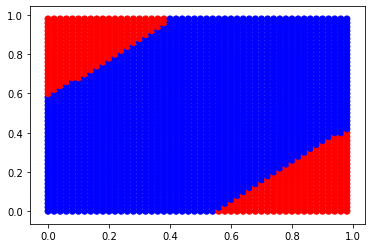

In [19]:
h = model.predict(grid)

print(type(h))
print(h.shape)

colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors)  

In [21]:
#그냥, 달모양 데이터 만든것, 위와 상관 없다.
from sklearn.datasets import make_moons
x_data, y_data = make_moons(n_samples=500, noise=0.15)   #  x 는 2차원   y는 레이블    0   1

colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]

plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)  
print(y_data.shape)

ImportError: cannot import name '__check_build' from 'sklearn' (c:\programdata\miniconda3\lib\site-packages\sklearn\__init__.py)

In [ ]:
print(x_data.shape)
print(x_data)
print(x)
print(y)

In [ ]:
#적절한 값을 찾는것이 중요하다!
model = Sequential([
    Dense(5, activation='sigmoid',input_dim=2),   
    Dense(5, activation='sigmoid'),
    Dense(1, activation='sigmoid'),
])

model.compile(loss='binary_crossentropy', optimizer=Adam(0.01))  
model.fit(x_data, y_data, batch_size=100, epochs=3000, verbose=0,
          validation_data=(x_data, y_data)) #학습

colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]
plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)
xx, yy = np.mgrid[-1.5:2.5:0.05, -1:1.5:0.05]
grid = np.c_[xx.ravel(), yy.ravel()]
h = model.predict_proba(grid)
colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  

In [ ]:
model = Sequential([
    Dense(5, activation='sigmoid',input_dim=2),   
    Dense(5, activation='sigmoid'),
    Dense(10, activation='sigmoid'),
    Dense(10, activation='sigmoid'),
    Dense(10, activation='sigmoid'),
    Dense(10, activation='sigmoid'),
    Dense(10, activation='sigmoid'),
    Dense(10, activation='sigmoid'),
    Dense(10, activation='sigmoid'),
    Dense(10, activation='sigmoid'),
    Dense(1, activation='sigmoid'),
])
model.compile(loss='binary_crossentropy', optimizer="adam",
             metrics = ['accuracy'])  

model.fit(x_data, y_data, batch_size=100, epochs=3000, verbose=0,
          validation_data=(x_data, y_data),
          callbacks = [printepoch(500)])

#값이 작다고 해서, 정확도가 100에 수렴하는것은 아니다.
#이 데이터 셋은 500번단위마다, 정확도가 어느정도 되는구나를 알 수 있다.
#매 에포크 마다의 훈련 손실값 (loss)
#매 에포크 마다의 훈련 정확도 (acc)
#매 에포크 마다의 검증 손실값 (val_loss)
#매 에포크 마다의 검증 정확도 (val_acc)


In [ ]:
model = Sequential([
    Dense(5, activation= LeakyReLU(alpha=0.1),input_dim=2),   
    Dense(10, activation= LeakyReLU(alpha=0.1)),
    Dense(10, activation= LeakyReLU(alpha=0.1)),
    Dense(10, activation= LeakyReLU(alpha=0.1)),
    Dense(10, activation= LeakyReLU(alpha=0.1)),    
    Dense(10, activation= LeakyReLU(alpha=0.1)),
    Dense(10, activation= LeakyReLU(alpha=0.1)),
    Dense(10, activation= LeakyReLU(alpha=0.1)),    
    Dense(10, activation= LeakyReLU(alpha=0.1)),
    Dense(10, activation= LeakyReLU(alpha=0.1)),
    Dense(10, activation= LeakyReLU(alpha=0.1)),        
    Dense(10, activation= LeakyReLU(alpha=0.1)),
    Dense(10, activation= LeakyReLU(alpha=0.1)),
    Dense(10, activation= LeakyReLU(alpha=0.1)),    
    Dense(10, activation= LeakyReLU(alpha=0.1)),
    Dense(10, activation= LeakyReLU(alpha=0.1)),
    Dense(10, activation= LeakyReLU(alpha=0.1)),        
    Dense(1, activation='sigmoid'),
])
model.compile(loss='binary_crossentropy', optimizer="adam",
    metrics=['accuracy'])  

In [ ]:
model.fit(x_data, y_data, batch_size=100, epochs=1001, verbose=0,
          validation_data=(x_data, y_data), callbacks=[printepoch(500)]   )

#깊은 네트워크 설계가 가능해졌다. 다되어서, 학습도 빠르다. 신경망이 학습이 안된다는것, weight변화가 안생긴다. -> 미분값이 0이다.

In [ ]:
def createModel(layers, activation, input_dim) :    
    model = Sequential()        
    d = layers.pop(0)
    model.add(Dense(d, activation=activation,input_dim =input_dim))
    for l in layers :
        model.add(Dense(l, activation=activation)) 
    model.add(Dense(1, activation='sigmoid'))    #여기서는 sigmoid 사용해야한다. Relu 쓰면 안된다. 0.5보다 크냐 작냐를 따진다.
    return model

    
model = createModel([5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5], LeakyReLU(alpha=0.1), 2) 


